# Импорт библиотек 

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

import scipy

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns


Пути к файлам

In [2]:
attack_probability_fp = 'D:/Downloads/Data Science/Data Science/Data Science/attack_probability.parquet'
daily_volume_fp = 'D:/Downloads/Data Science/Data Science/Data Science/daily_volume.parquet'
drinks_fp = 'D:/Downloads/Data Science/Data Science/Data Science/drinks.parquet'
effect_fp = 'D:/Downloads/Data Science/Data Science/Data Science/effect.parquet'
promo_fp = 'D:/Downloads/Data Science/Data Science/Data Science/promo.parquet'
sales_fp = 'D:/Downloads/Data Science/Data Science/Data Science/sales.parquet'



# attack_probability_fp = 'D:/Хакатон/drive-download-20221109T170155Z-001/attack_probability.parquet'
# daily_volume_fp = 'D:/Хакатон/drive-download-20221109T170155Z-001/daily_volume.parquet'
# drinks_fp = 'D:/Хакатон/drive-download-20221109T170155Z-001/drinks.parquet'
# effect_fp = 'D:/Хакатон/drive-download-20221109T170155Z-001/effect.parquet'
# promo_fp = 'D:/Хакатон/drive-download-20221109T170155Z-001/promo.parquet'
# sales_fp = 'D:/Хакатон/drive-download-20221109T170155Z-001/sales.parquet'

Все файлы откроем, прочитав их
сохраним в соответсвующие датаферймы

In [3]:
attack_probability = pd.read_parquet(attack_probability_fp)
attack_probability['date'] = pd.to_datetime(attack_probability['date'])

attack_probability

Unnamed: 0      city       date  attack probability
0              0  Коукворт 1996-02-23            0.163317
1              1  Коукворт 1996-02-24            0.219221
2              2  Коукворт 1996-02-25            0.180625
3              3  Коукворт 1996-02-26            0.149749
4              4  Коукворт 1996-02-27            0.121288
...          ...       ...        ...                 ...
3680        3680     Салем 1997-01-18            0.217337
3681        3681     Салем 1997-01-19            0.227730
3682        3682     Салем 1997-01-20            0.236683
3683        3683     Салем 1997-01-21            0.243719
3684        3684     Салем 1997-01-22            0.252513

[3685 rows x 4 columns]

In [21]:
effect = pd.read_parquet(effect_fp)
effect.dropna(inplace=True)
effect['date'] = pd.to_datetime(effect['date'])

effect = effect[effect['product'].isin(['Вода']) == False]

effect

date           product      city  volume_litr
0     1997-02-06    Огненный виски  Нью-Йорк    73.812644
1     1997-02-06  Смородиновый ром  Нью-Йорк    10.502700
2     1997-02-06    Огненный виски    Кромер   134.363871
3     1997-02-06    Безалкогольное    Авимор     5.823788
5     1997-02-06  Смородиновый ром     Париж     0.001775
...          ...               ...       ...          ...
48936 1997-07-24    Сливочное пиво     Салем     0.000642
48937 1997-07-23     Чешуя дракона  Даффтаун     0.000766
48938 1997-07-19  Смородиновый ром  Даффтаун     4.108817
48940 1997-07-21    Огненный виски    Кромер     0.000664
48941 1997-07-21    Огненный виски    Авимор     0.000303

[37262 rows x 4 columns]

Заметим, что для ба напитков нет уникальных значений эффектов по названиям


---


Вода была исключена, поскольку неизвестно её дневное потребление  

In [23]:
effect['product'].unique()

array(['Огненный виски', 'Смородиновый ром', 'Безалкогольное',
       'Чешуя дракона', 'Сливочное пиво'], dtype=object)

In [51]:
effect['date'].nunique()

716

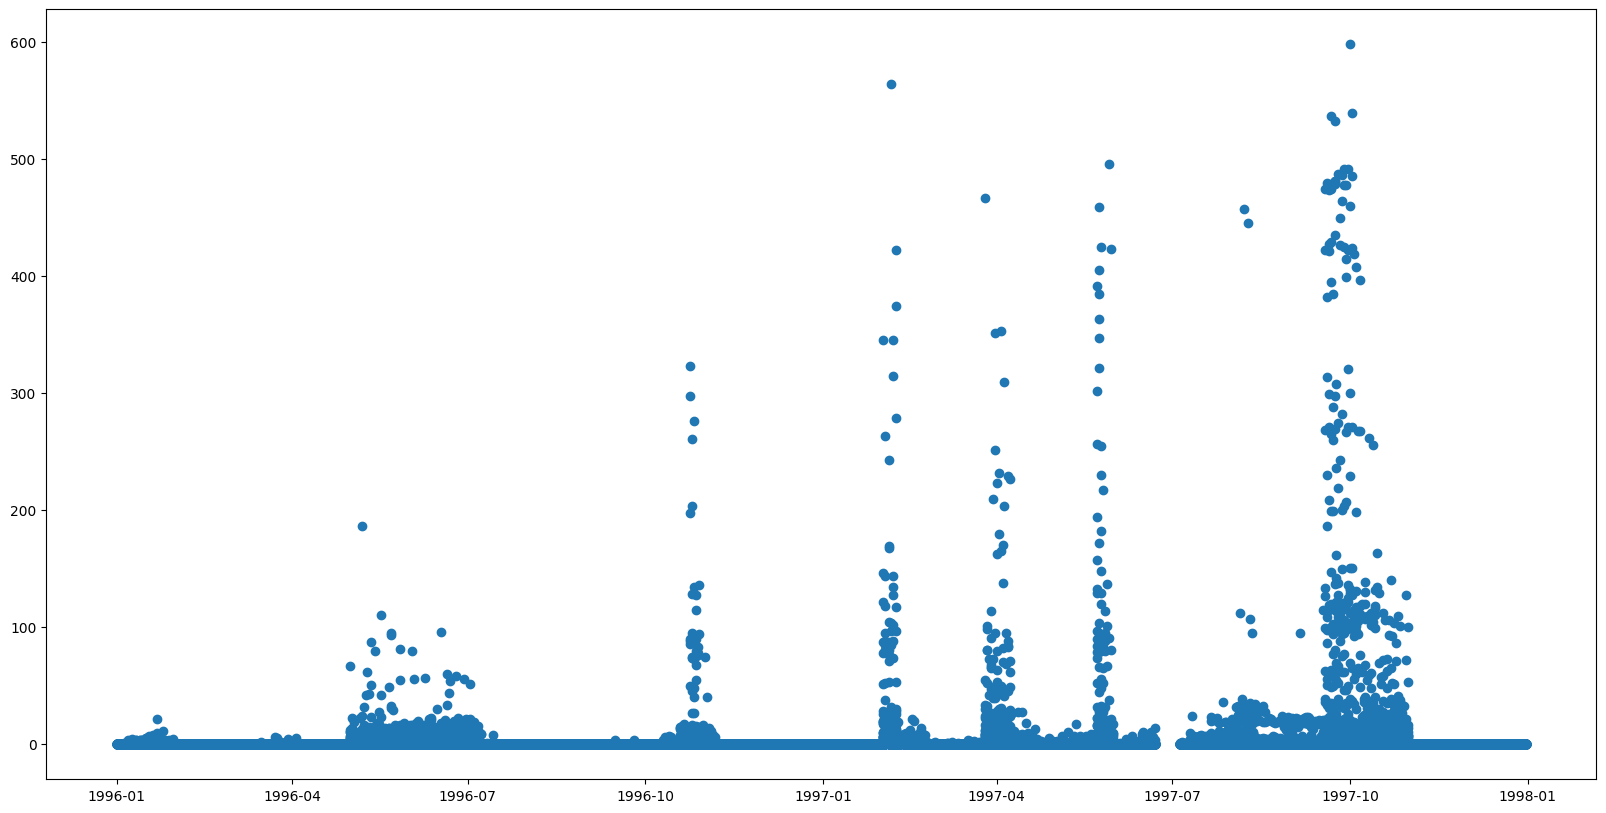

In [54]:
plt.figure(figsize=(20,10))
plt.scatter(effect['date'], effect['volume_litr'])

daily_volume ,будем анализировать по городам 
БА напитки переименуем согласно ключам продуктов в effect сгруппируем и агрегируем по суммам

In [16]:
daily_volume = pd.read_parquet(daily_volume_fp)
daily_volume['date'] = pd.to_datetime(daily_volume['date'])
daily_volume

city       id           product       date  volume_litr
0             Коукворт  5429785             Эгног 1997-12-21    13.817442
1             Коукворт  6204483  Смородиновый ром 1997-12-21     2.744815
2               Авимор  8468669  Смородиновый ром 1997-12-21     0.625733
3        Литтл Уингинг  3750132    Огненный виски 1997-12-21     4.666352
4                Салем  7578185  Смородиновый ром 1997-12-21     0.185256
...                ...      ...               ...        ...          ...
3778269         Кромер  8473254    Сливочное пиво 1997-07-24    35.694447
3778270         Кромер   609658    Сливочное пиво 1997-07-24    22.917773
3778271          Париж  1465623    Сливочное пиво 1997-07-24    58.172669
3778272        Абердин  1084505    Сливочное пиво 1997-07-24    34.726299
3778273        Абердин  4874286    Сливочное пиво 1997-07-24    21.534405

[3778274 rows x 5 columns]

In [18]:
daily_volume['product'].unique()

array(['Эгног', 'Смородиновый ром', 'Огненный виски', 'Чешуя дракона',
       'Сливочное пиво', 'Горная вода', 'Языкосвязывающий лимонный сквош',
       'Шипучий персиковый чай', 'Тыквенный сок', 'Настой тыквы'],
      dtype=object)

In [24]:
daily_volume = pd.read_parquet(daily_volume_fp)
daily_volume['date'] = pd.to_datetime(daily_volume['date'])

daily_volume.rename(columns={'volume_litr':'volume_per_day'}, inplace=True)


replace_cols = ['Эгног', 'Горная вода', 'Языкосвязывающий лимонный сквош','Шипучий персиковый чай', 'Тыквенный сок', 'Настой тыквы']
daily_volume = daily_volume.replace(replace_cols, 'Безалкогольное')

b_alc  = daily_volume[daily_volume['product'] == 'Безалкогольное'].groupby(by=['city', 'date', 'product']).agg(sum = ('volume_per_day', 'sum'))

alc = daily_volume[daily_volume['product'] != 'Безалкогольное'].groupby(by=['city', 'date', 'product']).agg(sum = ('volume_per_day', 'sum'))


def return_df(df):
  df_si_level = df.reset_index( level = [0 , 2] )
  df_si_level.reset_index(inplace=True)
  return df_si_level

b_alc = return_df(b_alc)
alc = return_df(alc) 


daily_volume = pd.concat([b_alc, alc])
daily_volume

date     city           product          sum
0     1996-01-01  Абердин    Безалкогольное   141.007667
1     1996-01-02  Абердин    Безалкогольное   298.747532
2     1996-01-03  Абердин    Безалкогольное   441.203407
3     1996-01-04  Абердин    Безалкогольное   493.160614
4     1996-01-05  Абердин    Безалкогольное   447.373914
...          ...      ...               ...          ...
32159 1997-12-30    Салем     Чешуя дракона  6090.496417
32160 1997-12-31    Салем    Огненный виски  1365.207233
32161 1997-12-31    Салем    Сливочное пиво  3790.941219
32162 1997-12-31    Салем  Смородиновый ром   241.840409
32163 1997-12-31    Салем     Чешуя дракона  4687.566740

[40205 rows x 4 columns]

Проверим, что ключи продуктов совпадают у effect и daily_volume

In [25]:
daily_volume['product'].unique()

array(['Безалкогольное', 'Огненный виски', 'Сливочное пиво',
       'Смородиновый ром', 'Чешуя дракона'], dtype=object)

In [50]:
daily_volume['date'].nunique()

731

drinks также сделаем исходя из ключей в effect

In [26]:
drinks = pd.read_parquet(drinks_fp)
drinks.rename(columns={'Напиток':'product'}, inplace=True)
drinks = drinks.replace(replace_cols, 'Безалкогольное')
drinks = drinks.drop_duplicates(ignore_index=True)
drinks = drinks[drinks['product'].isin(['Вода']) == False]
drinks

product             Тип
0    Безалкогольное  Безалкогольный
1    Сливочное пиво     Алкогольный
2     Чешуя дракона     Алкогольный
3    Огненный виски     Алкогольный
5  Смородиновый ром     Алкогольный

Promo переделаем так, чтобы в каждый конкретный день, в каждом конкретном городе, нам было известно какие акции сейчас идут/или не идут 

In [28]:
%%time
promo = pd.read_parquet(promo_fp)
promo.drop(columns=['Затраты на акцию, галлеонов'], inplace=True)
promo['Название'].fillna('None', inplace=True)

promo['Начало'] = pd.to_datetime(promo['Начало'])
promo['Конец'] = pd.to_datetime(promo['Конец'])
promo[['Коукворт', 'Литтл Уингинг', 'Абердин', 'Лондон', 'Бат',
       'Даффтаун', 'Авимор', 'Кромер', 'Париж', 'Салем', 'Нью-Йорк', 'Алкогольное', 'Безалкогольное']] =  promo[['Коукворт', 'Литтл Уингинг', 'Абердин', 'Лондон', 'Бат',
       'Даффтаун', 'Авимор', 'Кромер', 'Париж', 'Салем', 'Нью-Йорк','Алкогольное', 'Безалкогольное']].astype(int, copy=False)


promo2 = pd.DataFrame()
promo3 = pd.DataFrame()
dubblicates = promo['Название'].duplicated()
names_col2 = []
dates_col2 = []
names_col3 = []
dates_col3 = []

for i in range(len(promo['Начало'])):
  if dubblicates[i] == False:
    name = []
    dates = pd.date_range(start=promo['Начало'][i], end=promo['Конец'][i])
    name.append(promo['Название'][i])
    name = name*len(dates)
    for item in name:
      names_col2.append(item)

    for item in dates:
      dates_col2.append(item)

  else:
    name = []
    dates = pd.date_range(start=promo['Начало'][i], end=promo['Конец'][i])
    name.append(promo['Название'][i])
    name = name*len(dates)
    for item in name:
      names_col3.append(item)
 
    for item in dates:
      dates_col3.append(item)


 
promo2['Название'] = names_col2
promo2['Даты проведения'] = dates_col2
promo3['Название'] = names_col3
promo3['Даты проведения'] = dates_col3


promo.drop(['Начало','Конец','Алкогольное','Безалкогольное'], axis = 1, inplace=True)

promo2 = promo2.merge(promo.drop_duplicates(subset=['Название']))
promo3 = promo3.merge(promo.drop_duplicates(subset=['Название'], keep='last'))
promo = pd.concat([promo2, promo3], ignore_index=True)
promo.rename(columns={'Даты проведения': 'date'}, inplace=True)


def which_action_today(promo):
  p2 = promo
  cols = p2['Название'].unique().tolist()
  cols.append('date')
  new_dict = {new_list: [] for new_list in cols}
  for index, row in p2.iterrows():
    for item in cols:
      if item == 'date':
        new_dict['date'].append(row['date'])
      else:
        x = p2[p2['date'] == row['date']]
        if (item in x['Название'].values):
          new_dict[item].append(1)
        else:
          new_dict[item].append(0)
  new_dict = pd.DataFrame.from_dict(new_dict)    
  return new_dict



p = which_action_today(promo)

promo[p.columns.to_list()] = p[p.columns.to_list()]
promo = promo.drop_duplicates(['date'])
promo.drop(['Название'], axis=1, inplace=True)



cities = ['Кромер', 'Париж','Бат', 'Лондон', 'Салем', 'Коукворт', 'Авимор', 'Даффтаун', 'Абердин','Нью-Йорк', 'Литтл Уингинг']
action_by_cities = pd.DataFrame()
action_by_cities.append(promo.loc[0])

city = []
for index, row in promo.iterrows():
  for item in cities:
    if row[item] == 1:
      action_by_cities = action_by_cities.append(row)
      city.append(item)

action_by_cities['city'] = city
action_by_cities.drop(columns=cities, axis=1, inplace=True)

promo = action_by_cities
promo.dropna(inplace=True)
promo


Выходные данные были обрезаны до нескольких последних строк (5000).
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: 

Wall time: 2min 20s


<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


date  Турнир трех волшебников за метлы  Клинок за пророк  \
0    1996-03-02                                 1                 0   
0    1996-03-02                                 1                 0   
0    1996-03-02                                 1                 0   
0    1996-03-02                                 1                 0   
0    1996-03-02                                 1                 0   
...         ...                               ...               ...   
2051 1996-09-17                                 0                 0   
2051 1996-09-17                                 0                 0   
2051 1996-09-17                                 0                 0   
2051 1996-09-17                                 0                 0   
2051 1996-09-17                                 0                 0   

      Квоффл в кольцо  None  Конфетки за метки  Обмен любезностями  \
0                   0     0                  0                   0   
0                   0     0                  0                   0   
0                   0     0                  0                   0   
0                   0     0                  0                   0   
0                   0     0                  0                   0   
...               ...   ...                ...                 ...   
2051                0     0                  0                   0   
2051                0     0                  0                   0   
2051                0     0                  0                   0   
2051                0     0                  0                   0   
2051                0     0                  0                   0   

      Лучше золотой снитч в руках, чем гиппогриф в небе  \
0                                                     0   
0                                                     0   
0                                                     0   
0                                                     0   
0                                                     0   
...                                                 ...   
2051                                                  0   
2051                                                  0   
2051                                                  0   
2051                                                  0   
2051                                                  0   

      Сладкий бизнес при покупке от 15 литров в любом заведении  \
0                                                     0           
0                                                     0           
0                                                     0           
0                                                     0           
0                                                     0           
...                                                 ...           
2051                                                  0           
2051                                                  0           
2051                                                  0           
2051                                                  0           
2051                                                  0           

      Двойная сладость  ...  Библиотеки Куокворта купоны на скидку  \
0                    0  ...                                      1   
0                    0  ...                                      1   
0                    0  ...                                      1   
0                    0  ...                                      1   
0                    0  ...                                      1   
...                ...  ...                                    ...   
2051                 0  ...                                      0   
2051                 0  ...                                      0   
2051                 0  ...                                      0   
2051                 0  ...                                      0   
2051                 0  ...      

In [29]:
actions = ['Турнир трех волшебников за метлы',
 'Клинок за пророк',
 'Квоффл в кольцо',
 'None',
 'Конфетки за метки',
 'Обмен любезностями',
 'Лучше золотой снитч в руках, чем гиппогриф в небе',
 'Сладкий бизнес при покупке от 15 литров в любом заведении',
 'Двойная сладость',
 '(Орден Феникса)',
 'Сладкий бизнес ноябрь 1997',
 'Сладкий бизнес декабрь 1997',
 'Сладкий бизнес и лягушка + 15 литров напитков',
 'МетлаПлюс',
 'Партнер заведений магазин Ханидьюкс 1997',
 'Партнер заведений магазин Ханидьюкс',
 '"Все и сразу" набор',
 'Преданный фанат спорта',
 'Магазин "Зонко" Двойная сладость',
 'ПРА СУПЕР ГАЛЕОН',
 'Партнер "Чайный пакетик Розы ли"',
 'Минус кнат алкогольное',
 'Скидка на Огненный виски 3 кната если на бармена сработали чары',
 '\xa0Скидка на Сливочное пиво 2 кната если на бармена сработали чары',
 'С литрушки на лягушку скидка на безалкогольные напитки если взял 15 литров алкоголя',
 'Библиотеки Куокворта читательский скидка',
 'С литрушки на лягушку 12 литров',
 'С литрушки на лягушку + Карликовые пушистики',
 'С литрушки на лягушку 16 литров',
 'Минус кнат на Чешую Дракона если бармен под чарами',
 'Выпить на удачу',
 'Напиток и омолаживающее зелье',
 'С литрушки на лягушку',
 'Подписка на "Ежедневный пророк" + скидка от 15 литров напитка\xa0',
 'Гринготс разный пол (без чар, трансфигурации и оборотного зелья)',
 '"Министерство магии" только на алкоголь',
 'Библиотеки Куокворта купоны на скидку',
 'Настоящий мародер',
 'Флориш и Блоттс май\xa0',
 'Флориш и Блоттс июнь',
 'Back to Hogwarts',
 'Газета "Придира"',
 'Лавка Оливандера октябрь',
 'Акция при поимке Пикси от 15 литров напитков',
 'Газета "Придира" -2 кната не более 25 литров'
]

Добавим фичу, показывающую сколько акций идёт одновременно в конкретную дату, в конкретном городе

In [30]:
promo['Акций одновременно'] = promo[actions].sum(axis=1)
promo

date  Турнир трех волшебников за метлы  Клинок за пророк  \
0    1996-03-02                                 1                 0   
0    1996-03-02                                 1                 0   
0    1996-03-02                                 1                 0   
0    1996-03-02                                 1                 0   
0    1996-03-02                                 1                 0   
...         ...                               ...               ...   
2051 1996-09-17                                 0                 0   
2051 1996-09-17                                 0                 0   
2051 1996-09-17                                 0                 0   
2051 1996-09-17                                 0                 0   
2051 1996-09-17                                 0                 0   

      Квоффл в кольцо  None  Конфетки за метки  Обмен любезностями  \
0                   0     0                  0                   0   
0                   0     0                  0                   0   
0                   0     0                  0                   0   
0                   0     0                  0                   0   
0                   0     0                  0                   0   
...               ...   ...                ...                 ...   
2051                0     0                  0                   0   
2051                0     0                  0                   0   
2051                0     0                  0                   0   
2051                0     0                  0                   0   
2051                0     0                  0                   0   

      Лучше золотой снитч в руках, чем гиппогриф в небе  \
0                                                     0   
0                                                     0   
0                                                     0   
0                                                     0   
0                                                     0   
...                                                 ...   
2051                                                  0   
2051                                                  0   
2051                                                  0   
2051                                                  0   
2051                                                  0   

      Сладкий бизнес при покупке от 15 литров в любом заведении  \
0                                                     0           
0                                                     0           
0                                                     0           
0                                                     0           
0                                                     0           
...                                                 ...           
2051                                                  0           
2051                                                  0           
2051                                                  0           
2051                                                  0           
2051                                                  0           

      Двойная сладость  ...  Настоящий мародер  Флориш и Блоттс май   \
0                    0  ...                  0                     0   
0                    0  ...                  0                     0   
0                    0  ...                  0                     0   
0                    0  ...                  0                     0   
0                    0  ...                  0                     0   
...                ...  ...                ...                   ...   
2051                 0  ...                  0                     0   
2051                 0  ...                  0                     0   
2051                 0  ...                  0                     0   
2051                 0  ...                  0                     0   
2051       

In [49]:
promo['date'].nunique()

731

Sales поменяем так, чтобы знать сколько суммарно алкоголя и БА напитков выпили клиенты в конкретную дату, в конкретном городе 

In [31]:
sales = pd.read_parquet(sales_fp)
sales['date'] = pd.to_datetime(sales['date'])
sales.rename(columns={'volume_litr': 'volume_per_client'}, inplace=True)
sales = sales.replace(['Безалкогольные', 'Алкогольные'], ['Безалкогольный', 'Алкогольный'])


def prepare_sales(segment):
  sales_alc_nalc_ps  = sales[(sales['drink'] == 'Безалкогольный')& (sales['segment'] == segment)]
  sales_alc_alc_ps = sales[(sales['drink'] != 'Безалкогольный')& (sales['segment'] == segment)]

  sales_alc_alc_ps.rename(columns={'volume_per_client':'volume_per_client_alc_'+str(segment)}, inplace=True)
  sales_alc_alc_ps.drop(columns=['drink'], inplace= True)

  sales_alc_nalc_ps.rename(columns={'volume_per_client':'volume_per_client_nalc_'+str(segment)}, inplace=True)
  sales_alc_nalc_ps.drop(columns=['drink'], inplace= True)

  prepared_sales = sales_alc_alc_ps.merge(sales_alc_nalc_ps)

  return prepared_sales

prepared_sales_ps = prepare_sales('Пожиратели смерти')
prepared_sales_ps.drop(columns=['segment'], inplace=True)

prepared_sales_of = prepare_sales('Орден Феникса')
prepared_sales_of.drop(columns=['segment'], inplace=True)

sales = prepared_sales_of.merge(prepared_sales_ps)
sales

C:\Users\Павел\AppData\Local\Temp\ipykernel_10740\3867391915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_alc_alc_ps.rename(columns={'volume_per_client':'volume_per_client_alc_'+str(segment)}, inplace=True)
C:\Users\Павел\AppData\Local\Temp\ipykernel_10740\3867391915.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_alc_alc_ps.drop(columns=['drink'], inplace= True)
C:\Users\Павел\AppData\Local\Temp\ipykernel_10740\3867391915.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

date      city  volume_per_client_alc_Орден Феникса  \
0    1996-01-01   Абердин                            41.229288   
1    1996-01-01  Коукворт                           116.523241   
2    1996-01-01       Бат                           118.555490   
3    1996-01-01    Лондон                            23.459038   
4    1996-01-01    Авимор                            79.275412   
...         ...       ...                                  ...   
8036 1997-12-31    Кромер                           186.013268   
8037 1997-12-31       Бат                           293.648143   
8038 1997-12-31    Лондон                            67.782851   
8039 1997-12-31    Авимор                           211.441719   
8040 1997-12-31  Даффтаун                           108.492764   

      volume_per_client_nalc_Орден Феникса  \
0                                 0.588830   
1                                 3.762379   
2                                12.834501   
3                                 1.758985   
4                                 2.590167   
...                                    ...   
8036                             22.107153   
8037                             36.866257   
8038                              6.664371   
8039                              9.920075   
8040                              4.273244   

      volume_per_client_alc_Пожиратели смерти  \
0                                    5.191855   
1                                   12.651664   
2                                   18.792468   
3                                    1.921660   
4                                    9.419940   
...                                       ...   
8036                                34.189197   
8037                                52.462330   
8038                                 9.594348   
8039                                30.329982   
8040                                 9.810075   

      volume_per_client_nalc_Пожиратели смерти  
0                                     1.034738  
1                                     2.114929  
2                                     4.371243  
3                                     0.000000  
4                                     1.775884  
...                                        ...  
8036                                  9.573004  
8037                                 20.450500  
8038                                  3.780945  
8039                                  8.121153  
8040                                  3.065926  

[8041 rows x 6 columns]

# Финальный датафрейм для моделирования 

Финальный датафрейм для моделирования получим слиянием всех вышеупомянутых датафреймов 

In [41]:
data = daily_volume.merge(drinks).merge(attack_probability[['date','city','attack probability']]).merge(effect).merge(promo).merge(sales)


data

date     city           product          sum             Тип  \
0     1996-02-23  Абердин    Огненный виски   421.451906     Алкогольный   
1     1996-02-23  Абердин    Сливочное пиво  1799.662505     Алкогольный   
2     1996-02-23  Абердин  Смородиновый ром    45.978008     Алкогольный   
3     1996-02-23  Абердин     Чешуя дракона   760.019907     Алкогольный   
4     1996-02-24  Абердин    Огненный виски   457.586583     Алкогольный   
...          ...      ...               ...          ...             ...   
13335 1997-01-22    Салем    Безалкогольное  2630.839180  Безалкогольный   
13336 1997-01-22    Салем    Огненный виски   884.647856     Алкогольный   
13337 1997-01-22    Салем    Сливочное пиво  4175.405221     Алкогольный   
13338 1997-01-22    Салем  Смородиновый ром   123.177518     Алкогольный   
13339 1997-01-22    Салем     Чешуя дракона  4348.671207     Алкогольный   

       attack probability  volume_litr  Турнир трех волшебников за метлы  \
0                0.145729     0.000049                                 0   
1                0.145729     0.000020                                 0   
2                0.145729     0.000095                                 0   
3                0.145729     0.000038                                 0   
4                0.197236     0.000050                                 0   
...                   ...          ...                               ...   
13335            0.252513     0.000005                                 0   
13336            0.252513     0.000006                                 0   
13337            0.252513     0.000007                                 0   
13338            0.252513     0.000005                                 0   
13339            0.252513     0.000007                                 0   

       Клинок за пророк  Квоффл в кольцо  ...  Back to Hogwarts  \
0                     0                0  ...                 0   
1                     0                0  ...                 0   
2                     0                0  ...                 0   
3                     0                0  ...                 0   
4                     0                0  ...                 0   
...                 ...              ...  ...               ...   
13335                 0                0  ...                 0   
13336                 0                0  ...                 0   
13337                 0                0  ...                 0   
13338                 0                0  ...                 0   
13339                 0                0  ...                 0   

       Газета "Придира"  Лавка Оливандера октябрь  \
0                     0                         0   
1                     0                         0   
2                     0                         0   
3                     0                         0   
4                     0                         0   
...                 ...                       ...   
13335                 0                         0   
13336                 0                         0   
13337                 0                         0   
13338                 0                         0   
13339                 0                         0   

       Акция при поимке Пикси от 15 литров напитков  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
13335                                             0   
13336                                             0   
13337                                             0   
13338                                             0   
13339                                             0   

       Газета "Придира" -2 кната не более 25 литров  Акций одновременно  \
0       

Заметим, что отсутсвие 1997 года в датафрейме attack probability обрезает даты на целый год

In [43]:
data['date'].nunique()

335

Это приводит к следующему: Акции, прошедшие в 1997 году перестают учитываться и эффект каждой акции уже нельзя подсчитать, посколько на обрезанных данных их ещё просто не было

In [45]:
for item in actions:
  if data[item].sum() ==0:
    print(str(item), data[item].sum())

Клинок за пророк 0
Квоффл в кольцо 0
(Орден Феникса) 0
Сладкий бизнес ноябрь 1997 0
Сладкий бизнес декабрь 1997 0
"Все и сразу" набор 0
Преданный фанат спорта 0
Магазин "Зонко" Двойная сладость 0
ПРА СУПЕР ГАЛЕОН 0
Партнер "Чайный пакетик Розы ли" 0
Скидка на Огненный виски 3 кната если на бармена сработали чары 0
 Скидка на Сливочное пиво 2 кната если на бармена сработали чары 0
Подписка на "Ежедневный пророк" + скидка от 15 литров напитка  0
Газета "Придира" -2 кната не более 25 литров 0


Поэтому с точки зрения бизнеса, которому интересно как те или иные акции повлияли на эффект дополнительных напитков, будет более корректно отказаться от слиияния с attack_probabylity (на год вперед его предсказать нереально, а идея с заполнением пропусков каким-то значением тоже кажется не совсем корректной)

In [296]:
data = daily_volume.merge(drinks).merge(effect, how='outer').merge(promo).merge(sales)
data

date     city           product          sum             Тип  \
0     1996-01-01  Абердин    Безалкогольное   141.007667  Безалкогольный   
1     1996-01-01  Абердин    Огненный виски   255.188103     Алкогольный   
2     1996-01-01  Абердин    Сливочное пиво  1119.927917     Алкогольный   
3     1996-01-01  Абердин  Смородиновый ром    26.628389     Алкогольный   
4     1996-01-01  Абердин     Чешуя дракона   492.548590     Алкогольный   
...          ...      ...               ...          ...             ...   
32120 1997-12-31    Салем    Безалкогольное  1654.001331  Безалкогольный   
32121 1997-12-31    Салем    Огненный виски  1365.207233     Алкогольный   
32122 1997-12-31    Салем    Сливочное пиво  3790.941219     Алкогольный   
32123 1997-12-31    Салем  Смородиновый ром   241.840409     Алкогольный   
32124 1997-12-31    Салем     Чешуя дракона  4687.566740     Алкогольный   

       volume_litr  Турнир трех волшебников за метлы  Клинок за пророк  \
0              NaN                                 0                 0   
1         0.000006                                 0                 0   
2         0.000002                                 0                 0   
3         0.000009                                 0                 0   
4         0.000005                                 0                 0   
...            ...                               ...               ...   
32120     0.000023                                 0                 0   
32121     0.000019                                 0                 0   
32122     0.000027                                 0                 0   
32123     0.000020                                 0                 0   
32124     0.000021                                 0                 0   

       Квоффл в кольцо  None  ...  Back to Hogwarts  Газета "Придира"  \
0                    0     1  ...                 0                 0   
1                    0     1  ...                 0                 0   
2                    0     1  ...                 0                 0   
3                    0     1  ...                 0                 0   
4                    0     1  ...                 0                 0   
...                ...   ...  ...               ...               ...   
32120                0     0  ...                 0                 0   
32121                0     0  ...                 0                 0   
32122                0     0  ...                 0                 0   
32123                0     0  ...                 0                 0   
32124                0     0  ...                 0                 0   

       Лавка Оливандера октябрь  Акция при поимке Пикси от 15 литров напитков  \
0                             0                                             0   
1                             0                                             0   
2                             0                                             0   
3                             0                                             0   
4                             0                                             0   
...                         ...                                           ...   
32120                         0                                             0   
32121                         0                                             0   
32122                         0                                             0   
32123                         0                                             0   
32124                         0                                             0   

       Газета "Придира" -2 кната не более 25 литров  Акций одновременно  \
0                                                 0                   1   
1                                                 0                   1   
2                                                 0                   1   
3                                                 0         

In [297]:
data['date'].nunique()

731

Заметим присутвие пропущенных значений таргета Volume_litr

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32125 entries, 0 to 32124
Data columns (total 56 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   date                                                                                 32125 non-null  datetime64[ns]
 1   city                                                                                 32125 non-null  object        
 2   product                                                                              32125 non-null  object        
 3   sum                                                                                  32125 non-null  float64       
 4   Тип                                                                                  32125 non-null  object        
 5   volume_litr                            

In [64]:
data[data['volume_litr'].isna() == True]

date     city           product          sum             Тип  \
0     1996-01-01  Абердин    Безалкогольное   141.007667  Безалкогольный   
25    1996-01-06  Абердин    Безалкогольное   524.713910  Безалкогольный   
30    1996-01-07  Абердин    Безалкогольное   434.798613  Безалкогольный   
50    1996-01-11  Абердин    Безалкогольное   631.582292  Безалкогольный   
185   1996-02-07  Абердин    Безалкогольное   802.159163  Безалкогольный   
...          ...      ...               ...          ...             ...   
31375 1997-07-04    Салем    Безалкогольное  1890.580284  Безалкогольный   
31376 1997-07-04    Салем    Огненный виски   983.555108     Алкогольный   
31377 1997-07-04    Салем    Сливочное пиво  3528.346396     Алкогольный   
31378 1997-07-04    Салем  Смородиновый ром   183.375344     Алкогольный   
31379 1997-07-04    Салем     Чешуя дракона  4502.356250     Алкогольный   

       volume_litr  Турнир трех волшебников за метлы  Клинок за пророк  \
0              NaN                                 0                 0   
25             NaN                                 0                 0   
30             NaN                                 0                 0   
50             NaN                                 0                 0   
185            NaN                                 0                 0   
...            ...                               ...               ...   
31375          NaN                                 0                 0   
31376          NaN                                 0                 0   
31377          NaN                                 0                 0   
31378          NaN                                 0                 0   
31379          NaN                                 0                 0   

       Квоффл в кольцо  None  ...  Back to Hogwarts  Газета "Придира"  \
0                    0     1  ...                 0                 0   
25                   0     1  ...                 0                 0   
30                   0     1  ...                 0                 0   
50                   0     1  ...                 0                 0   
185                  0     1  ...                 0                 0   
...                ...   ...  ...               ...               ...   
31375                1     0  ...                 0                 0   
31376                1     0  ...                 0                 0   
31377                1     0  ...                 0                 0   
31378                1     0  ...                 0                 0   
31379                1     0  ...                 0                 0   

       Лавка Оливандера октябрь  Акция при поимке Пикси от 15 литров напитков  \
0                             0                                             0   
25                            0                                             0   
30                            0                                             0   
50                            0                                             0   
185                           0                                             0   
...                         ...                                           ...   
31375                         0                                             0   
31376                         0                                             0   
31377                         0                                             0   
31378                         0                                             0   
31379                         0                                             0   

       Газета "Придира" -2 кната не более 25 литров  Акций одновременно  \
0                                                 0                   1   
25                                                0                   1   
30                                                0                   1   
50                                                0         

Рассмотрим фрейм effect, где возник пропуск

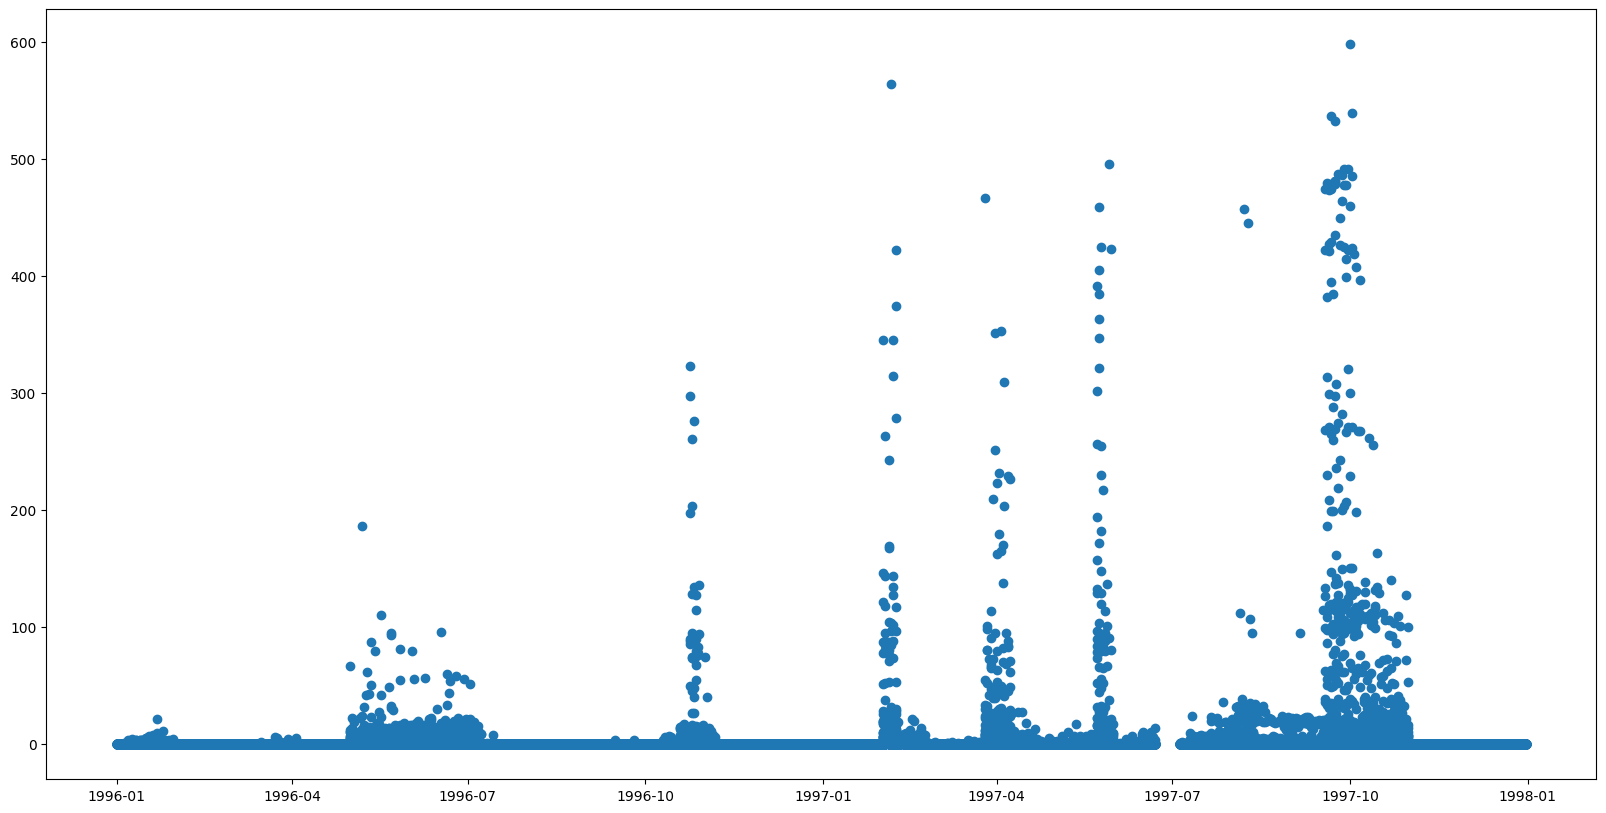

In [58]:
plt.figure(figsize=(20,10))
plt.scatter(effect['date'], effect['volume_litr'])

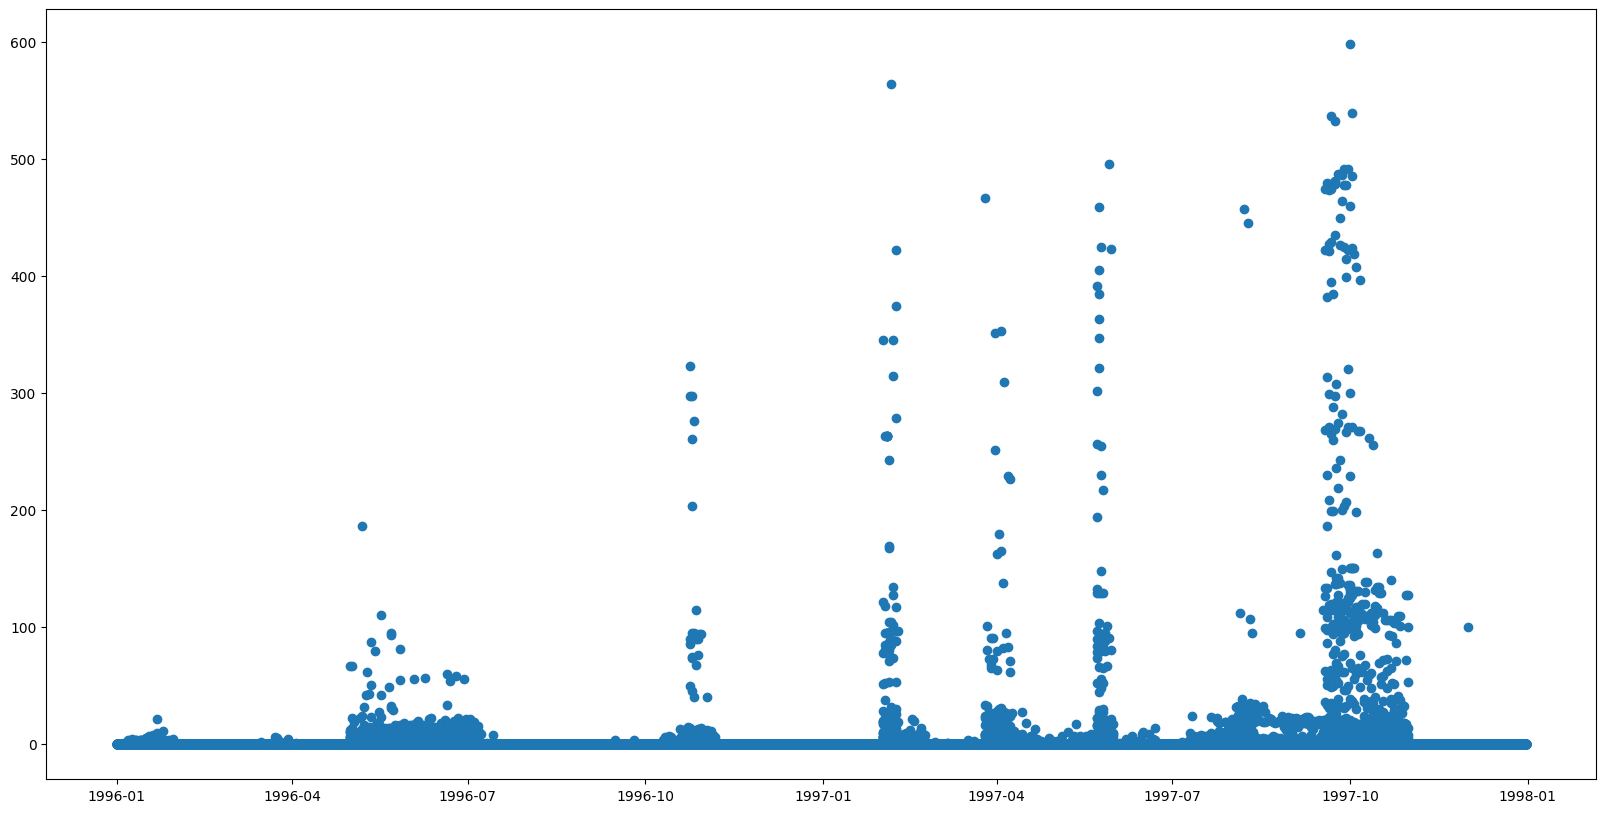

In [65]:


plt.figure(figsize=(20,10))
plt.scatter(data.fillna(method ='bfill')['date'], data.fillna(method ='ffill')['volume_litr'])

In [298]:
data.fillna(method ='bfill', inplace=True)
data

date     city           product          sum             Тип  \
0     1996-01-01  Абердин    Безалкогольное   141.007667  Безалкогольный   
1     1996-01-01  Абердин    Огненный виски   255.188103     Алкогольный   
2     1996-01-01  Абердин    Сливочное пиво  1119.927917     Алкогольный   
3     1996-01-01  Абердин  Смородиновый ром    26.628389     Алкогольный   
4     1996-01-01  Абердин     Чешуя дракона   492.548590     Алкогольный   
...          ...      ...               ...          ...             ...   
32120 1997-12-31    Салем    Безалкогольное  1654.001331  Безалкогольный   
32121 1997-12-31    Салем    Огненный виски  1365.207233     Алкогольный   
32122 1997-12-31    Салем    Сливочное пиво  3790.941219     Алкогольный   
32123 1997-12-31    Салем  Смородиновый ром   241.840409     Алкогольный   
32124 1997-12-31    Салем     Чешуя дракона  4687.566740     Алкогольный   

       volume_litr  Турнир трех волшебников за метлы  Клинок за пророк  \
0         0.000006                                 0                 0   
1         0.000006                                 0                 0   
2         0.000002                                 0                 0   
3         0.000009                                 0                 0   
4         0.000005                                 0                 0   
...            ...                               ...               ...   
32120     0.000023                                 0                 0   
32121     0.000019                                 0                 0   
32122     0.000027                                 0                 0   
32123     0.000020                                 0                 0   
32124     0.000021                                 0                 0   

       Квоффл в кольцо  None  ...  Back to Hogwarts  Газета "Придира"  \
0                    0     1  ...                 0                 0   
1                    0     1  ...                 0                 0   
2                    0     1  ...                 0                 0   
3                    0     1  ...                 0                 0   
4                    0     1  ...                 0                 0   
...                ...   ...  ...               ...               ...   
32120                0     0  ...                 0                 0   
32121                0     0  ...                 0                 0   
32122                0     0  ...                 0                 0   
32123                0     0  ...                 0                 0   
32124                0     0  ...                 0                 0   

       Лавка Оливандера октябрь  Акция при поимке Пикси от 15 литров напитков  \
0                             0                                             0   
1                             0                                             0   
2                             0                                             0   
3                             0                                             0   
4                             0                                             0   
...                         ...                                           ...   
32120                         0                                             0   
32121                         0                                             0   
32122                         0                                             0   
32123                         0                                             0   
32124                         0                                             0   

       Газета "Придира" -2 кната не более 25 литров  Акций одновременно  \
0                                                 0                   1   
1                                                 0                   1   
2                                                 0                   1   
3                                                 0         

# Вывод итоговой таблицы 

In [68]:
def return_df(df):
  df_si_level = df.reset_index( level = [0] )
  df_si_level.reset_index(inplace=True)
  return df_si_level
data1 = return_df(data.groupby(by=['date']).agg({'volume_litr':'sum', 'sum':'sum'}))

In [69]:
data1

index       date  volume_litr            sum
0        0 1996-01-01     0.532185   44748.650065
1        1 1996-01-02     0.063002   73016.131664
2        2 1996-01-03     0.441541   83819.678884
3        3 1996-01-04     0.000908   84257.724263
4        4 1996-01-05     1.056464   83823.677765
..     ...        ...          ...            ...
726    726 1997-12-27     0.001128  118495.586993
727    727 1997-12-28     0.001156  127066.483448
728    728 1997-12-29     0.001146  135182.720698
729    729 1997-12-30     0.001097  149134.909416
730    730 1997-12-31     0.001136  110817.036016

[731 rows x 4 columns]

In [70]:
data_output = data1.merge(promo).drop_duplicates(subset=['date'])
data_output.drop(columns=['index', 'city'], axis=1, inplace=True)
data_output.reset_index(drop=True, inplace=True)
data_output

date  volume_litr            sum  Турнир трех волшебников за метлы  \
0   1996-01-01     0.532185   44748.650065                                 0   
1   1996-01-02     0.063002   73016.131664                                 0   
2   1996-01-03     0.441541   83819.678884                                 0   
3   1996-01-04     0.000908   84257.724263                                 0   
4   1996-01-05     1.056464   83823.677765                                 0   
..         ...          ...            ...                               ...   
726 1997-12-27     0.001128  118495.586993                                 0   
727 1997-12-28     0.001156  127066.483448                                 0   
728 1997-12-29     0.001146  135182.720698                                 0   
729 1997-12-30     0.001097  149134.909416                                 0   
730 1997-12-31     0.001136  110817.036016                                 0   

     Клинок за пророк  Квоффл в кольцо  None  Конфетки за метки  \
0                   0                0     1                  0   
1                   0                0     1                  0   
2                   0                0     1                  0   
3                   0                0     1                  0   
4                   0                0     1                  0   
..                ...              ...   ...                ...   
726                 0                0     0                  0   
727                 0                0     0                  0   
728                 0                0     0                  0   
729                 0                0     0                  0   
730                 0                0     0                  0   

     Обмен любезностями  Лучше золотой снитч в руках, чем гиппогриф в небе  \
0                     0                                                  0   
1                     0                                                  0   
2                     0                                                  0   
3                     0                                                  0   
4                     0                                                  0   
..                  ...                                                ...   
726                   0                                                  0   
727                   0                                                  0   
728                   0                                                  0   
729                   0                                                  0   
730                   0                                                  0   

     ...  Библиотеки Куокворта купоны на скидку  Настоящий мародер  \
0    ...                                      0                  0   
1    ...                                      0                  0   
2    ...                                      0                  0   
3    ...                                      0                  0   
4    ...                                      0                  0   
..   ...                                    ...                ...   
726  ...                                      0                  0   
727  ...                                      0                  0   
728  ...                                      0                  0   
729  ...                                      0                  0   
730  ...                                      0                  0   

     Флориш и Блоттс май   Флориш и Блоттс июнь  Back to Hogwarts  \
0                       0                     0                 0   
1                       0                     0                 0   
2                       0                     0                 0   
3                       0                     0                 0   
4                       0                     0                 0   
..                    ...                   ...     

In [71]:
data_output.to_excel('D:/Downloads/Data Science/Data Science/Data Science/Итоговая_таблица.xlsx')

#  ФИЧИ: Сезонность, день недели и страна 

Добавим фичи, связанные с сезонностью, днем недели и страной, в который находятся города 

In [299]:
def season(ser):
    for k in seasons.keys():
        if ser in k:
            return seasons[k]
def day(ser):
    for k in work_weekend.keys():
        if ser in k:
            return work_weekend[k]
def country_(ser):
    for k in country.keys():
        if ser in k:
            return country[k]

dates = ['date']
country =  {('Абердин', 'Авимор', 'Бат','Даффтаун','Коукворт', 'Кромер', 'Литтл Уингинг', 'Лондон'): 1, ('Нью-Йорк', 'Салем'): 0, ('Париж'):2}
seasons = {(1, 12, 2): 1, (3, 4, 5): 2, (6, 7, 8): 3, (9, 10, 11): 4}
work_weekend = {('Monday', 'Tuesday', 'Wednesday','Thursday','Friday'): 1, ('Saturday', 'Sunday'): 0}

for col in dates:
  a = pd.DataFrame()
  a[col] = data[col].dt.day_name()
  data['day_of_week'] = a[col].apply(day)

  #data['month'] = data[col].dt.month #
  # data[col + ' d'] = data[col].dt.day #
  # data[col + ' y'] = data[col].dt.year #


  data['season'] = data[col].dt.month.apply(season)

# data.drop(dates, axis = 1 ,inplace = True) #
data['Страна'] = data['city'].apply(country_)
data.fillna(0, inplace=True)
data

date     city           product          sum             Тип  \
0     1996-01-01  Абердин    Безалкогольное   141.007667  Безалкогольный   
1     1996-01-01  Абердин    Огненный виски   255.188103     Алкогольный   
2     1996-01-01  Абердин    Сливочное пиво  1119.927917     Алкогольный   
3     1996-01-01  Абердин  Смородиновый ром    26.628389     Алкогольный   
4     1996-01-01  Абердин     Чешуя дракона   492.548590     Алкогольный   
...          ...      ...               ...          ...             ...   
32120 1997-12-31    Салем    Безалкогольное  1654.001331  Безалкогольный   
32121 1997-12-31    Салем    Огненный виски  1365.207233     Алкогольный   
32122 1997-12-31    Салем    Сливочное пиво  3790.941219     Алкогольный   
32123 1997-12-31    Салем  Смородиновый ром   241.840409     Алкогольный   
32124 1997-12-31    Салем     Чешуя дракона  4687.566740     Алкогольный   

       volume_litr  Турнир трех волшебников за метлы  Клинок за пророк  \
0         0.000006                                 0                 0   
1         0.000006                                 0                 0   
2         0.000002                                 0                 0   
3         0.000009                                 0                 0   
4         0.000005                                 0                 0   
...            ...                               ...               ...   
32120     0.000023                                 0                 0   
32121     0.000019                                 0                 0   
32122     0.000027                                 0                 0   
32123     0.000020                                 0                 0   
32124     0.000021                                 0                 0   

       Квоффл в кольцо  None  ...  \
0                    0     1  ...   
1                    0     1  ...   
2                    0     1  ...   
3                    0     1  ...   
4                    0     1  ...   
...                ...   ...  ...   
32120                0     0  ...   
32121                0     0  ...   
32122                0     0  ...   
32123                0     0  ...   
32124                0     0  ...   

       Акция при поимке Пикси от 15 литров напитков  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
32120                                             0   
32121                                             0   
32122                                             0   
32123                                             0   
32124                                             0   

       Газета "Придира" -2 кната не более 25 литров  Акций одновременно  \
0                                                 0                   1   
1                                                 0                   1   
2                                                 0                   1   
3                                                 0                   1   
4                                                 0                   1   
...                                             ...                 ...   
32120                                             0                   4   
32121                                             0                   4   
32122                                             0                   4   
32123                                             0                   4   
32124                                             0                   4   

       volume_per_client_alc_Орден Феникса  \
0                                41.229288   
1                                41.229288   
2                                41.229288   
3                  

In [300]:
target_cols = ['volume_litr']
train_cols = data.columns.values.tolist()
train_cols.remove('volume_litr')

# Энкодинг

In [301]:
disc_cols = ['city', 'product','Тип']
le = preprocessing.LabelEncoder()
for item in disc_cols:
  encoded = le.fit_transform(data[item])
  data[item] = encoded

In [74]:
data

date  city  product          sum  Тип  volume_litr  \
0     1996-01-01     0        0   141.007667    1     0.000006   
1     1996-01-01     0        1   255.188103    0     0.000006   
2     1996-01-01     0        2  1119.927917    0     0.000002   
3     1996-01-01     0        3    26.628389    0     0.000009   
4     1996-01-01     0        4   492.548590    0     0.000005   
...          ...   ...      ...          ...  ...          ...   
32120 1997-12-31    10        0  1654.001331    1     0.000023   
32121 1997-12-31    10        1  1365.207233    0     0.000019   
32122 1997-12-31    10        2  3790.941219    0     0.000027   
32123 1997-12-31    10        3   241.840409    0     0.000020   
32124 1997-12-31    10        4  4687.566740    0     0.000021   

       Турнир трех волшебников за метлы  Клинок за пророк  Квоффл в кольцо  \
0                                     0                 0                0   
1                                     0                 0                0   
2                                     0                 0                0   
3                                     0                 0                0   
4                                     0                 0                0   
...                                 ...               ...              ...   
32120                                 0                 0                0   
32121                                 0                 0                0   
32122                                 0                 0                0   
32123                                 0                 0                0   
32124                                 0                 0                0   

       None  ...  Акция при поимке Пикси от 15 литров напитков  \
0         1  ...                                             0   
1         1  ...                                             0   
2         1  ...                                             0   
3         1  ...                                             0   
4         1  ...                                             0   
...     ...  ...                                           ...   
32120     0  ...                                             0   
32121     0  ...                                             0   
32122     0  ...                                             0   
32123     0  ...                                             0   
32124     0  ...                                             0   

       Газета "Придира" -2 кната не более 25 литров  Акций одновременно  \
0                                                 0                   1   
1                                                 0                   1   
2                                                 0                   1   
3                                                 0                   1   
4                                                 0                   1   
...                                             ...                 ...   
32120                                             0                   4   
32121                                             0                   4   
32122                                             0                   4   
32123                                             0                   4   
32124                                             0                   4   

       volume_per_client_alc_Орден Феникса  \
0                                41.229288   
1                                41.229288   
2                                41.229288   
3                                41.229288   
4                                41.229288   
...                                    ...   
32120                           227.156807   
32121                           227.156807   
32122                           227.156807   
32123                           227.156807   
32124                           227.156807   

       volume_per_client_nalc_Орден

# Исследование

Посмотрим на зависимость таргета от каждой из фичей

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


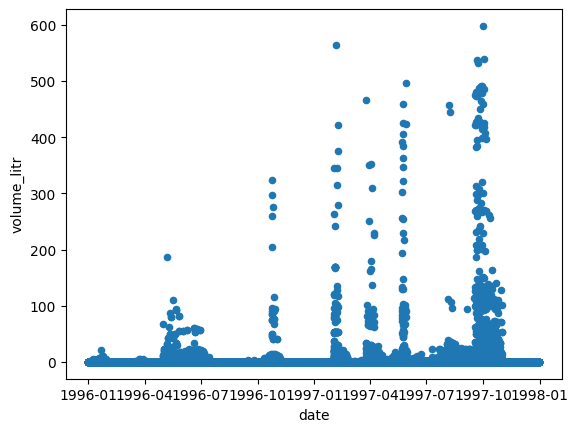

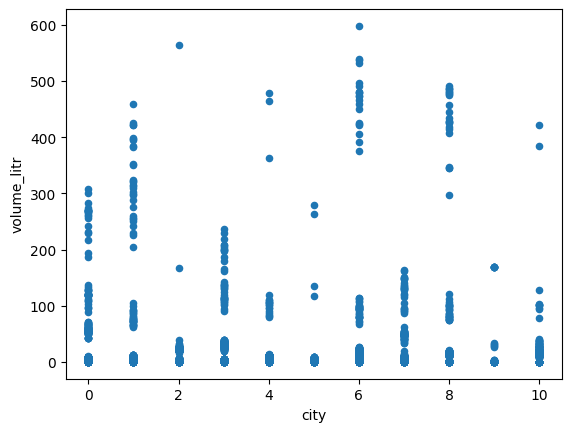

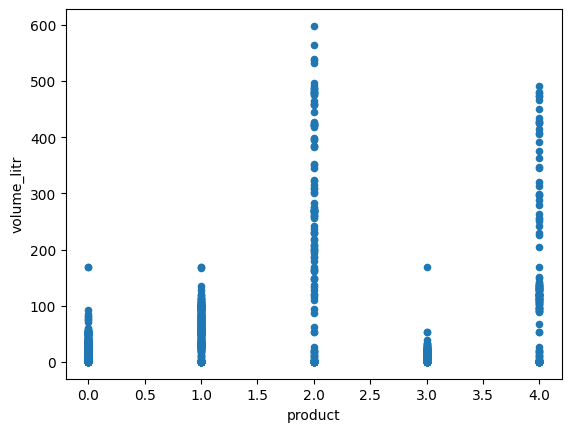

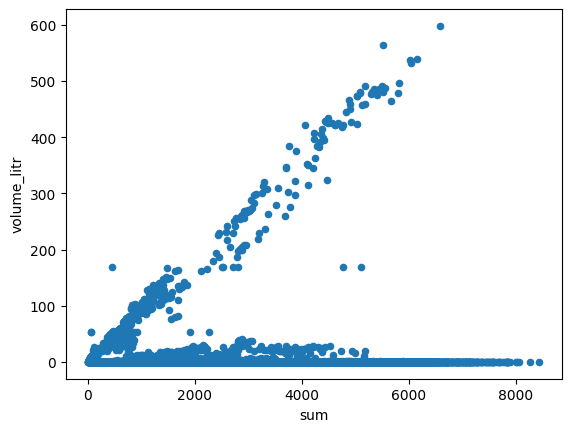

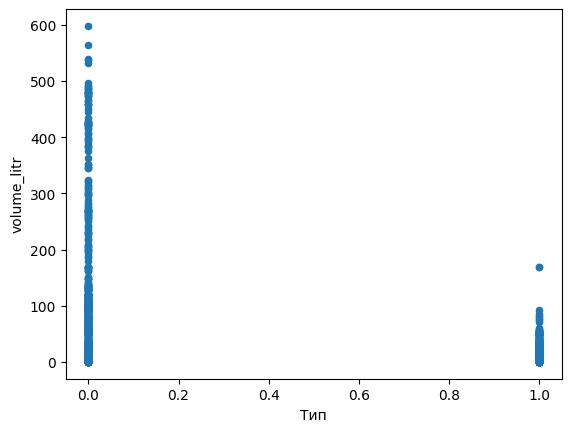

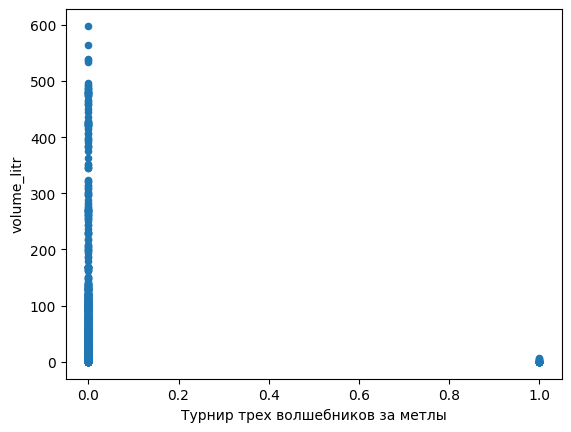

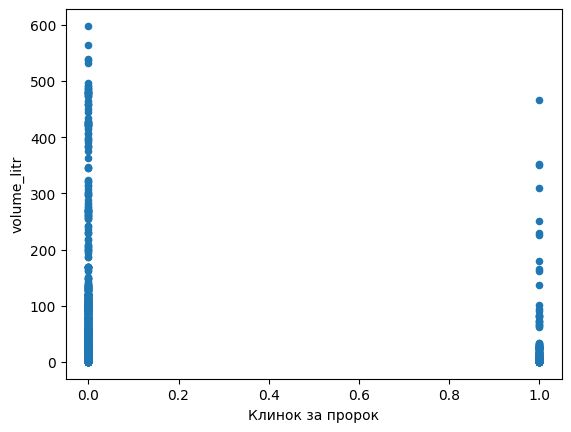

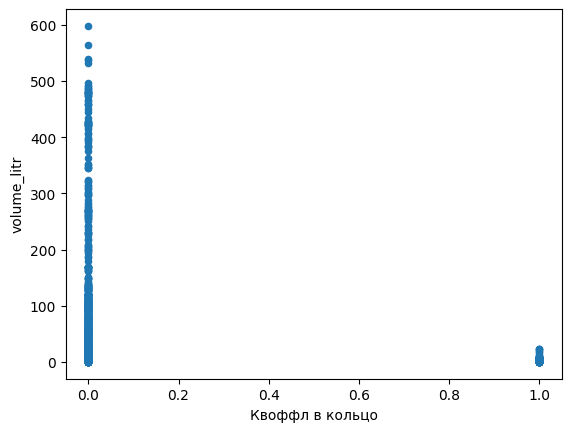

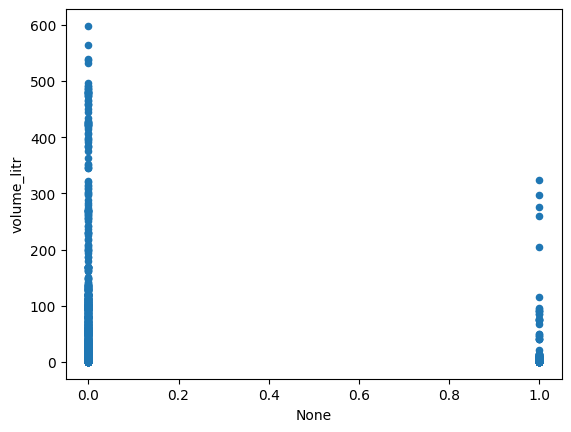

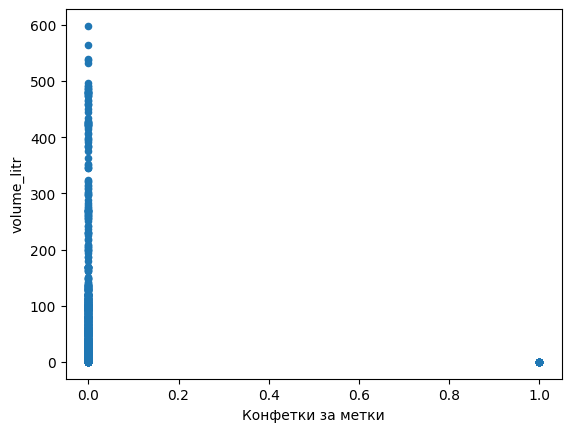

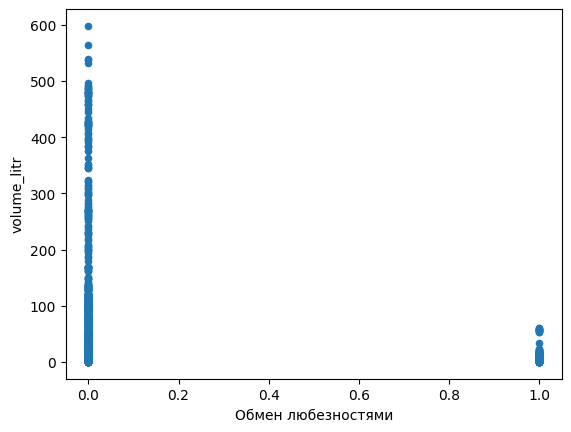

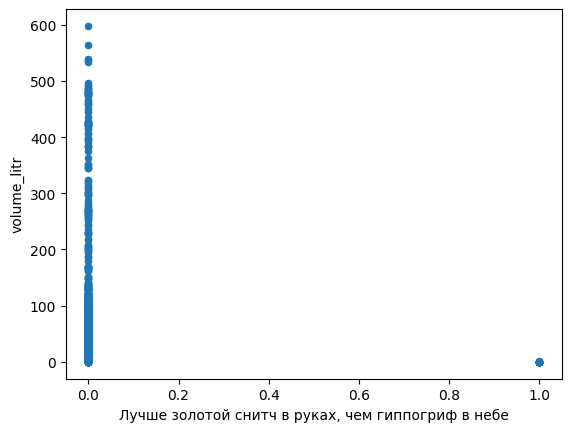

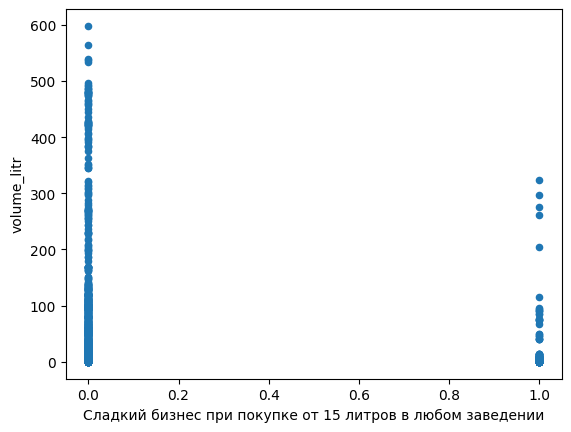

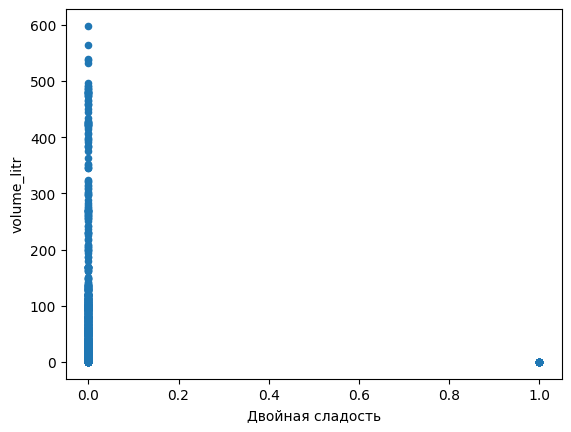

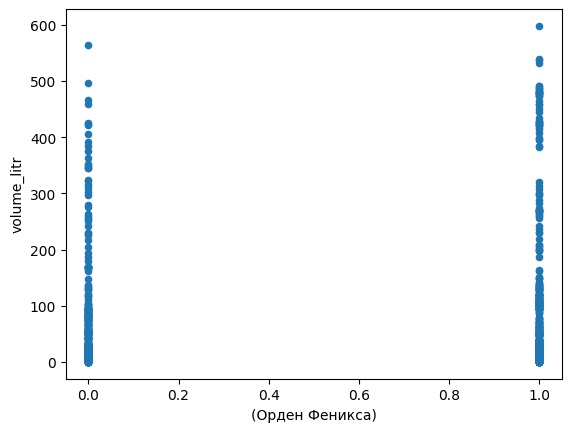

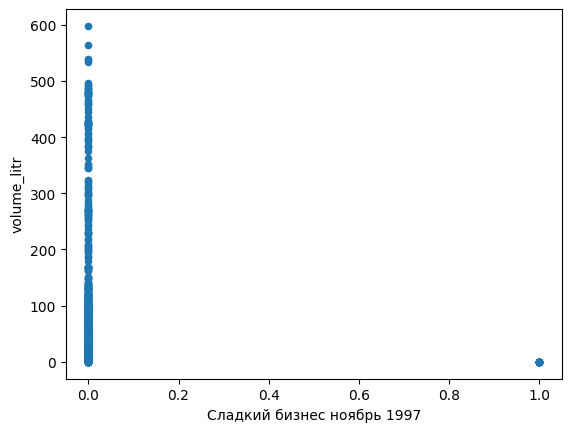

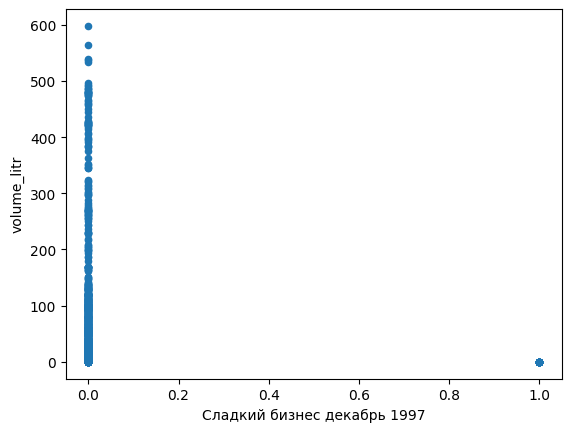

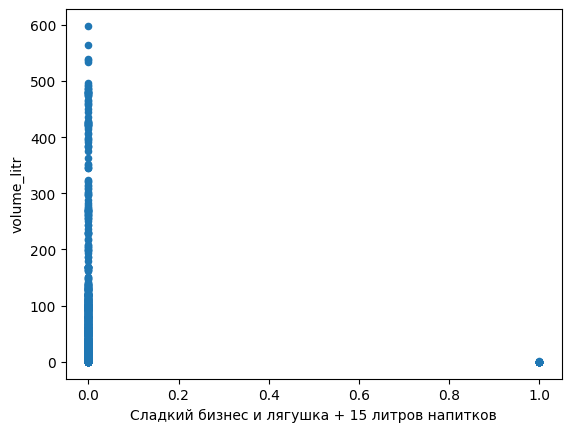

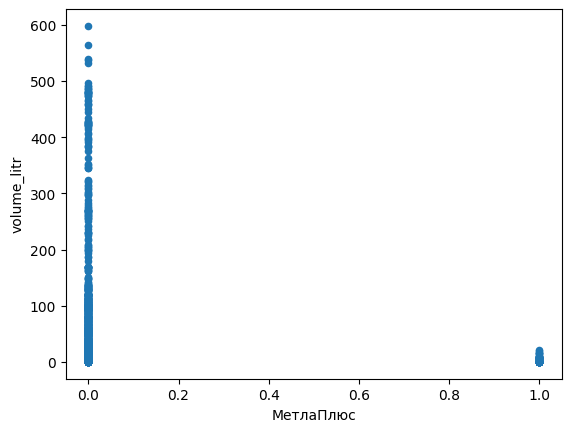

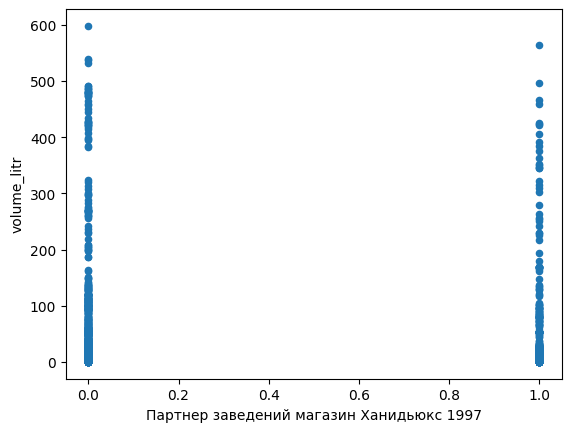

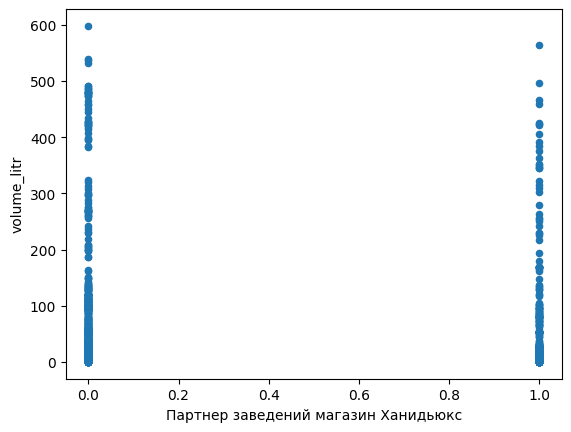

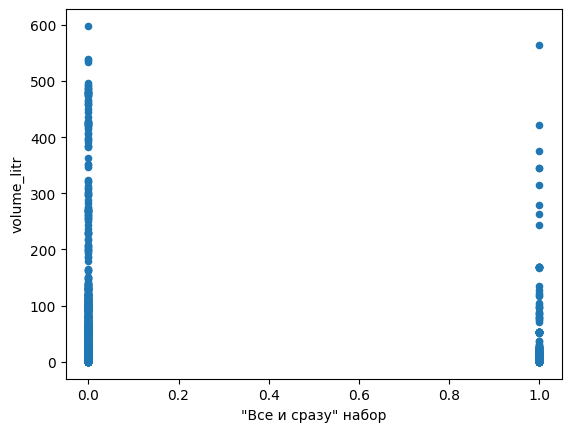

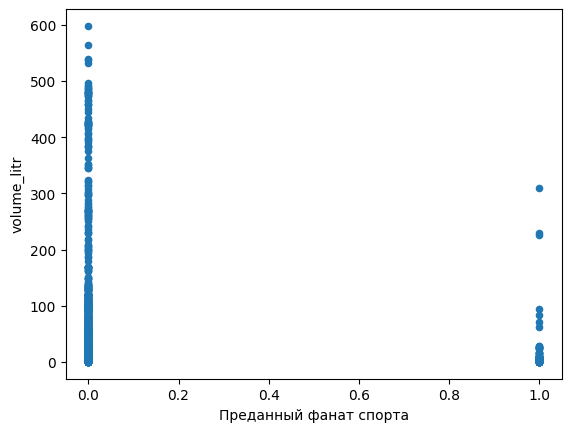

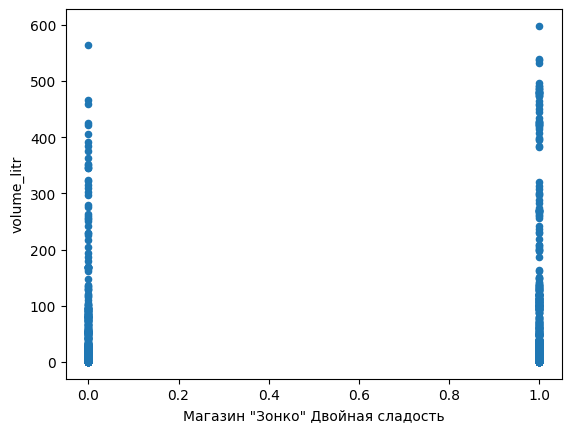

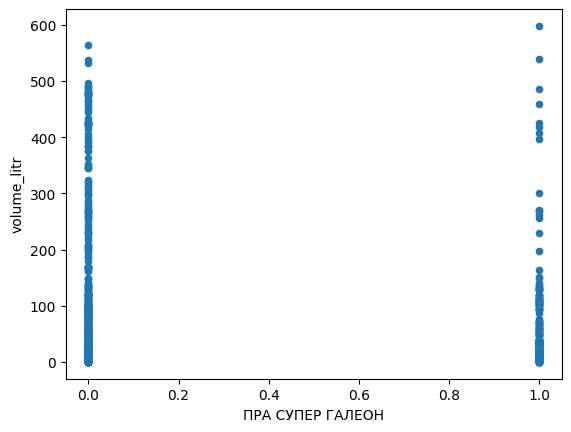

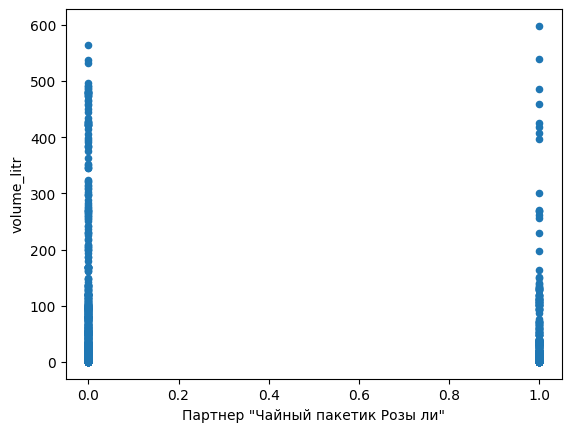

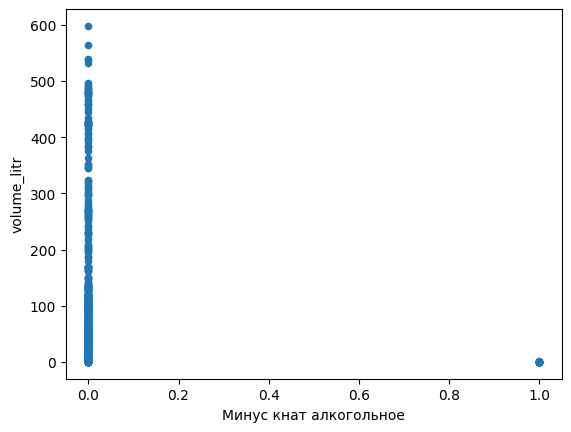

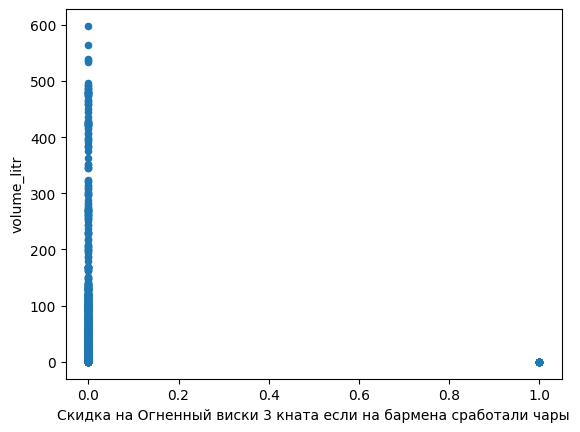

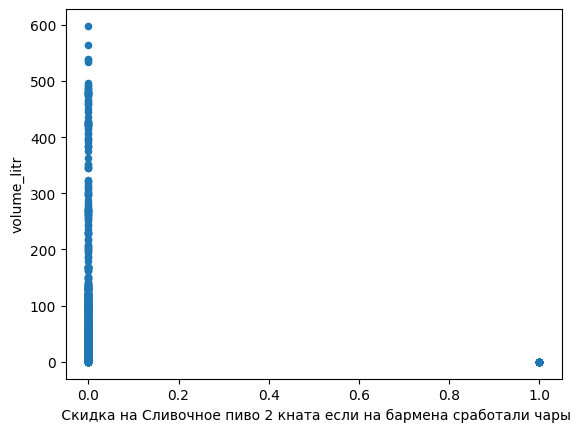

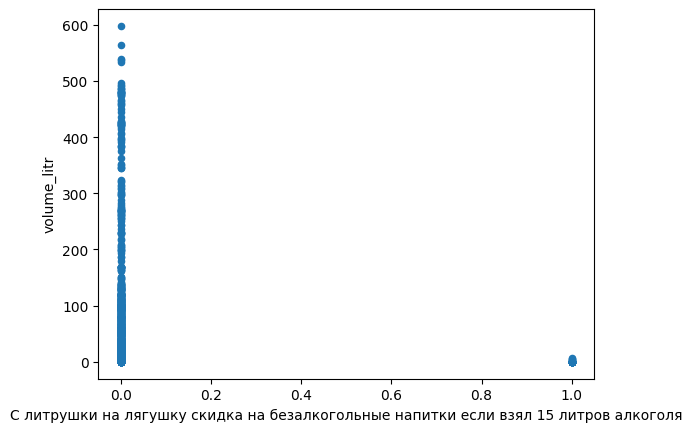

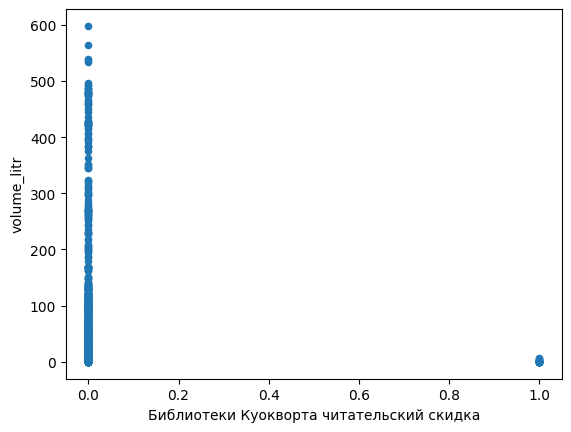

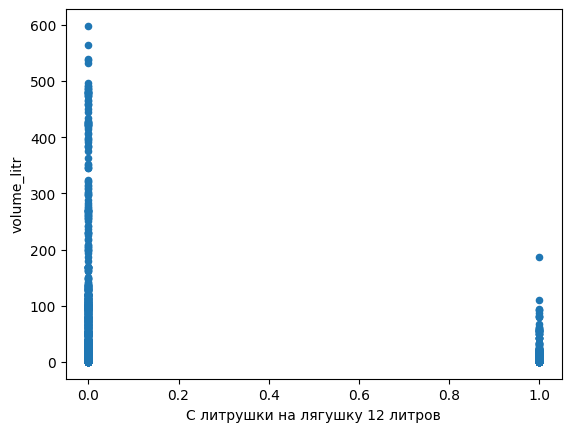

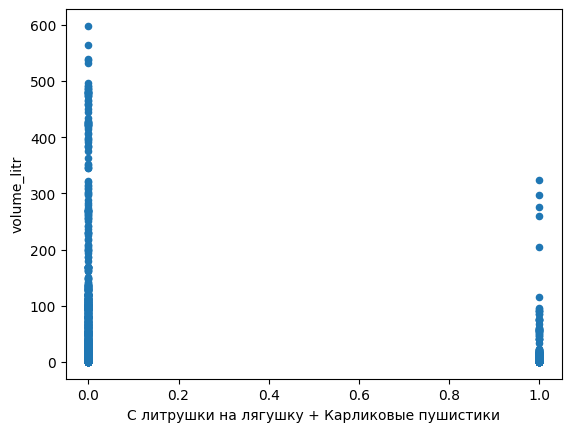

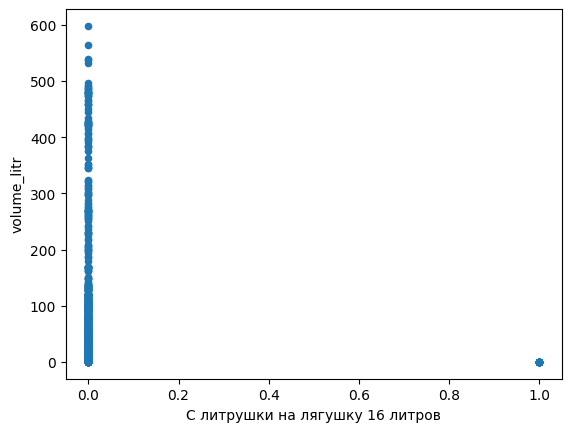

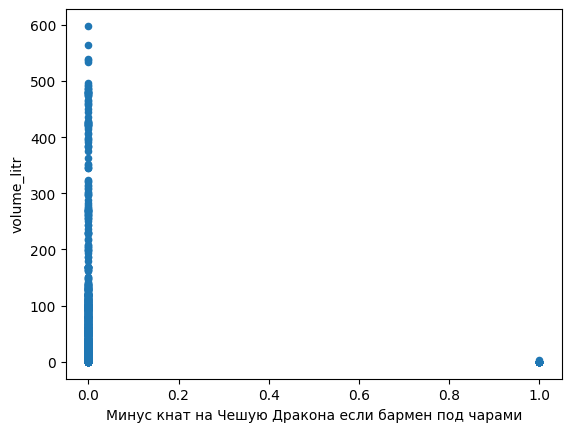

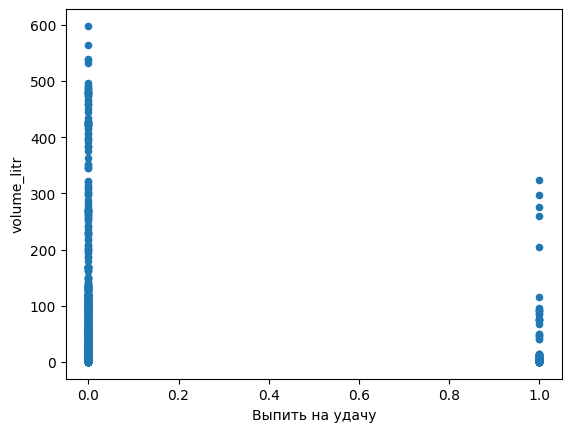

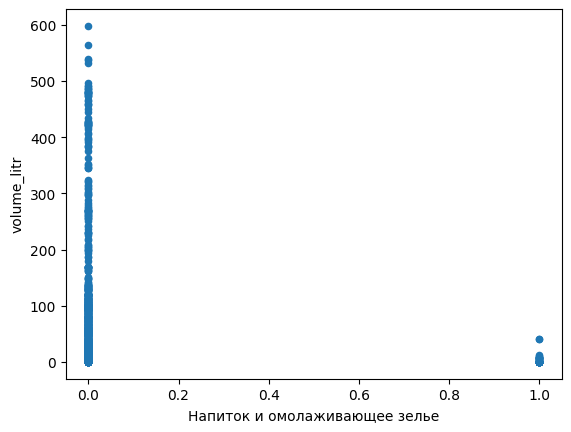

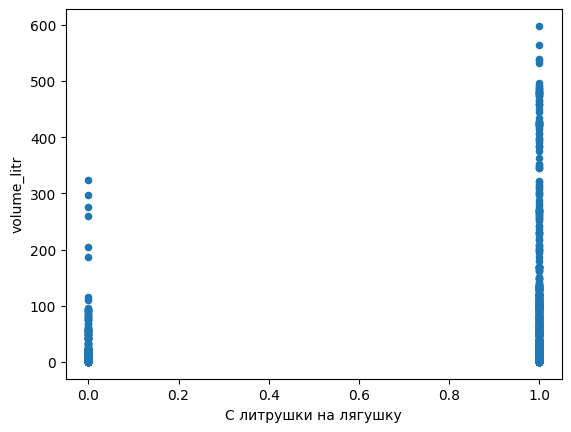

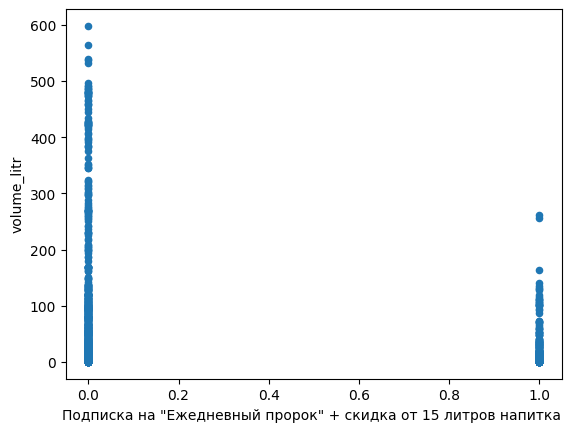

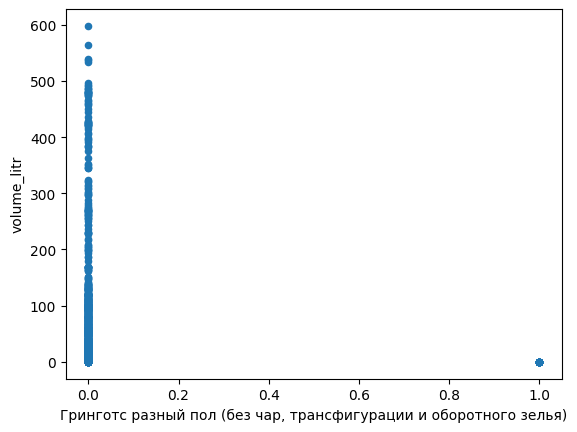

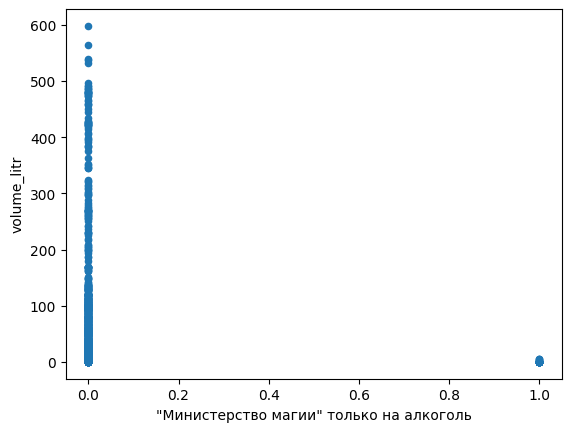

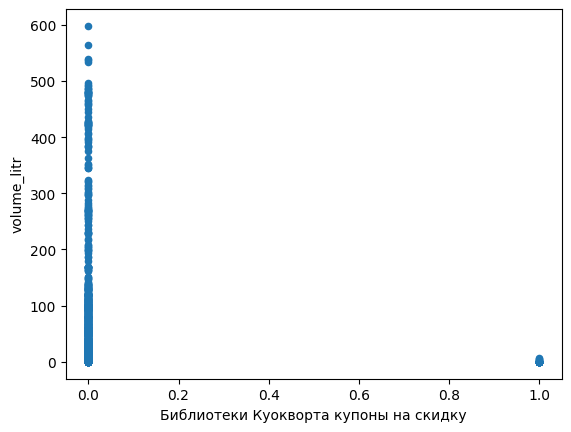

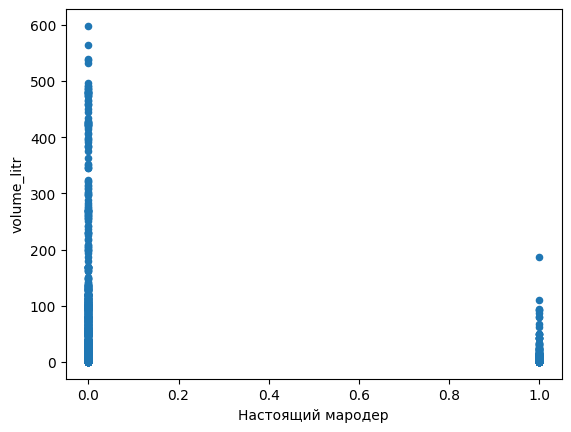

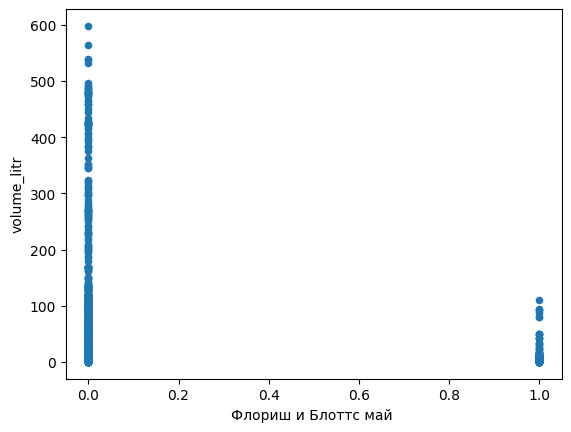

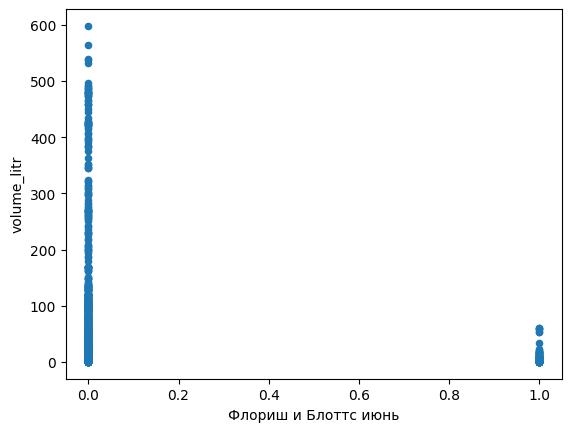

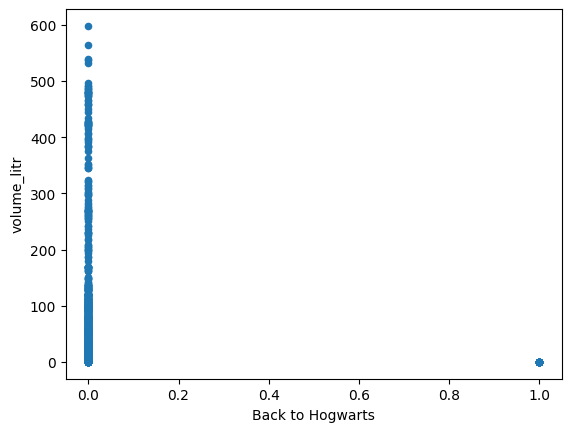

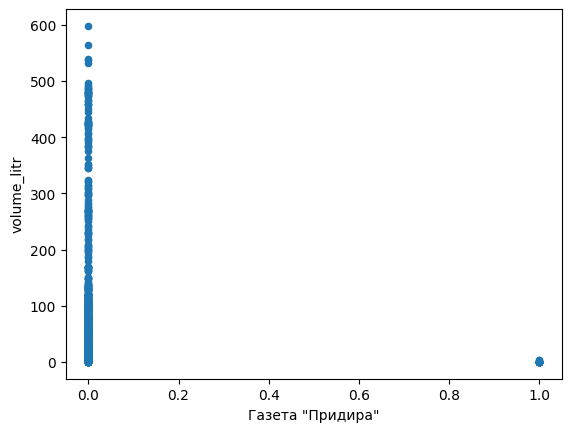

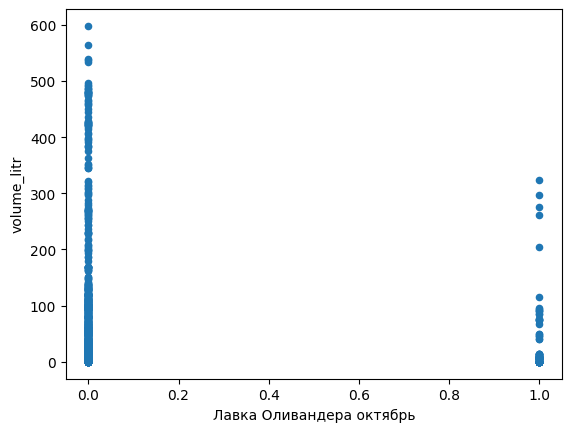

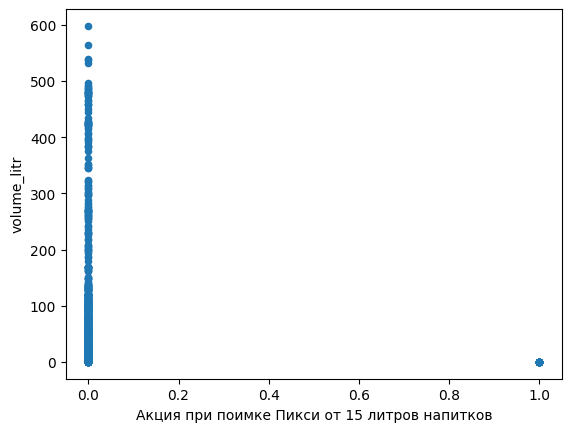

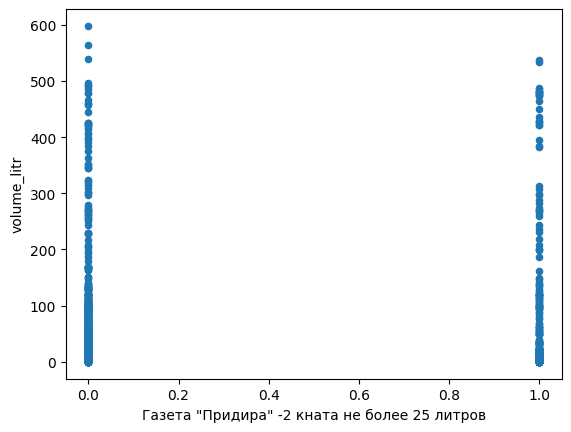

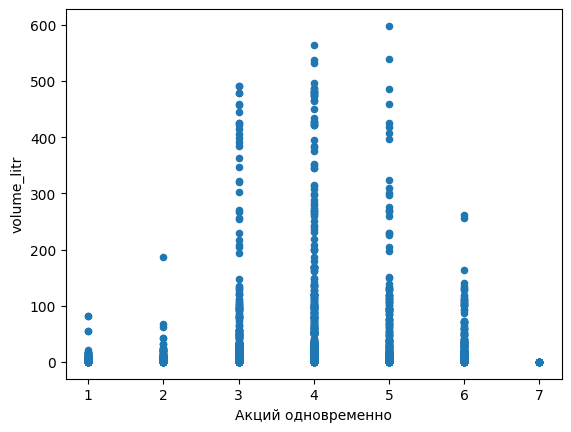

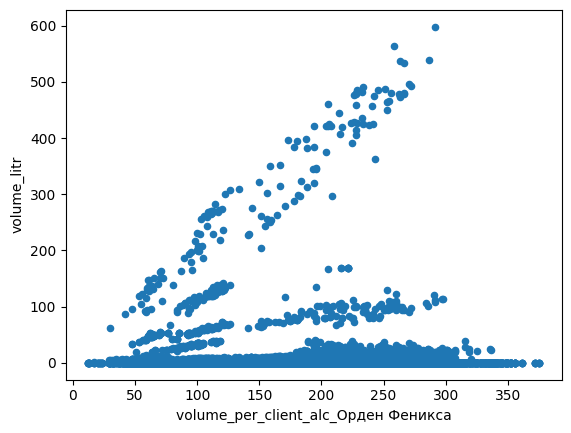

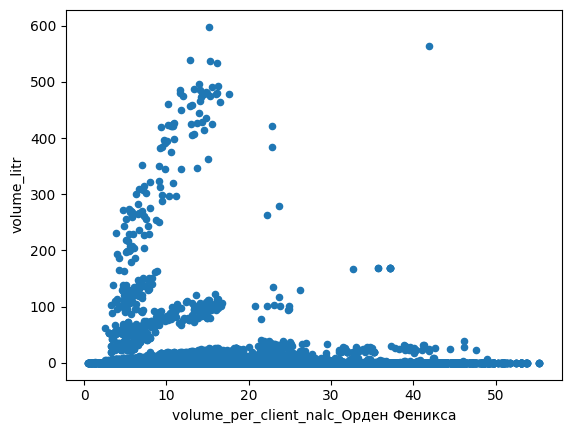

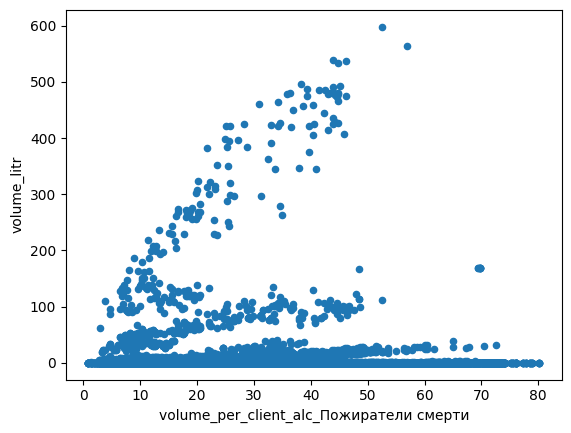

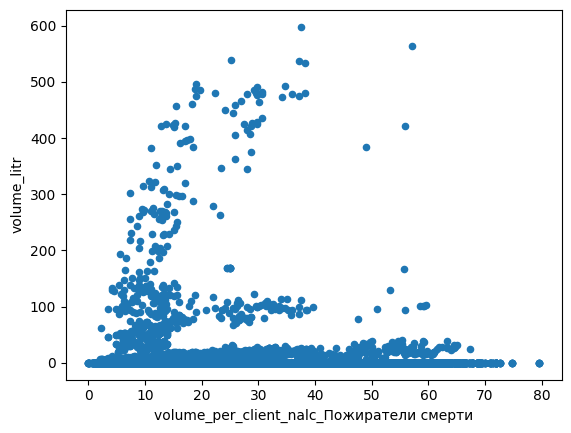

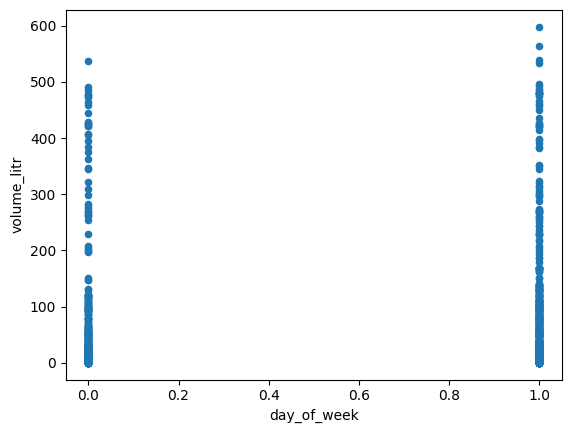

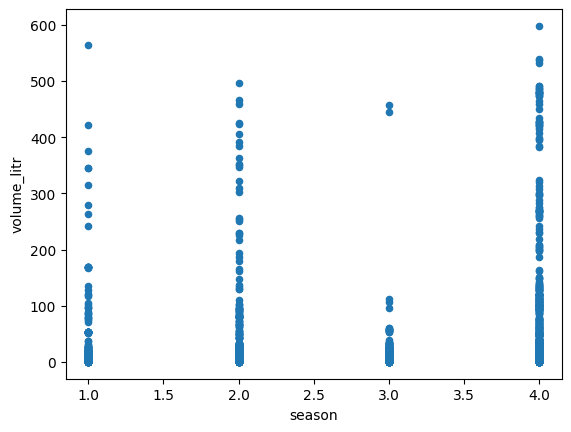

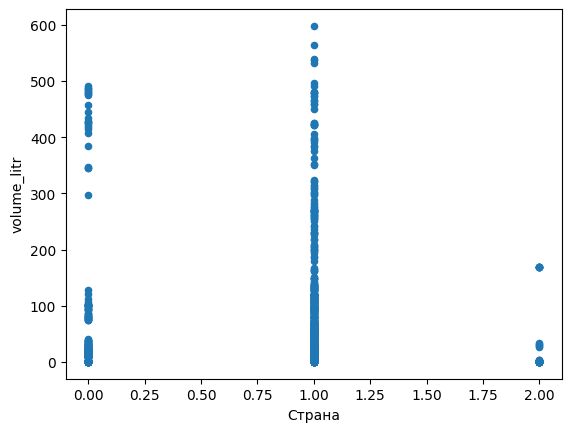

In [75]:

for idx, feature in enumerate(train_cols):
    data.plot(feature, "volume_litr", subplots=True, kind="scatter")

In [76]:
data.dtypes

date                                                                                   datetime64[ns]
city                                                                                            int32
product                                                                                         int32
sum                                                                                           float64
Тип                                                                                             int32
volume_litr                                                                                   float64
Турнир трех волшебников за метлы                                                                int64
Клинок за пророк                                                                                int64
Квоффл в кольцо                                                                                 int64
None                                                                              

Посчитаем матрицу корелляциии для колонок 

---

Между непрерывными колонками - корелляция пирскона 


---

Между дискретнымии, а также между дискретными и непрерывными - корелляция Спирмена

In [77]:
cont_cols = ['sum','volume_litr','volume_per_client_alc_Орден Феникса', 'volume_per_client_nalc_Орден Феникса','volume_per_client_alc_Пожиратели смерти', 'volume_per_client_nalc_Пожиратели смерти' ]
cols = data.columns.values.tolist()
cols.remove('date')

corr_df = pd.DataFrame(columns = cols, index = cols)
pvaluesXcorrs = pd.DataFrame()
pv = []
cor = []
col1 = []
col2 = []
for i in corr_df.index.to_list(): #iterate over rows
  for j in corr_df.columns.to_list(): #iterate over columns
    if ((i in cont_cols) == True) and ((j in cont_cols) == True):
      corr_df.at[i, j] = scipy.stats.pearsonr(data[i].values,data[j].values).statistic
      if corr_df.at[i, j] > 0.5:
        pv.append(scipy.stats.pearsonr(data[i].values,data[j].values).pvalue)
        cor.append(corr_df.at[i, j])
        col1.append(i)
        col2.append(j)
    else:
      corr_df.at[i, j] = scipy.stats.spearmanr(data[i].values,data[j].values).correlation
      if corr_df.at[i, j] > 0.5:
        pv.append(scipy.stats.spearmanr(data[i].values,data[j].values).pvalue)
        cor.append(corr_df.at[i, j])
        col1.append(i)
        col2.append(j)



pvaluesXcorrs['col1'] = col1
pvaluesXcorrs['col2'] = col2
pvaluesXcorrs['Correlation'] = cor
pvaluesXcorrs['Pvalues'] = pv
pvaluesXcorrs = pvaluesXcorrs[pvaluesXcorrs['Correlation'] < 0.9 ]
pvaluesXcorrs.reset_index(drop=True, inplace=True)
corr_df = corr_df.astype(float)

In [79]:
pvaluesXcorrs

col1  \
0            Турнир трех волшебников за метлы   
1            Турнир трех волшебников за метлы   
2            Турнир трех волшебников за метлы   
3            Турнир трех волшебников за метлы   
4                            Клинок за пророк   
..                                        ...   
99    volume_per_client_alc_Пожиратели смерти   
100   volume_per_client_alc_Пожиратели смерти   
101  volume_per_client_nalc_Пожиратели смерти   
102  volume_per_client_nalc_Пожиратели смерти   
103  volume_per_client_nalc_Пожиратели смерти   

                                                  col2  Correlation  Pvalues  
0    С литрушки на лягушку скидка на безалкогольные...     0.668106      0.0  
1             Библиотеки Куокворта читательский скидка     0.733802      0.0  
2                Библиотеки Куокворта купоны на скидку     0.816566      0.0  
3                                    Настоящий мародер     0.603679      0.0  
4                               Преданный фанат спорта     0.576836      0.0  
..                                                 ...          ...      ...  
99                volume_per_client_nalc_Орден Феникса     0.790931      0.0  
100           volume_per_client_nalc_Пожиратели смерти     0.614508      0.0  
101                volume_per_client_alc_Орден Феникса     0.641865      0.0  
102               volume_per_client_nalc_Орден Феникса     0.683727      0.0  
103            volume_per_client_alc_Пожиратели смерти     0.614508      0.0  

[104 rows x 4 columns]

Выведем корелляционную матрицу

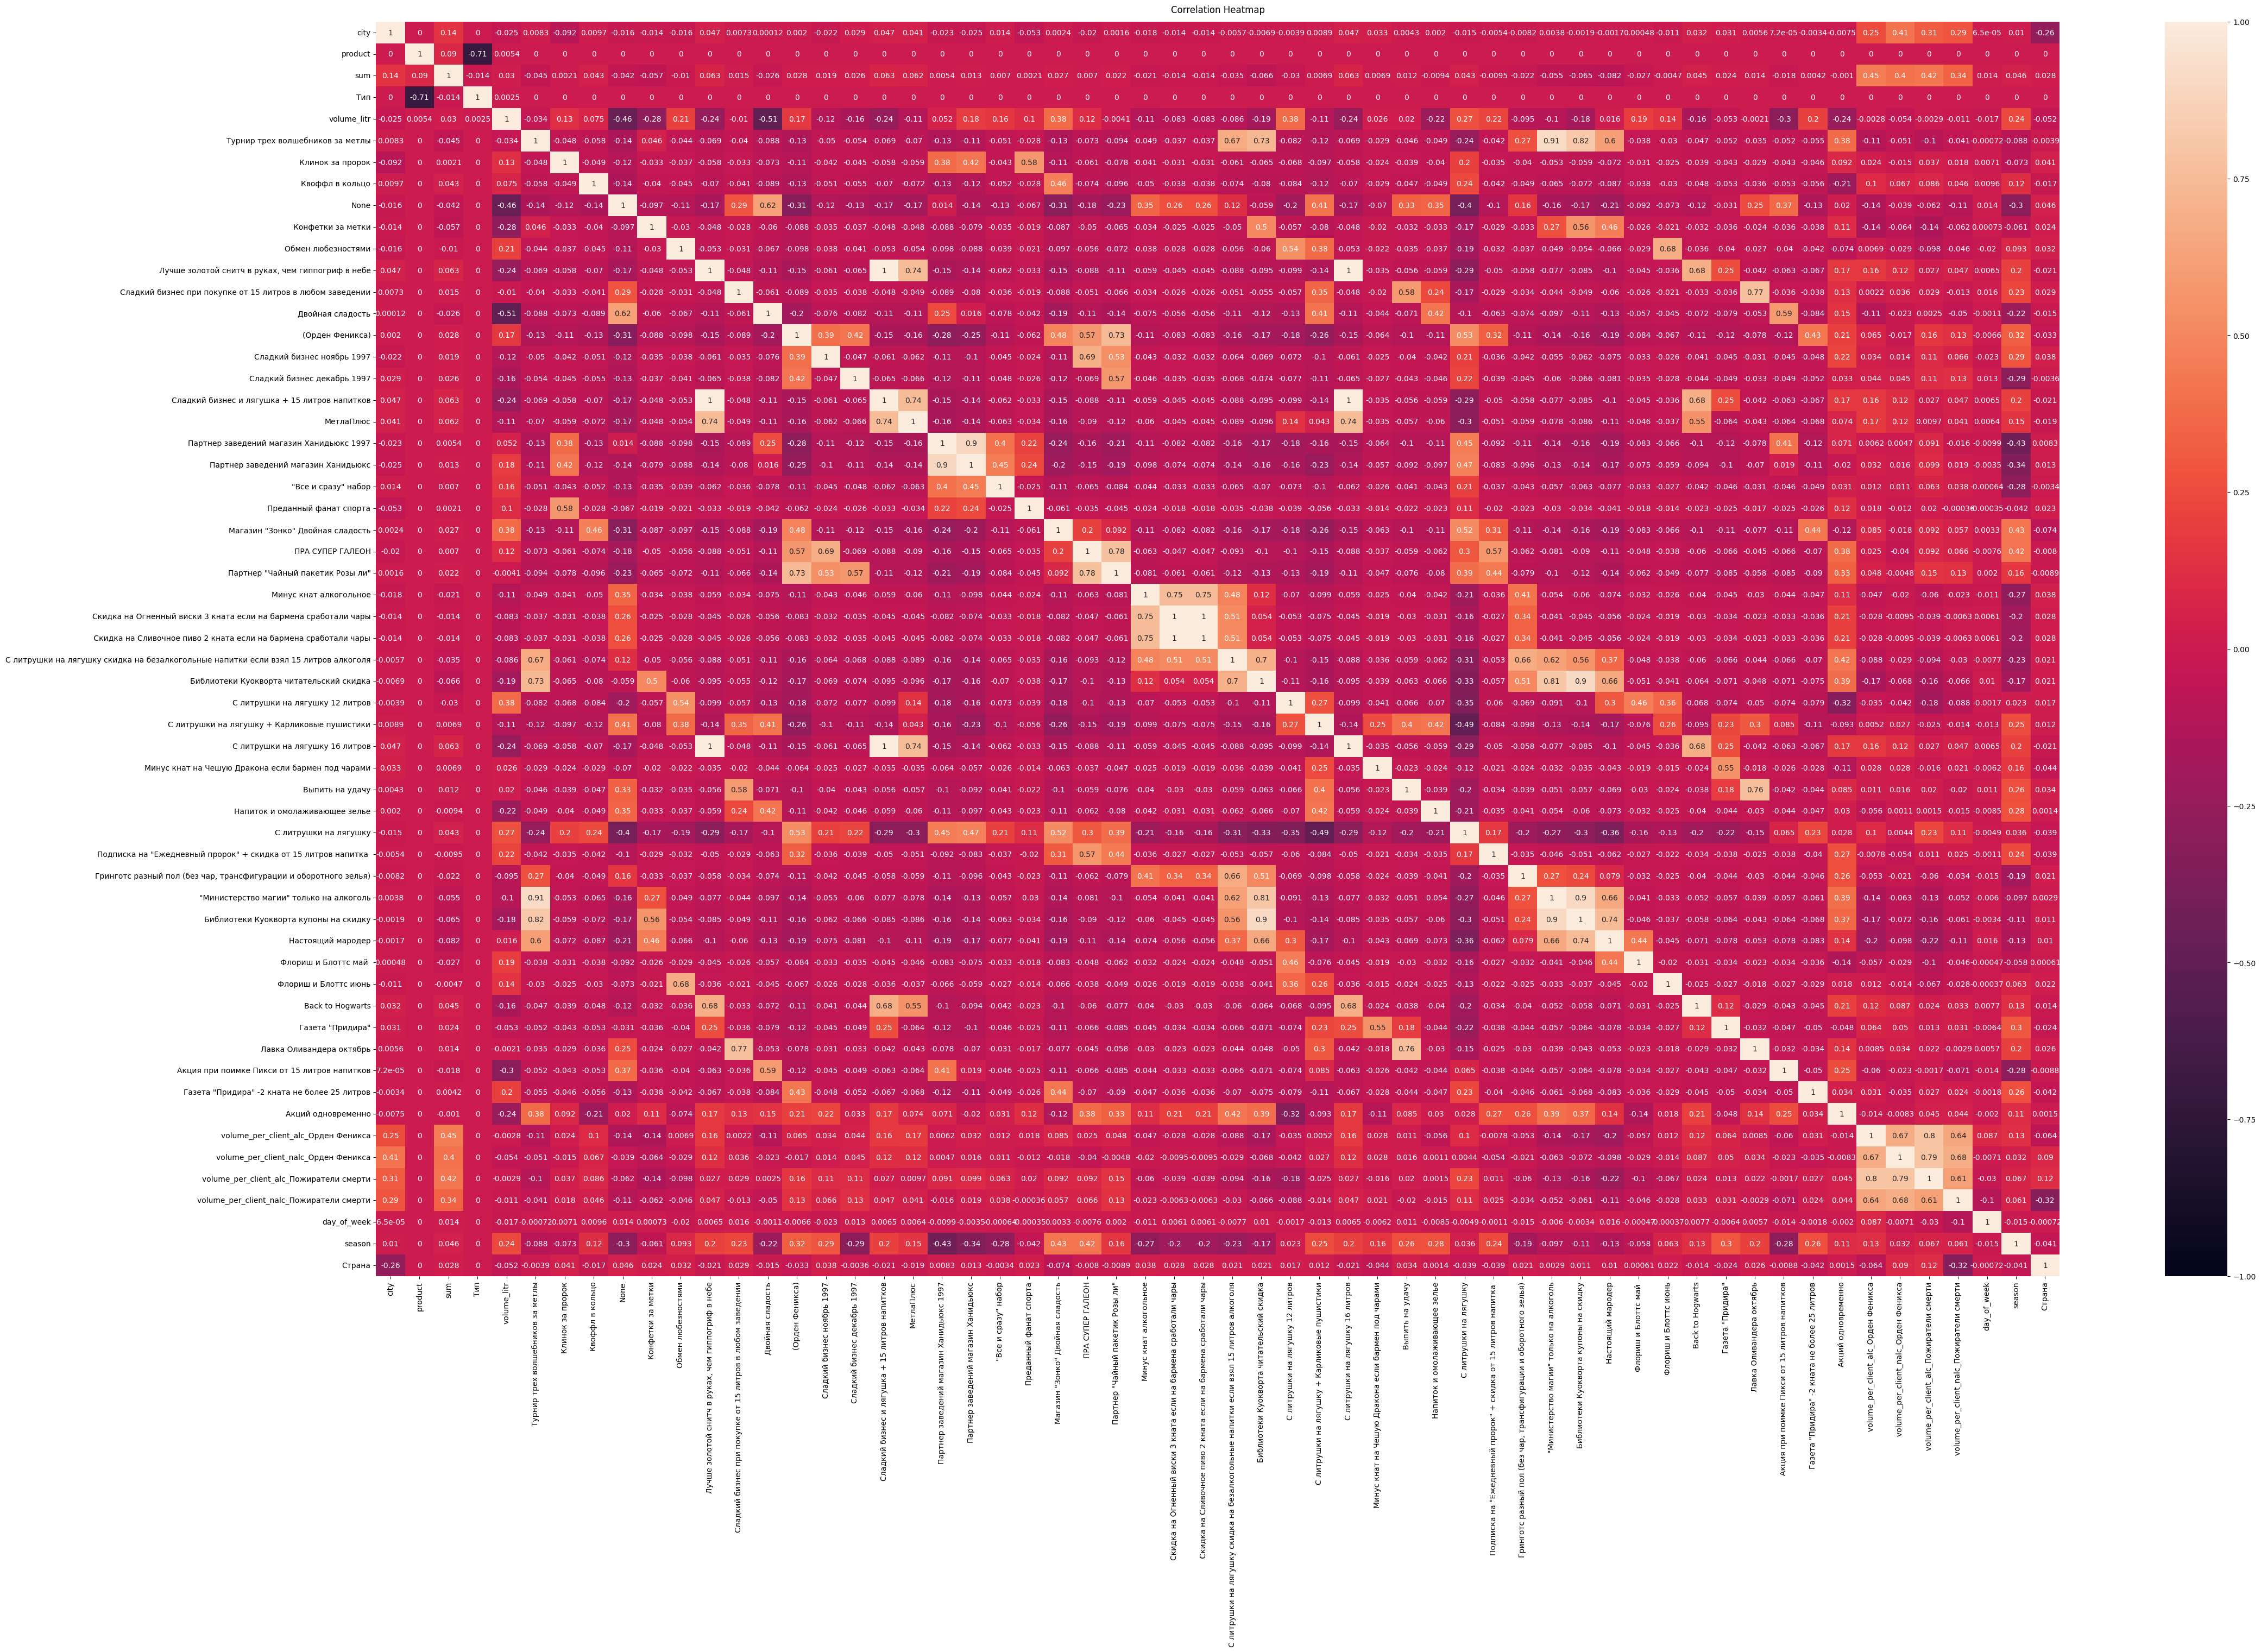

In [81]:
# Increase the size of the heatmap.
plt.figure(figsize=(50, 30))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
#pvaluesXcorrs

Между собой сиильно кореллируют количество выпитго по клиентам 

---

Можно сделать вывод, что оба клииента (Пожиратели смерти и Орден Феникса) пьют примерно с похожей завиисимостью


Кореллированные приизнакии можно попробовать объеденить 

In [306]:
#data['Клиенты выпили'] = data['volume_per_client_alc_Орден Феникса'] + data['volume_per_client_nalc_Орден Феникса'] + data['volume_per_client_alc_Пожиратели смерти'] + data['volume_per_client_nalc_Пожиратели смерти']
data['Орден Феникса'] = data['volume_per_client_alc_Орден Феникса'] + data['volume_per_client_nalc_Орден Феникса']
data['Пожиратели смерти'] = + data['volume_per_client_alc_Пожиратели смерти'] + data['volume_per_client_nalc_Пожиратели смерти']
data.drop(columns=['volume_per_client_alc_Орден Феникса', 'volume_per_client_nalc_Орден Феникса','volume_per_client_alc_Пожиратели смерти', 'volume_per_client_nalc_Пожиратели смерти'], axis=1, inplace=True )
data

date  city  product          sum  Тип  volume_litr  \
0     1996-01-01     0        0   141.007667    1     0.000006   
1     1996-01-01     0        1   255.188103    0     0.000006   
2     1996-01-01     0        2  1119.927917    0     0.000002   
3     1996-01-01     0        3    26.628389    0     0.000009   
4     1996-01-01     0        4   492.548590    0     0.000005   
...          ...   ...      ...          ...  ...          ...   
32120 1997-12-31    10        0  1654.001331    1     0.000023   
32121 1997-12-31    10        1  1365.207233    0     0.000019   
32122 1997-12-31    10        2  3790.941219    0     0.000027   
32123 1997-12-31    10        3   241.840409    0     0.000020   
32124 1997-12-31    10        4  4687.566740    0     0.000021   

       Турнир трех волшебников за метлы  Клинок за пророк  Квоффл в кольцо  \
0                                     0                 0                0   
1                                     0                 0                0   
2                                     0                 0                0   
3                                     0                 0                0   
4                                     0                 0                0   
...                                 ...               ...              ...   
32120                                 0                 0                0   
32121                                 0                 0                0   
32122                                 0                 0                0   
32123                                 0                 0                0   
32124                                 0                 0                0   

       None  ...  Газета "Придира"  Лавка Оливандера октябрь  \
0         1  ...                 0                         0   
1         1  ...                 0                         0   
2         1  ...                 0                         0   
3         1  ...                 0                         0   
4         1  ...                 0                         0   
...     ...  ...               ...                       ...   
32120     0  ...                 0                         0   
32121     0  ...                 0                         0   
32122     0  ...                 0                         0   
32123     0  ...                 0                         0   
32124     0  ...                 0                         0   

       Акция при поимке Пикси от 15 литров напитков  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
32120                                             0   
32121                                             0   
32122                                             0   
32123                                             0   
32124                                             0   

       Газета "Придира" -2 кната не более 25 литров  Акций одновременно  \
0                                                 0                   1   
1                                                 0                   1   
2                                                 0                   1   
3                                                 0                   1   
4                                                 0                   1   
...                                             ...                 ...   
32120                                             0                   4   
32121                                             0                   4   
32122                                             0                   4   
32123                                             0                   4   
32124                      

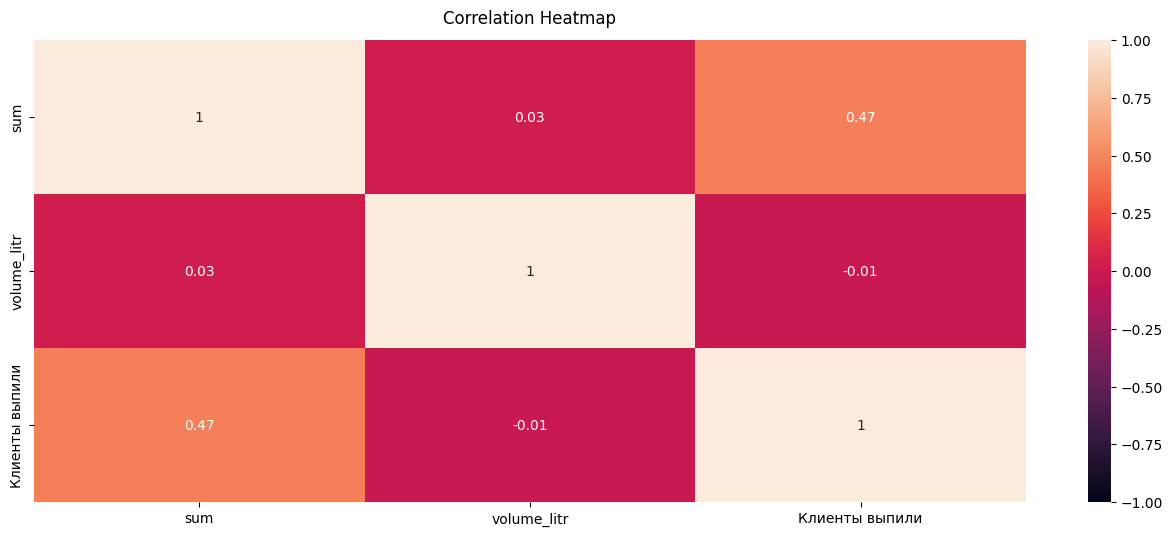

In [83]:

cont_cols = ['sum','volume_litr','Клиенты выпили']
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data[cont_cols].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
#pvaluesXcorrs

# Подготовка данных

In [307]:
target_cols = ['volume_litr']
train_cols = data.columns.values.tolist()
train_cols.remove('volume_litr')

In [318]:

X_train, X_test, y_train, y_test = train_test_split(data[train_cols], data[target_cols], random_state=42, test_size=0.3, shuffle=True, stratify = data[['Акций одновременно', 'city']])


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.3, shuffle=True)

In [319]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error

train_dataset = Pool(data = X_train,
                     label = y_train,
                     )
test_dataset = Pool(data = X_val,
                     label = y_val,
                     )

# Baseline

In [338]:
cat = CatBoostRegressor(loss_function='RMSE', od_type = 'Iter', learning_rate= 0.1, l2_leaf_reg = 20, random_strength=1,depth =13, rsm = 0.6)
#cat = CatBoostRegressor(loss_function='RMSE', od_type = 'Iter', learning_rate= 0.01, l2_leaf_reg = 20, random_strength=1,depth =6)
cat.fit(
        train_dataset,
        use_best_model=True, 
        verbose = 1,
        eval_set = test_dataset,
        


        )

pred = cat.predict(Pool(data=X_test))
pred_train = cat.predict(Pool(data=X_train))
for i in range(len(pred)):
  if pred[i] < 0:
    pred[i] = 0
for i in range(len(pred_train)):
  if pred_train[i] < 0:
    pred_train[i] = 0
rmse = mean_squared_error(y_test['volume_litr'].values, pred, squared=False)


print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"RMSE: {rmse}")


0:	learn: 24.0519778	test: 23.0835530	best: 23.0835530 (0)	total: 118ms	remaining: 1m 57s
1:	learn: 23.8227256	test: 22.9251359	best: 22.9251359 (1)	total: 195ms	remaining: 1m 37s
2:	learn: 23.6177911	test: 22.8126223	best: 22.8126223 (2)	total: 299ms	remaining: 1m 39s
3:	learn: 23.3767946	test: 22.6655115	best: 22.6655115 (3)	total: 425ms	remaining: 1m 45s
4:	learn: 23.1393721	test: 22.4884037	best: 22.4884037 (4)	total: 532ms	remaining: 1m 45s
5:	learn: 22.9483000	test: 22.3168770	best: 22.3168770 (5)	total: 642ms	remaining: 1m 46s
6:	learn: 22.7438827	test: 22.1695239	best: 22.1695239 (6)	total: 744ms	remaining: 1m 45s
7:	learn: 22.5769254	test: 22.1163027	best: 22.1163027 (7)	total: 872ms	remaining: 1m 48s
8:	learn: 22.4107664	test: 22.0335210	best: 22.0335210 (8)	total: 1s	remaining: 1m 50s
9:	learn: 22.2748054	test: 21.9551418	best: 21.9551418 (9)	total: 1.11s	remaining: 1m 49s
10:	learn: 22.1652552	test: 21.8908172	best: 21.8908172 (10)	total: 1.14s	remaining: 1m 42s
11:	learn: 

# Grid search

In [ ]:
model = CatBoostRegressor(iterations = 3000, loss_function='RMSE', od_type = 'Iter')

grid = {'learning_rate': [0.01, 0.001],
        'depth': [6,10],
        'l2_leaf_reg': [16, 20],
       # 'bagging_temperature': [1, 3, 5, 7, 9],
        'random_strength':[1, 3]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train,
                           
                                       )

In [ ]:
grid_search_result

In [ ]:
{'params': {'random_strength': 1,
  'depth': 6,
  'l2_leaf_reg': 20,
  'learning_rate': 0.01},
 'cv_results': defaultdict(list,

Полученные значения метрик

In [339]:

print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"RMSE: {rmse}")



MAE: 3.721349837340435
RMSE: 19.37031354143795


Функция для построения квантильного биплота для предсказаний и реальных значнеий 

In [340]:
def quantile_biplot(data, column, pred):

  # Calculation of quantiles
  percs = np.linspace(0, 100, 100)
  qn_data = np.percentile(data[column], percs)
  qn_pred  = np.percentile(pred, percs)

  # Building a quantile biplot
  x = np.linspace(np.min(data[column]), np.max(data[column]))
  plt.figure(figsize=(10, 10))
  plt.plot(qn_data, qn_pred, ls="", marker="o", markersize=6)
  plt.plot(x, x, color="k", ls="--")

  plt.xlabel(f'Распределение СВ')
  plt.ylabel('Распределение предсказаний')
  plt.title('Биплот для колонки ' + str(column))
  plt.legend()
  plt.show()

Предсказания на train

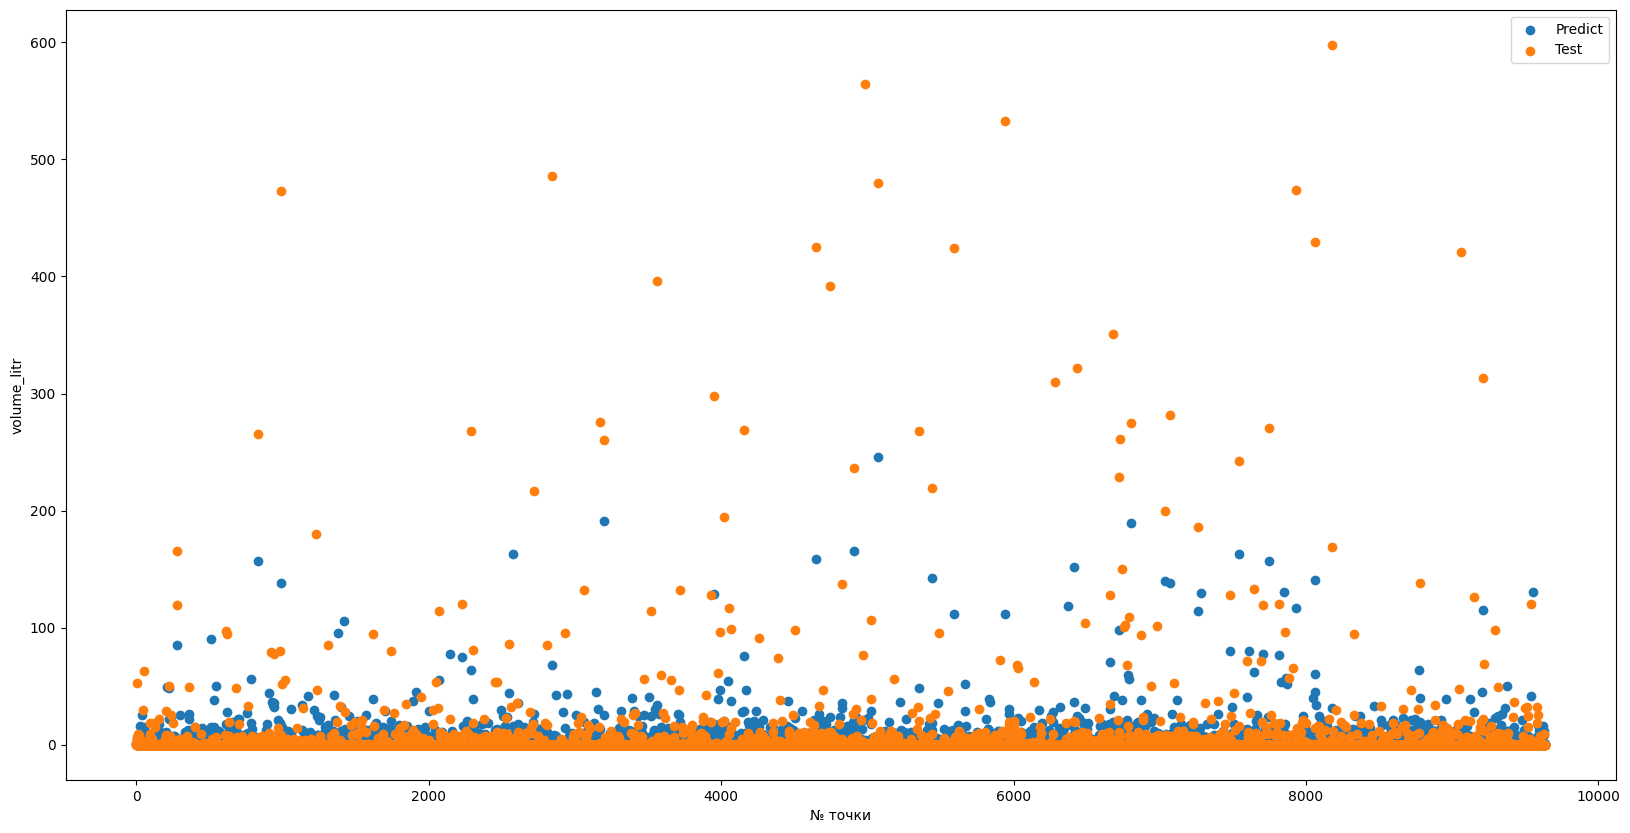

In [341]:
x_axis = range(len(y_test))
plt.figure(figsize=(20,10))
plt.scatter(x_axis, pred, label='Predict')

plt.scatter(x_axis, y_test['volume_litr'], label='Test')

plt.xlabel('№ точки')
plt.ylabel('volume_litr')

plt.legend()

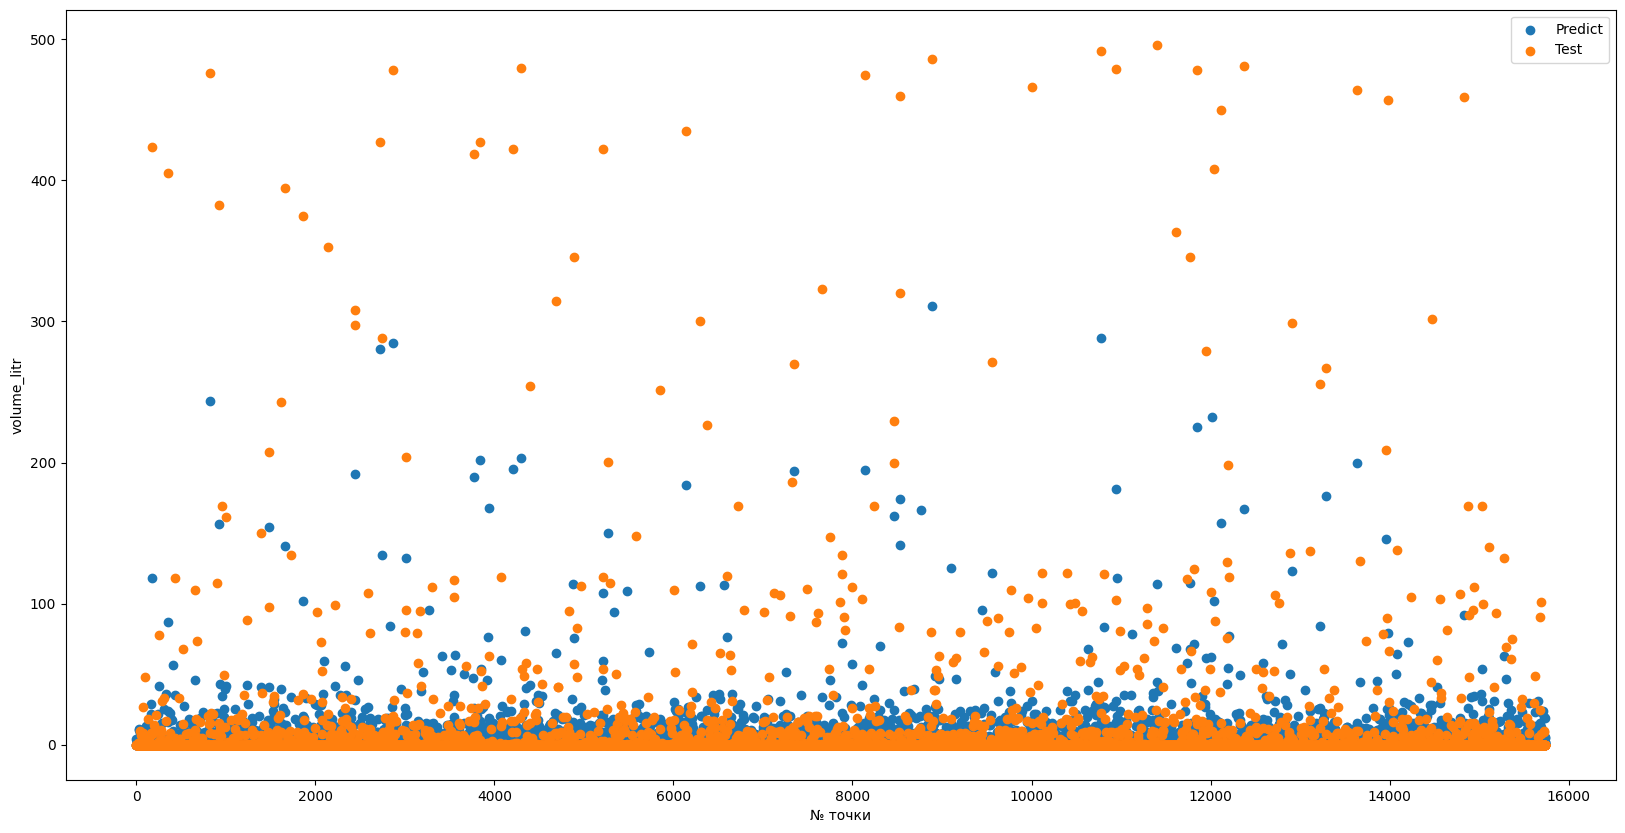

In [342]:
x_axis = range(len(y_train))
plt.figure(figsize=(20,10))
plt.scatter(x_axis, pred_train, label='Predict')

plt.scatter(x_axis, y_train['volume_litr'], label='Test')

plt.xlabel('№ точки')
plt.ylabel('volume_litr')

plt.legend()

Видно, что квантили низких порядков предсказываются достаточно хорошо

---

Квантили высоких порядков имеют уже серьезные отклонения, поэтому модели трудно улавливать большие объемы эффектов 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


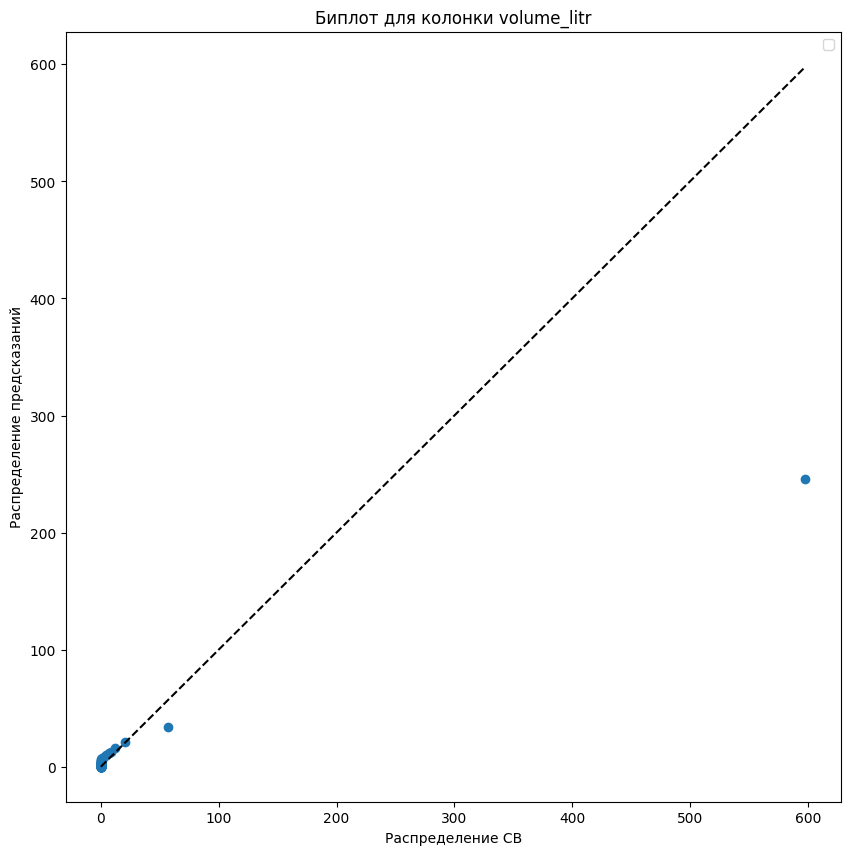

In [343]:
quantile_biplot(y_test, 'volume_litr', pred)

Выводы:


---
В ходе выполнения задания получилась модель с достаточно большой ошибкой. Возможно, нахождение новых закономерностей смогут уменьшить ошибку предсказания. 

---

Также можно попробовать использовать модель Байесовской сети например, Поскольку в ней можно отобрзиить экспертные знания о зависимостях между случайными величинами в виде графа (это сделает модель легкоинтерпретируемой), однако на большом количестве данных модель получится очень и очень объемная

---
Также хотелось бы разобраться с attack_probabylity, который оказался не включенным в исследование. Что с ним можно сделать остается для меня открытым вопросом.

---

Спасибо за интересное задание =)



# Доп графики


Выведем feature impotance

Text(0.5, 1.0, 'Feature Importance')

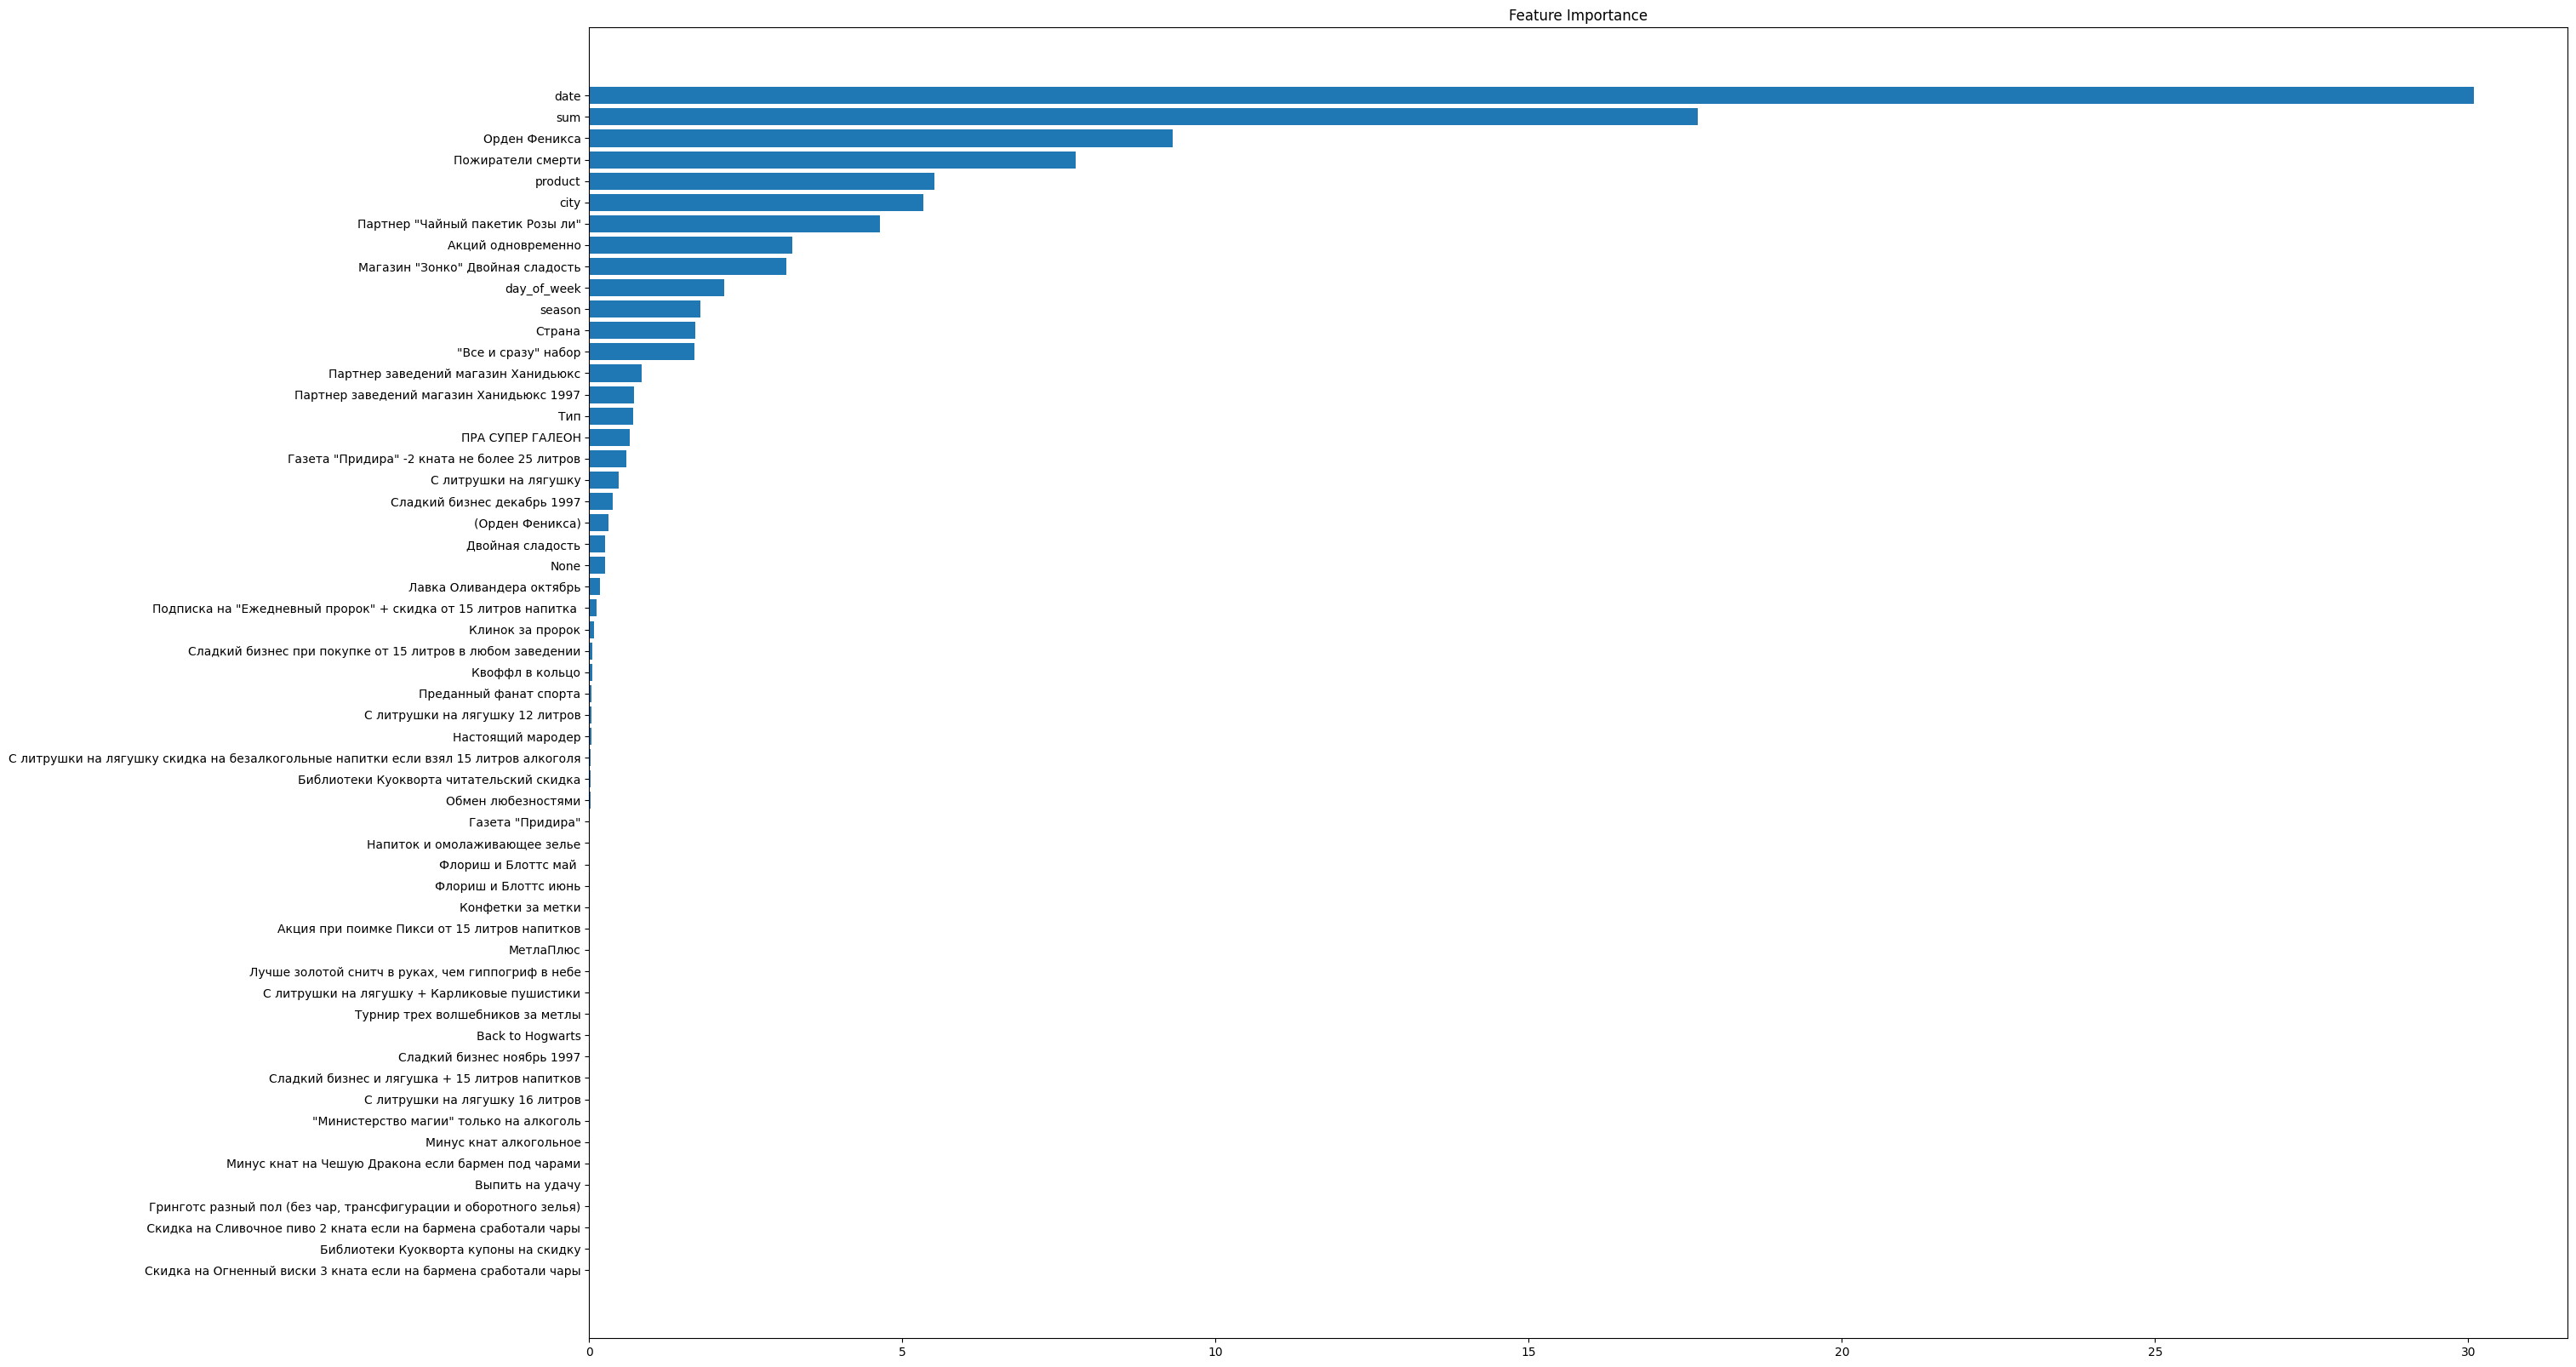

In [344]:

feature_importance = cat.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(30, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


Распределение остатков регресии

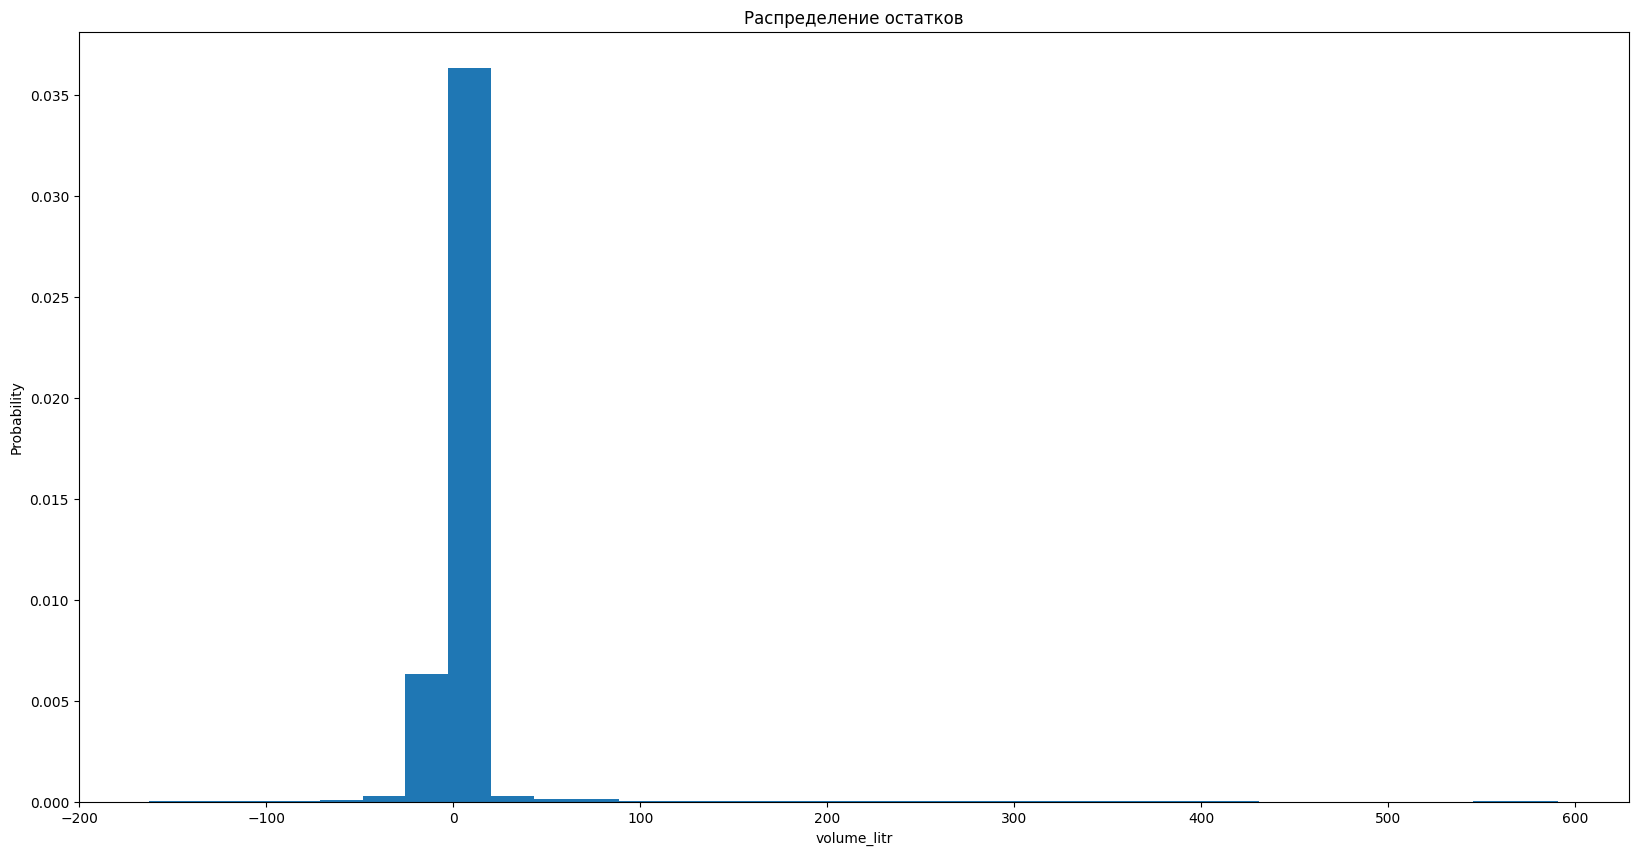

In [354]:
def distribution_of_residuals(pred):
  residuals = y_test['volume_litr'] - pred
  plt.figure(figsize=(20,10))
  plt.hist(residuals, density=True, bins=33, label='Распределени остатков')
  plt.title('Распределение остатков')
  plt.xlabel('volume_litr')
  plt.ylabel('Probability')

distribution_of_residuals(pred)

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


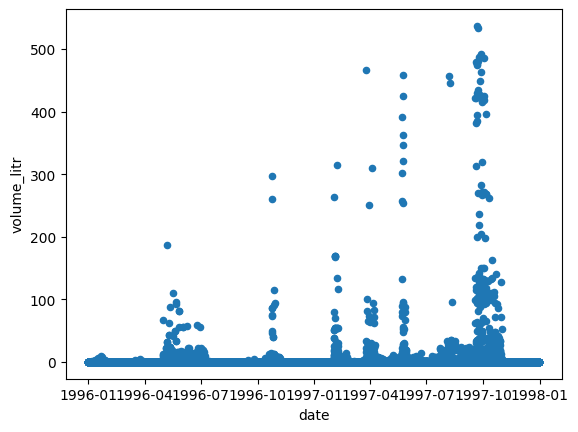

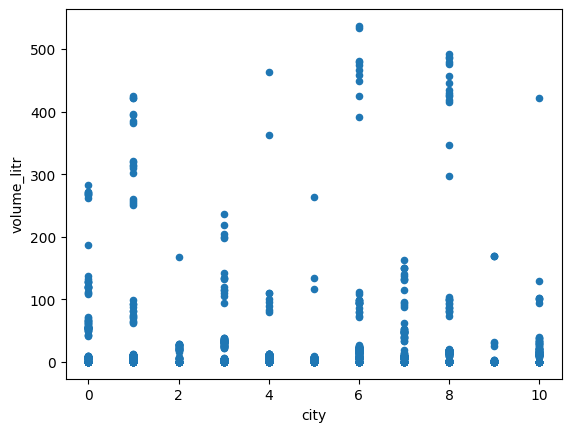

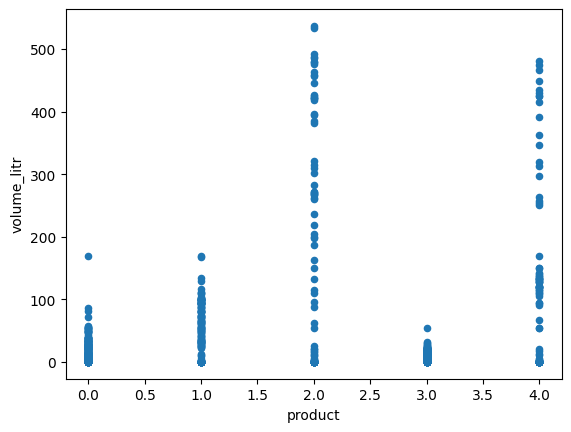

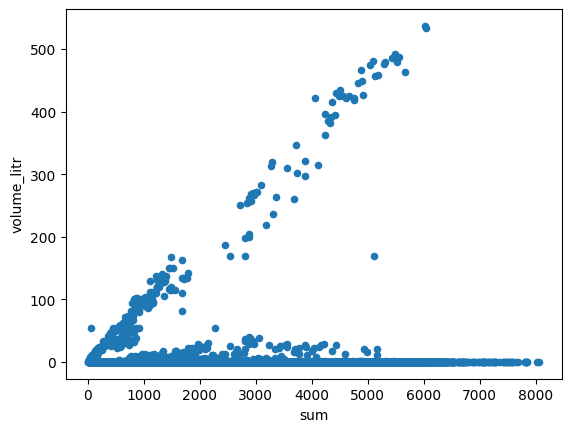

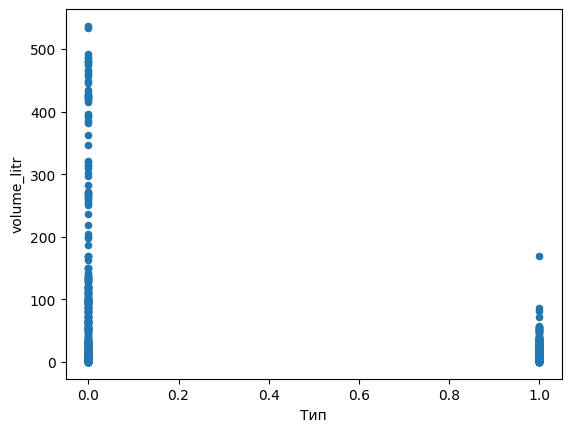

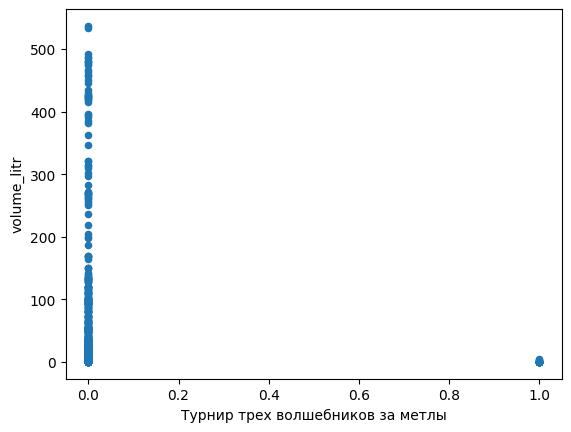

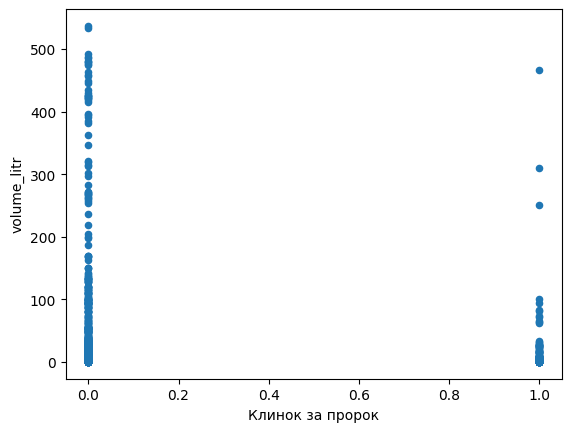

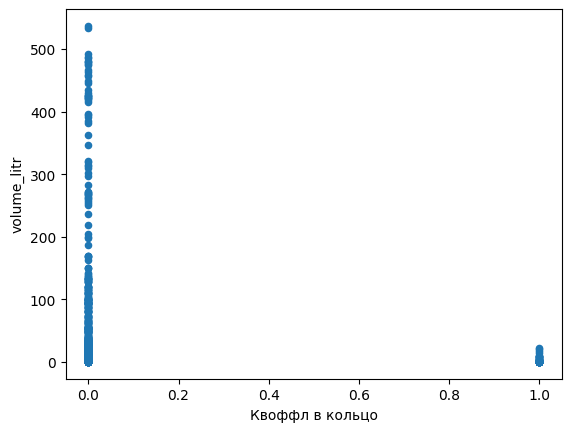

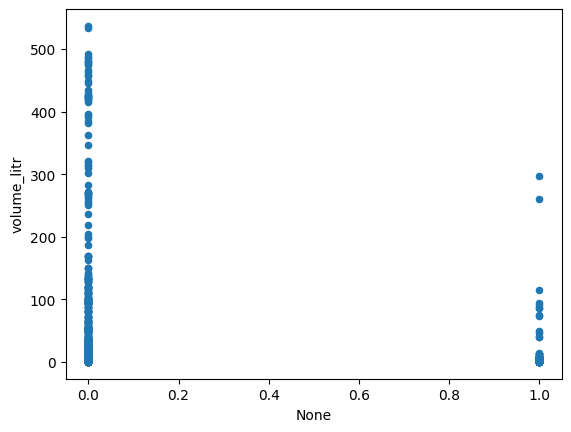

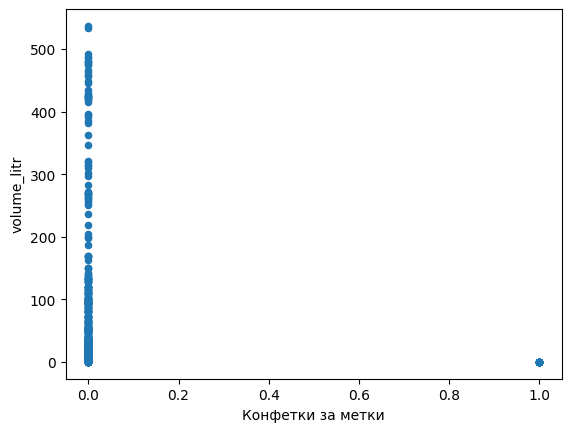

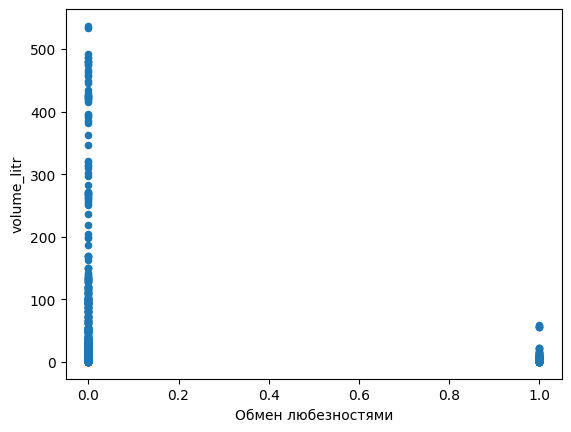

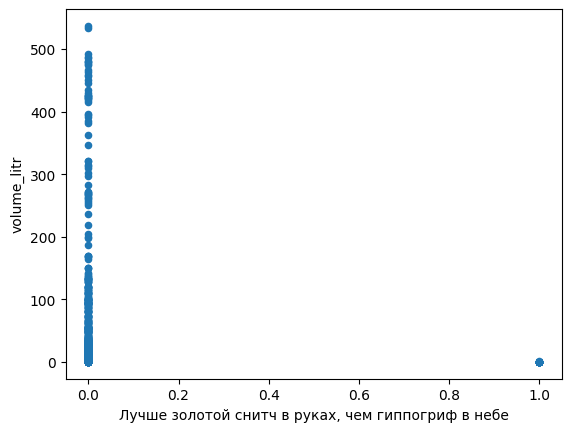

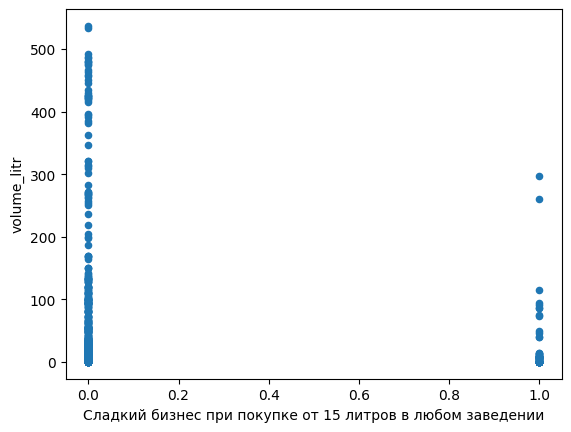

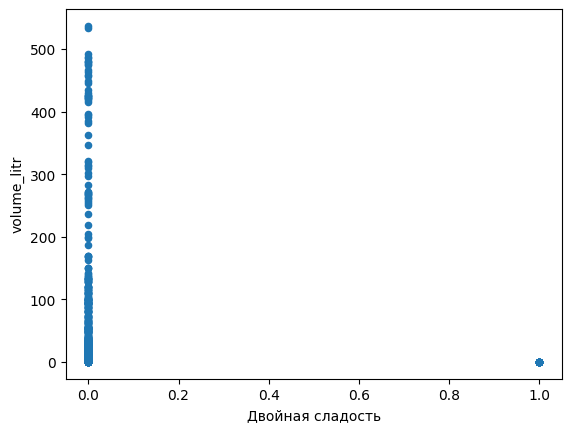

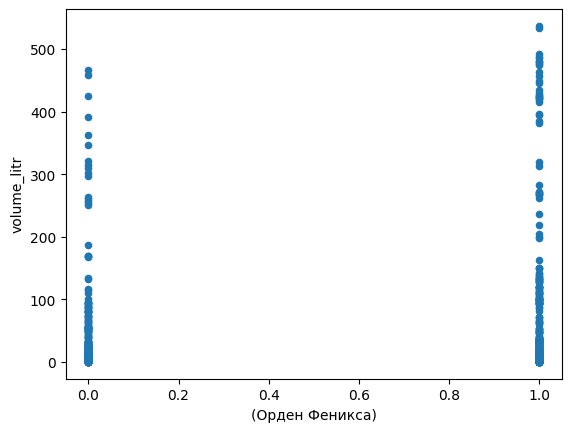

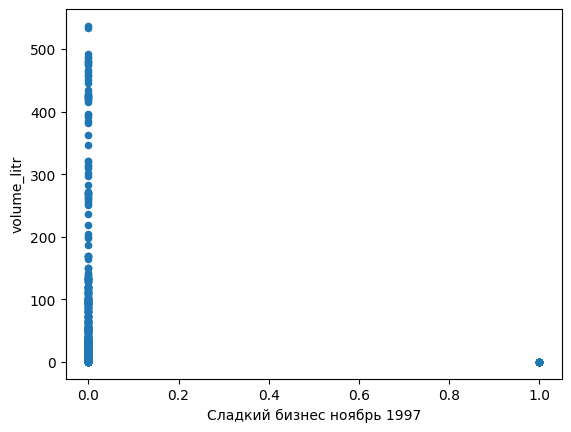

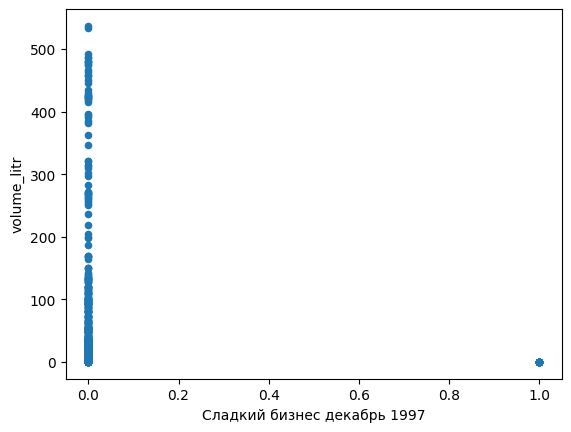

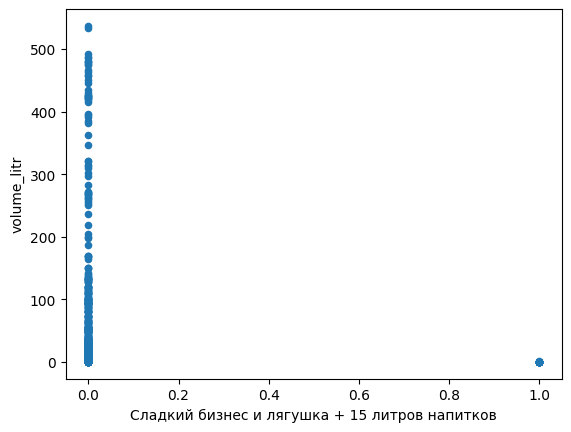

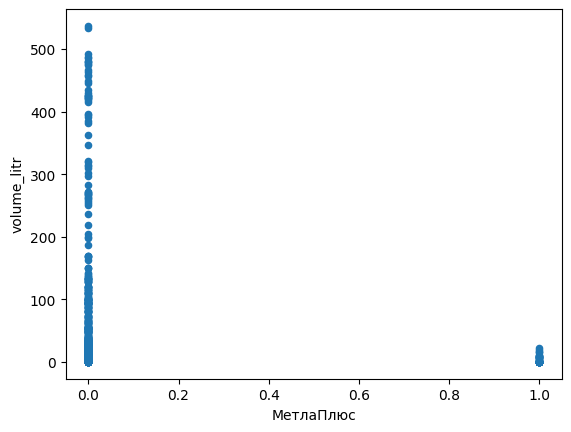

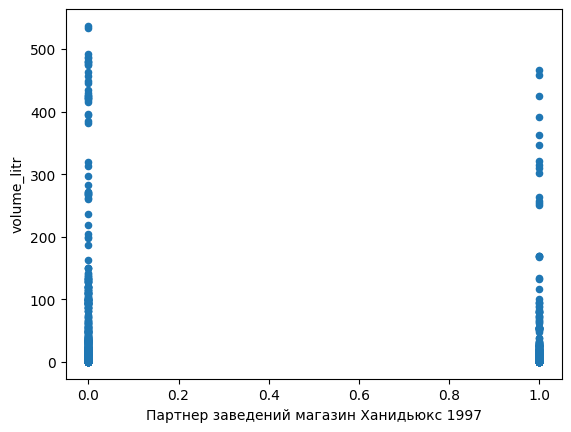

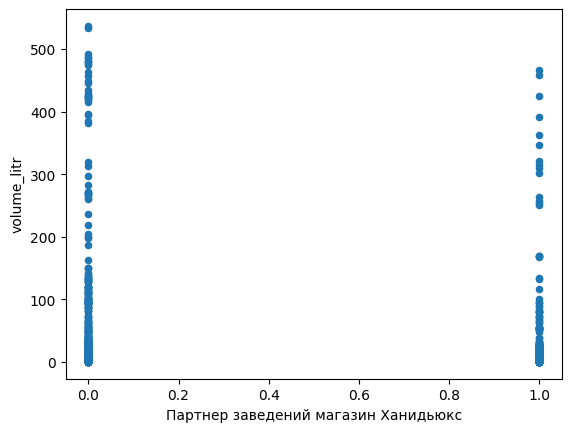

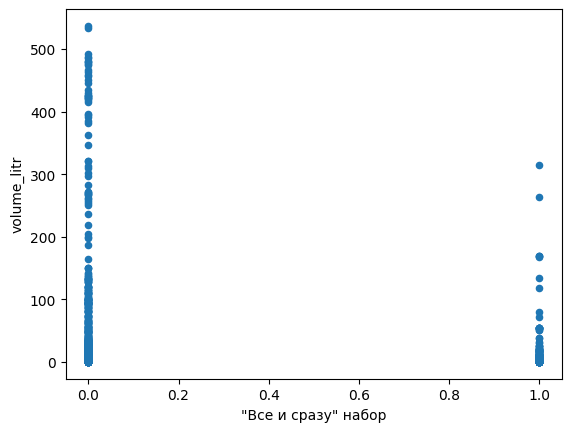

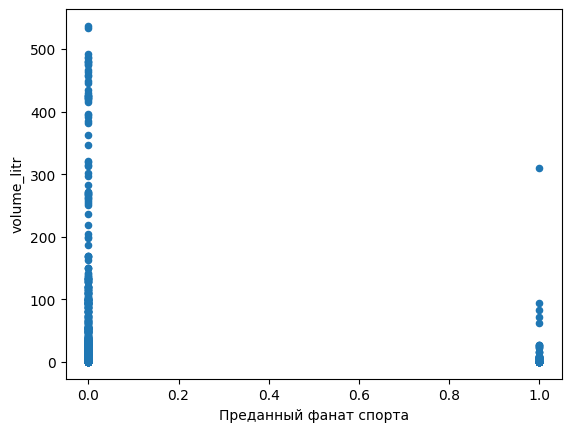

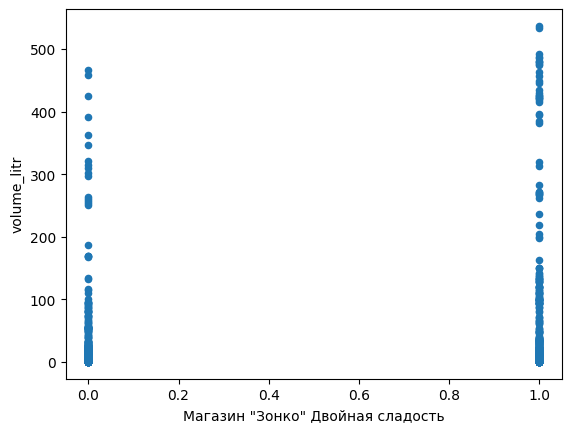

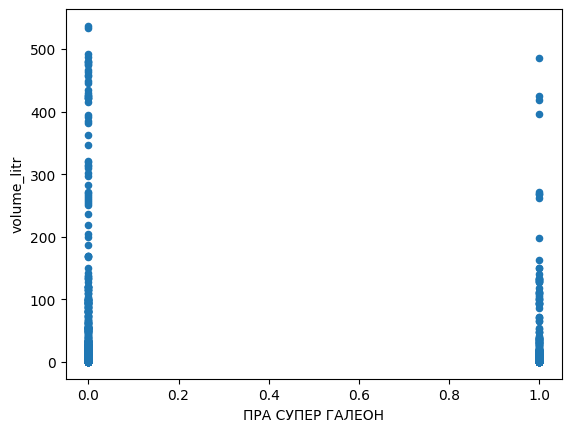

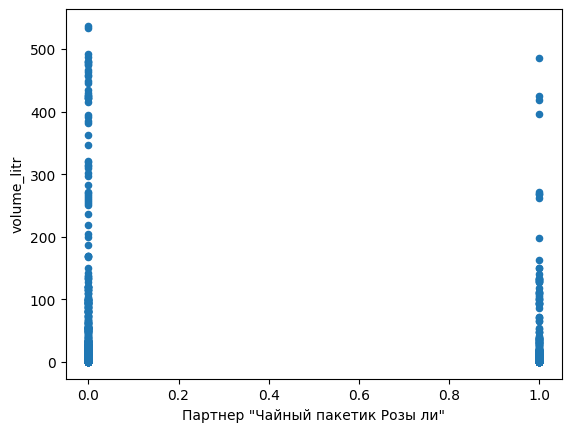

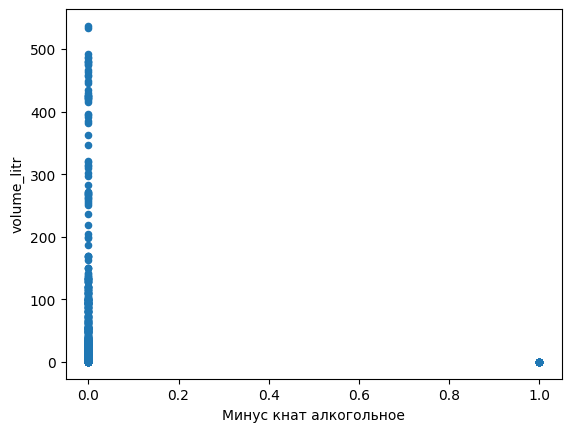

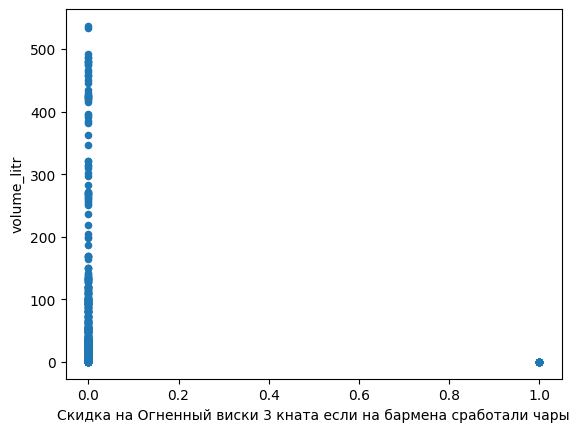

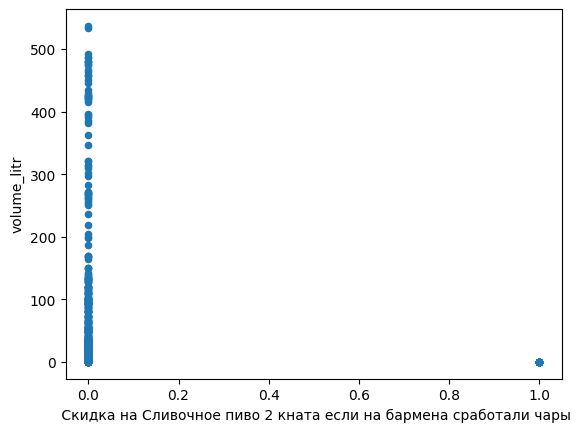

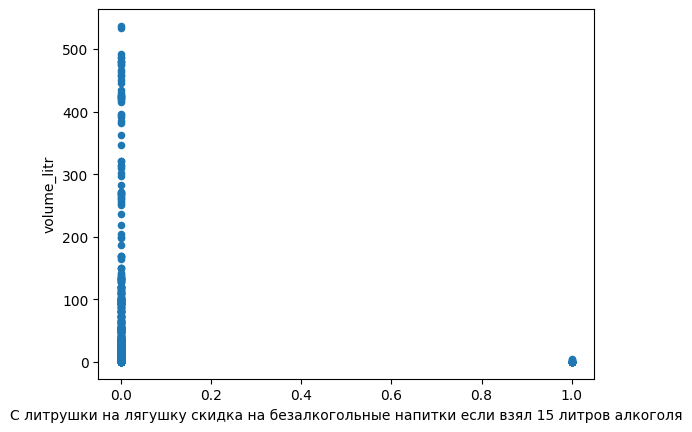

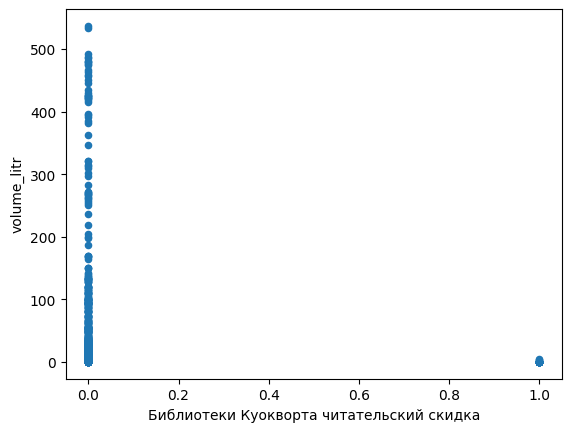

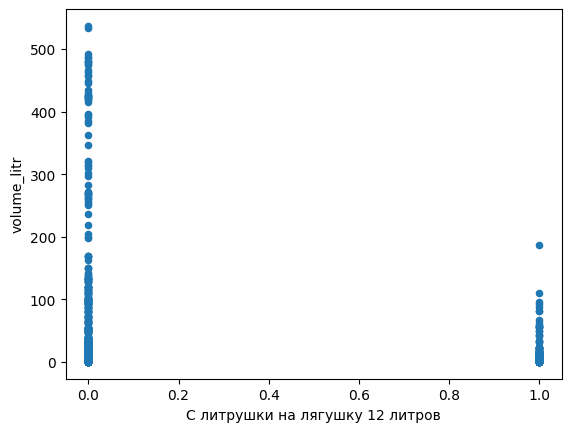

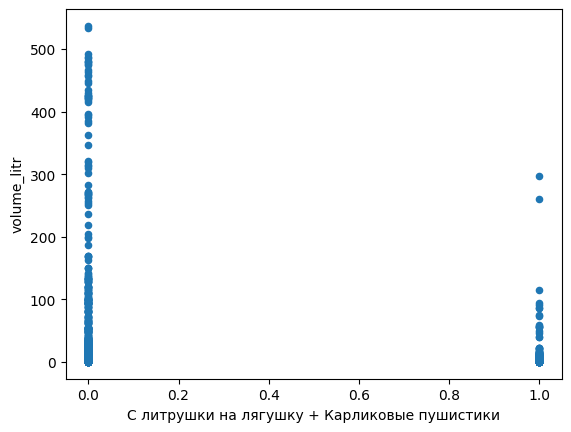

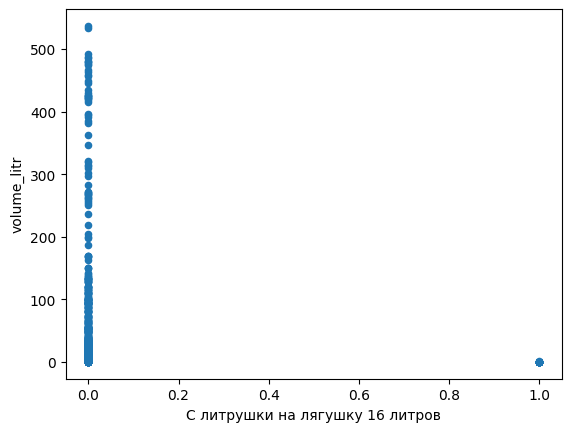

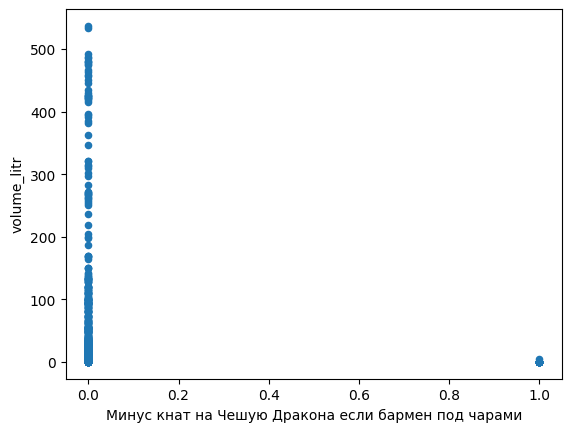

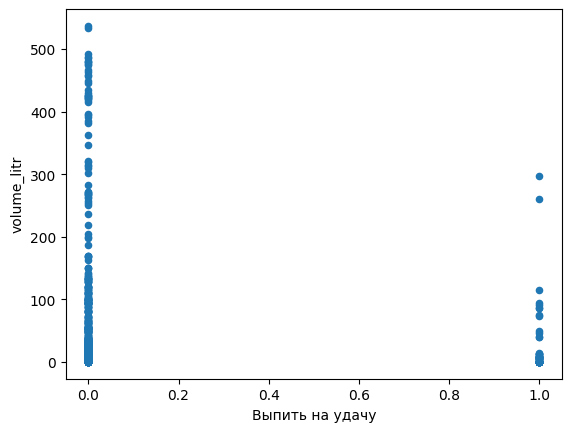

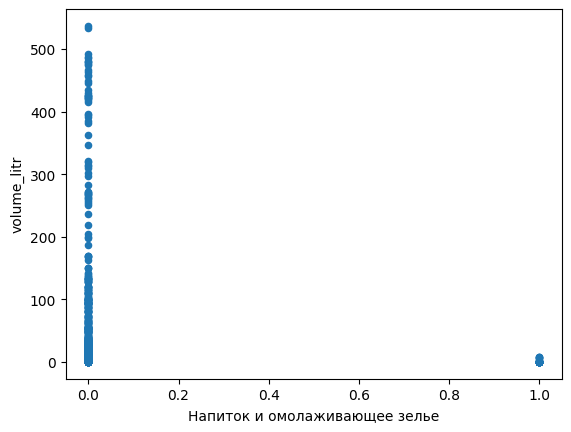

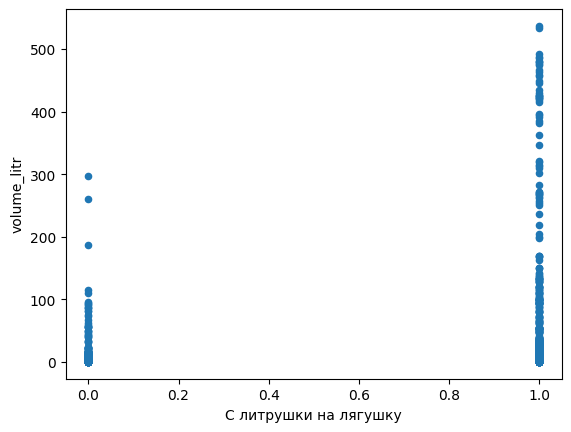

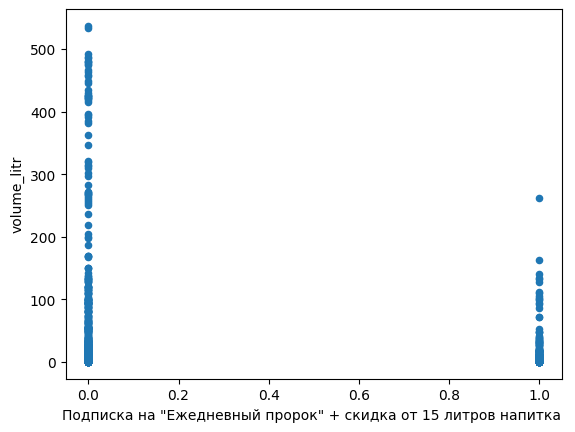

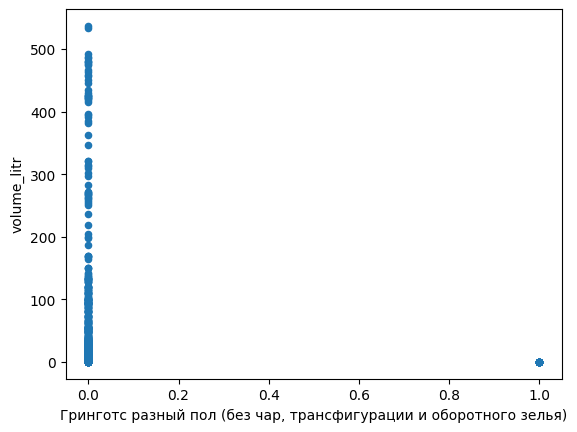

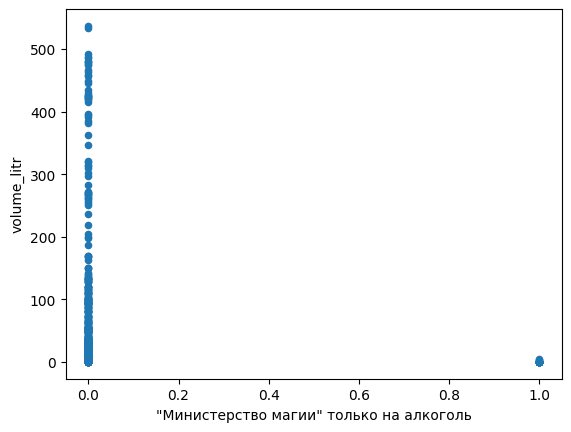

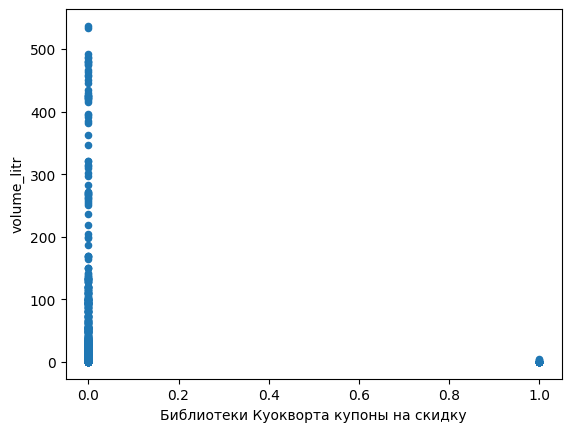

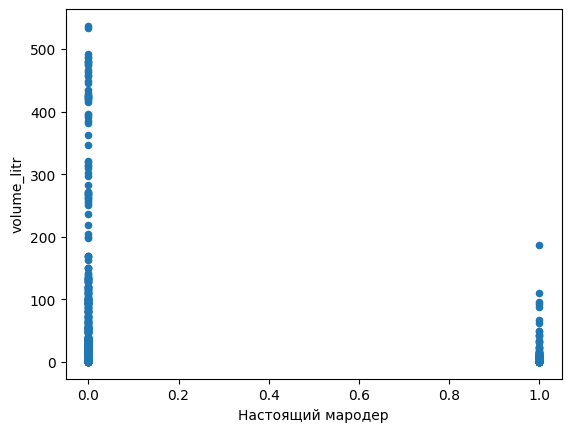

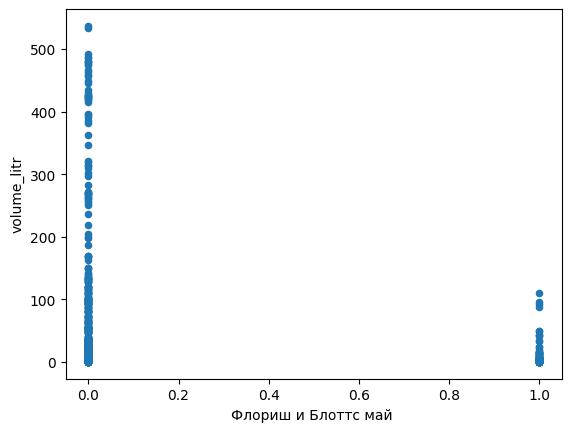

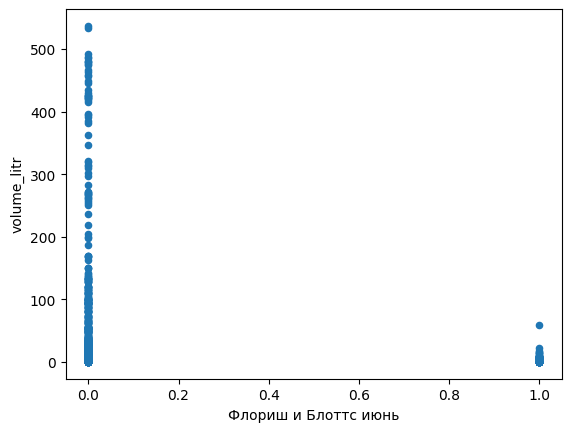

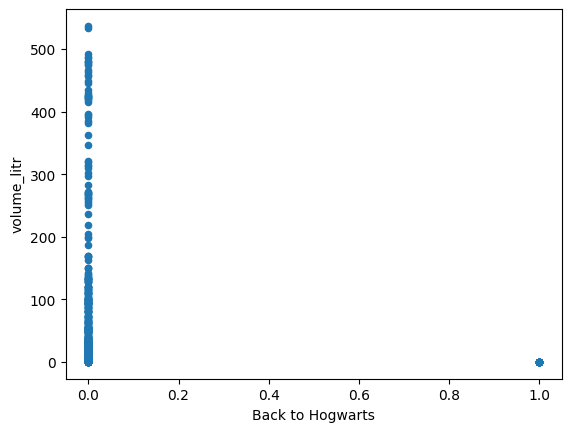

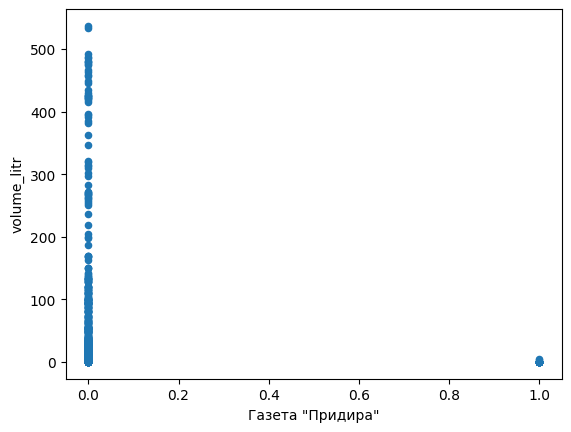

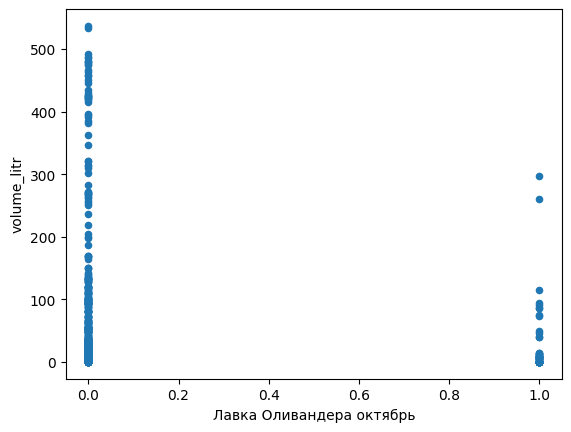

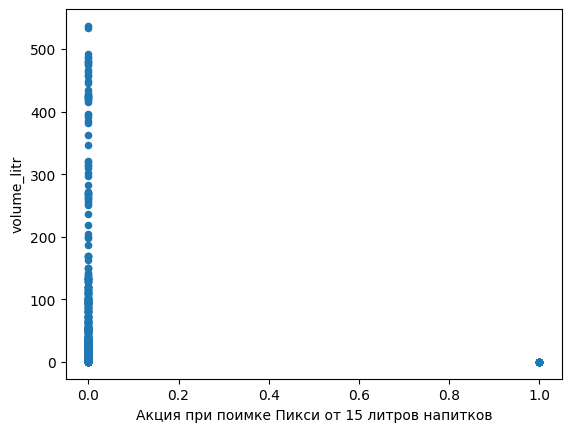

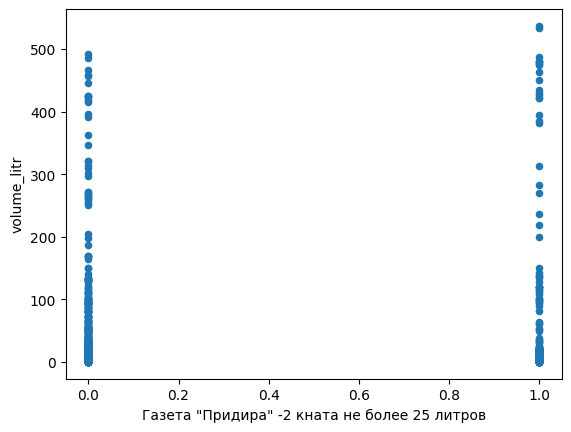

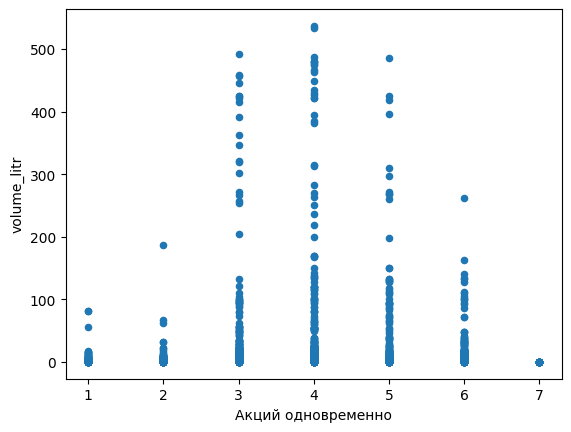

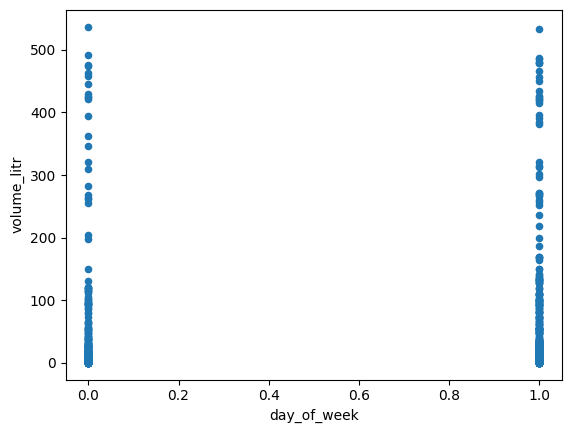

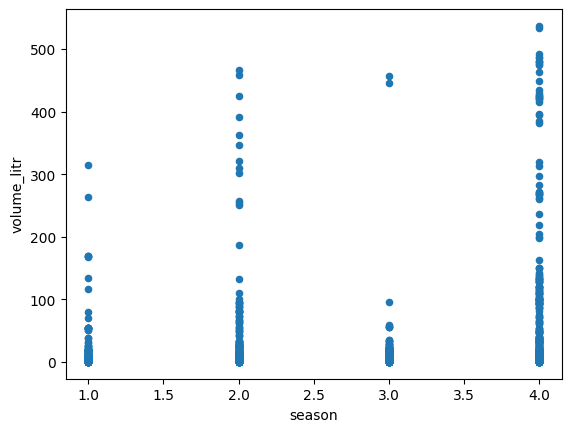

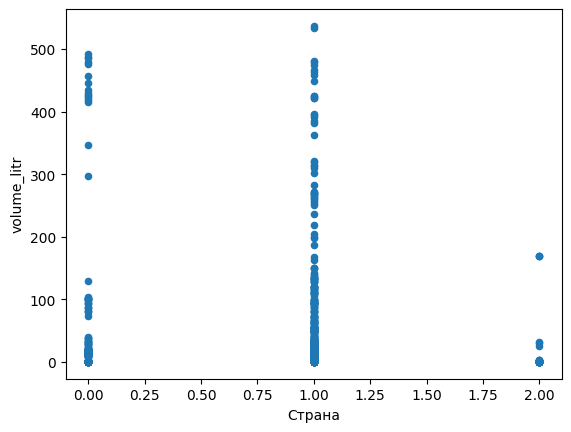

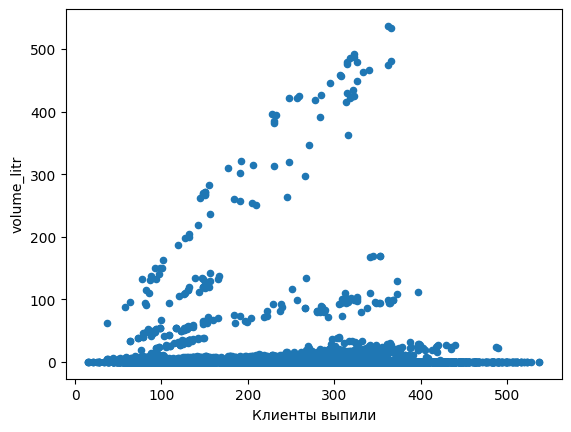

In [292]:

X_train['volume_litr'] = y_train['volume_litr']
X_test['volume_litr'] = y_test['volume_litr']
for idx, feature in enumerate(train_cols):
    X_train.plot(feature, "volume_litr", subplots=True, kind="scatter")

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


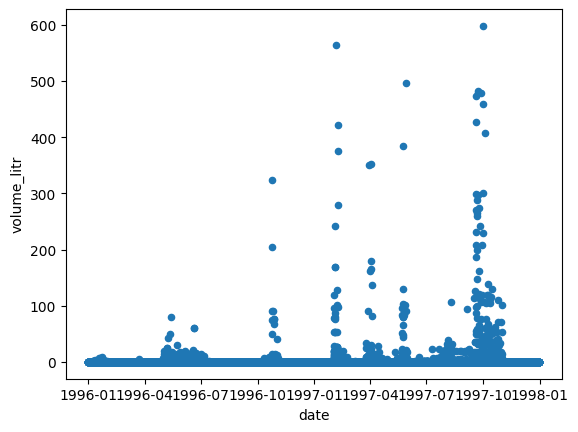

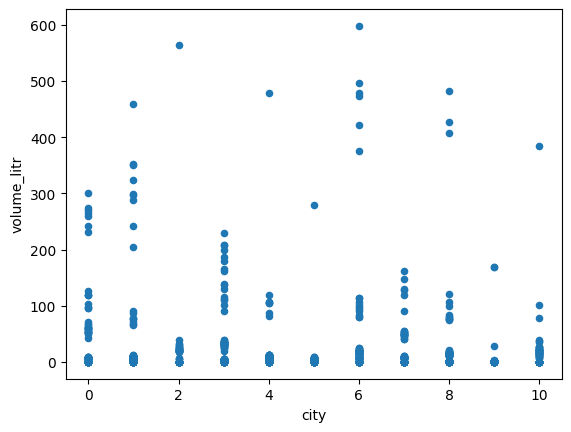

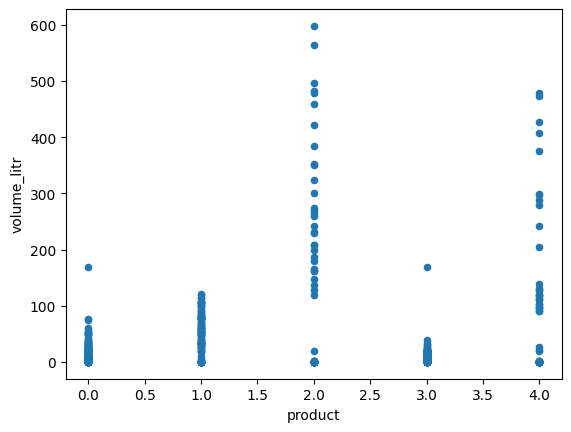

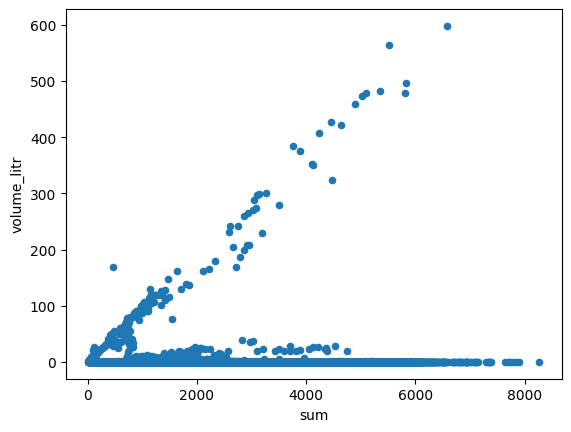

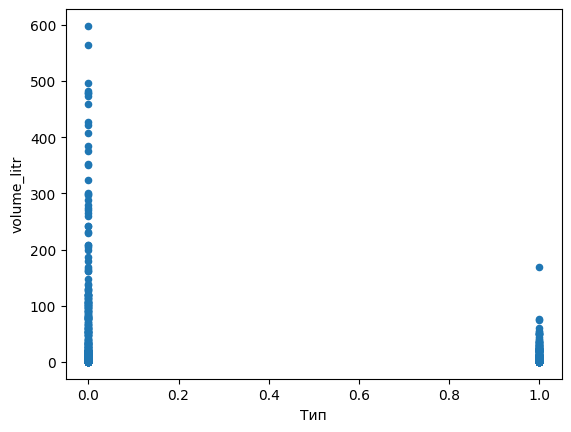

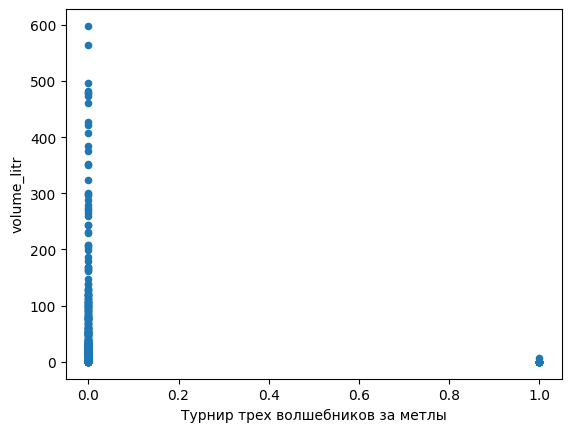

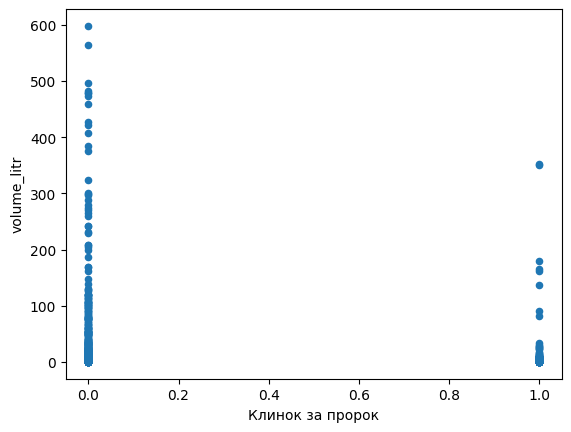

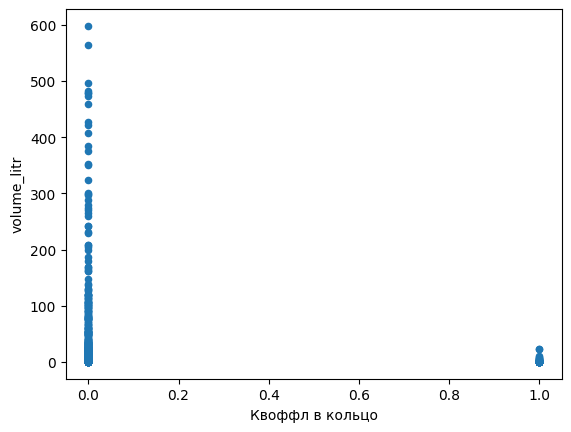

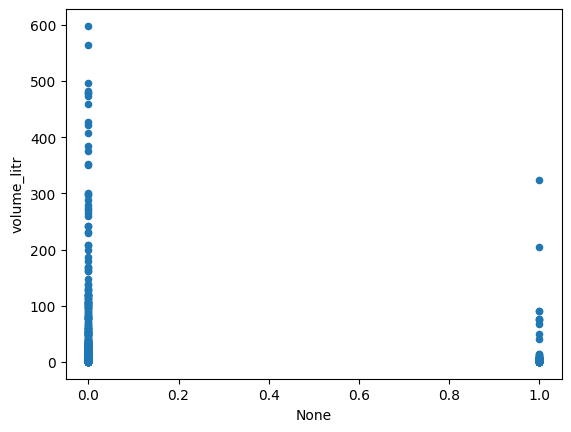

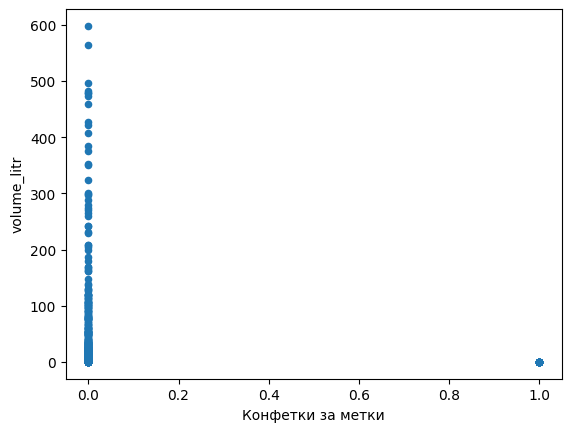

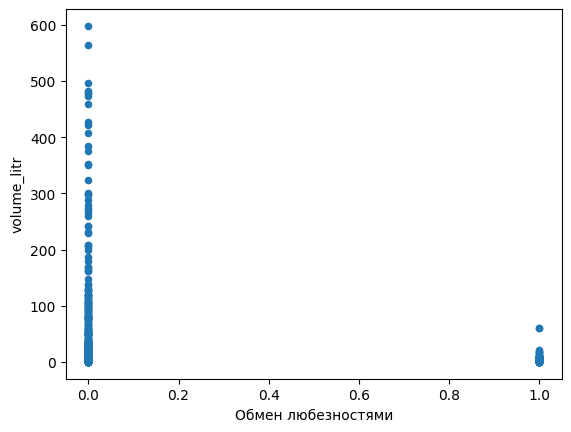

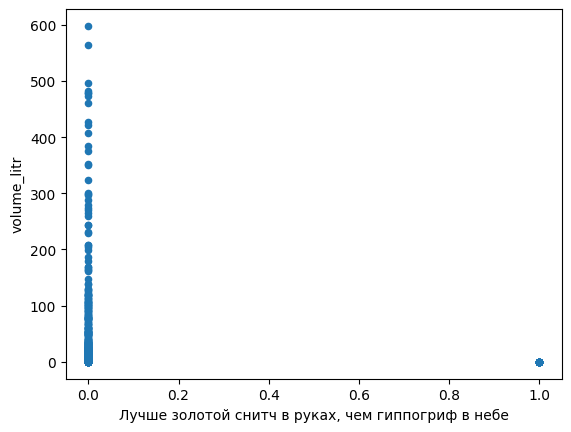

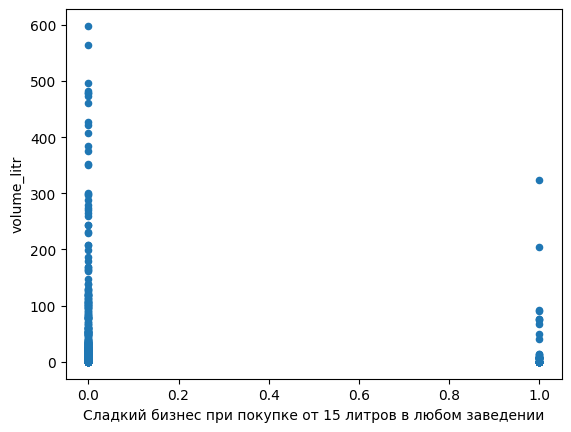

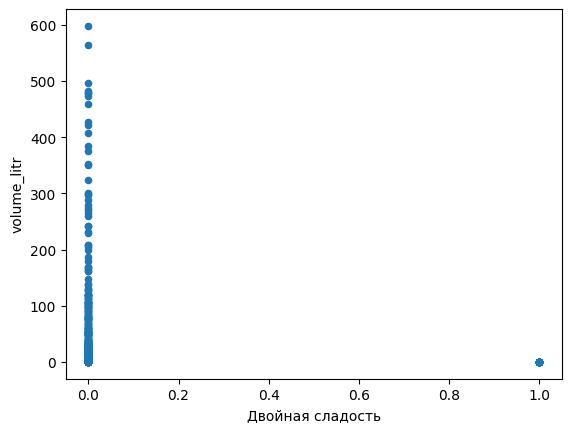

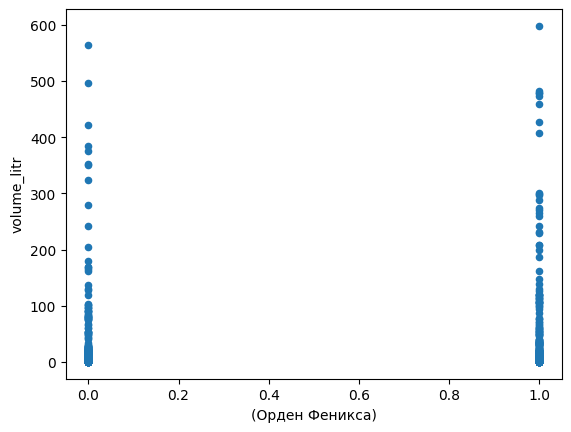

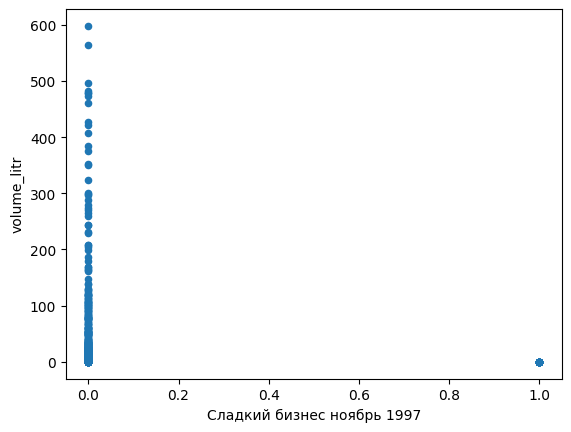

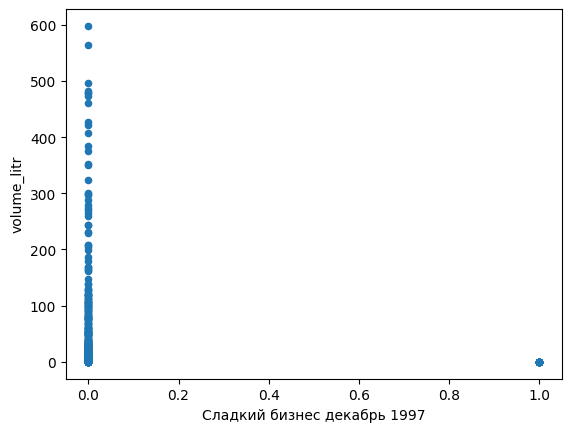

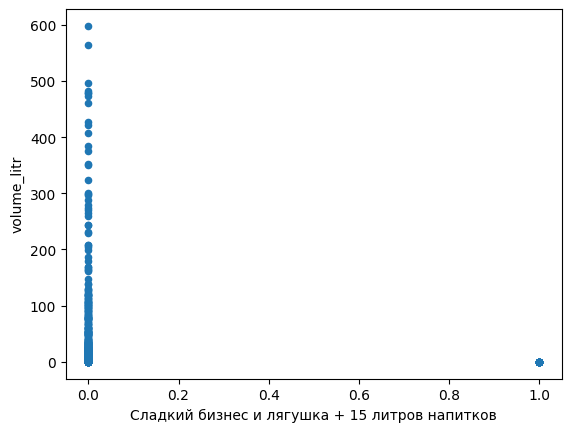

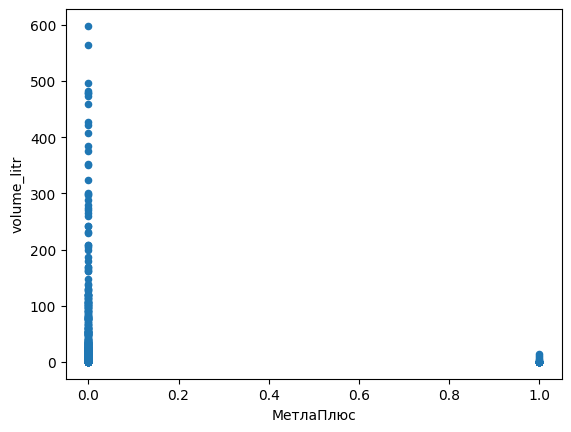

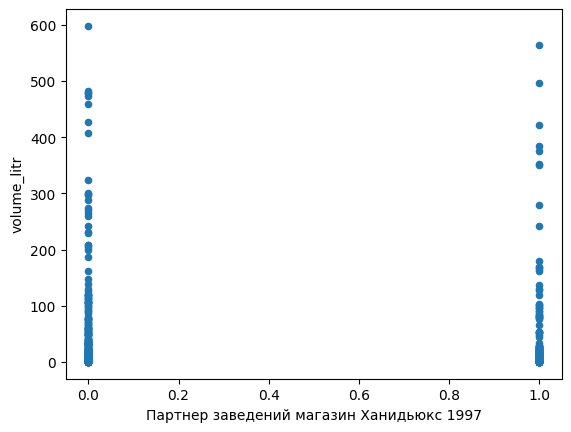

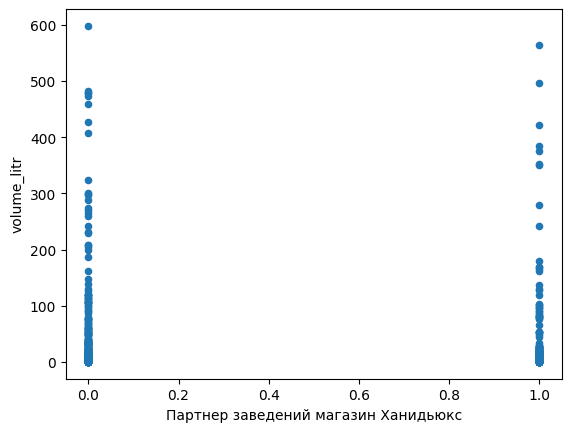

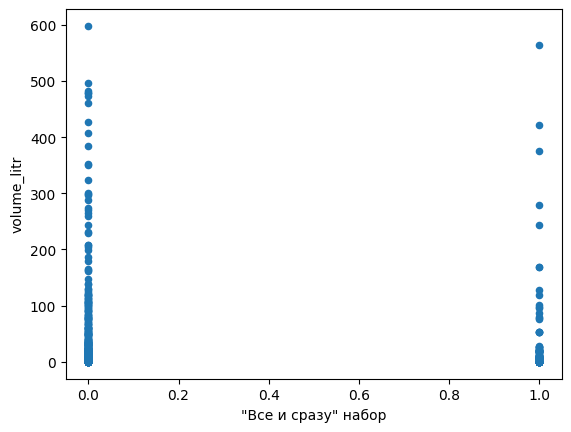

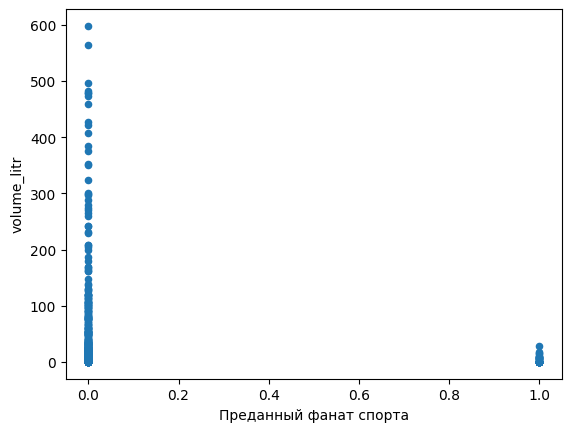

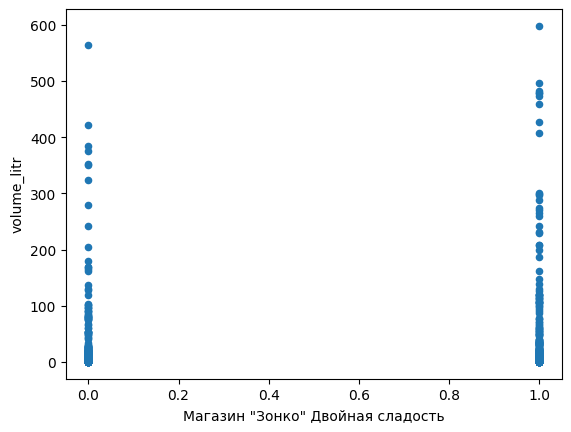

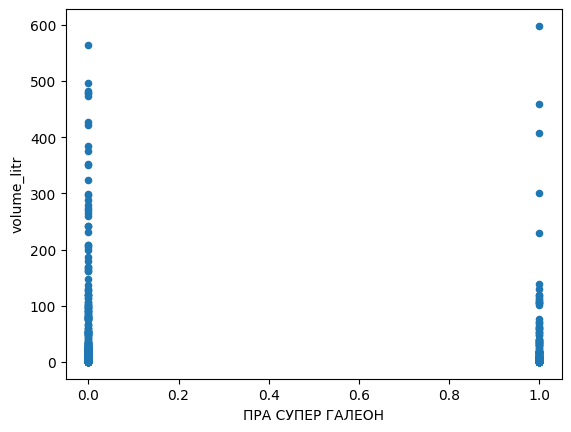

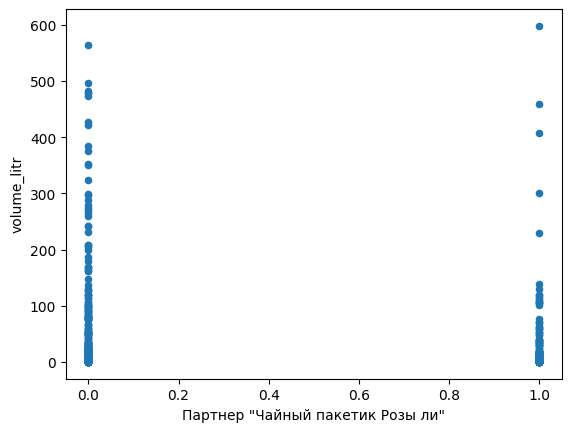

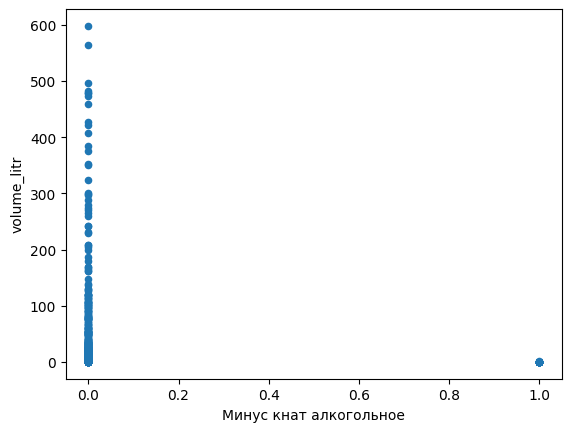

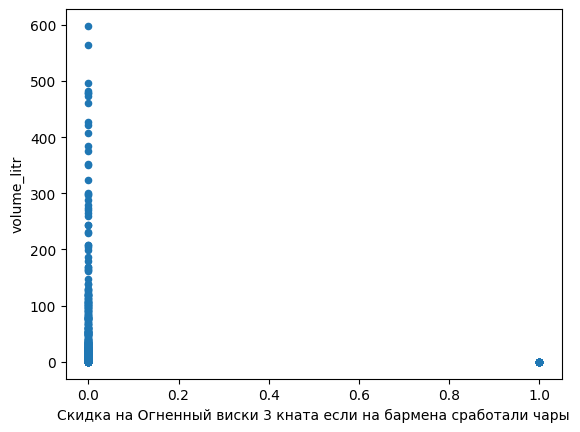

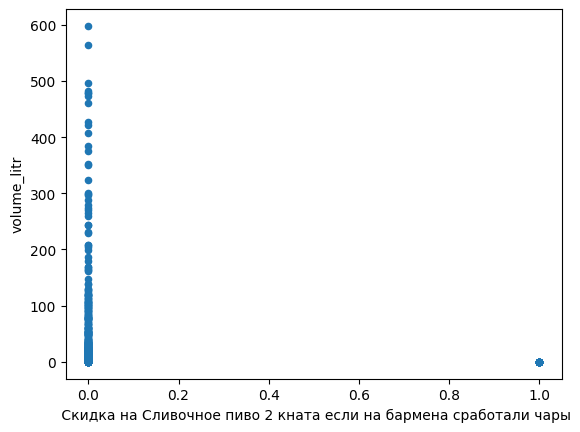

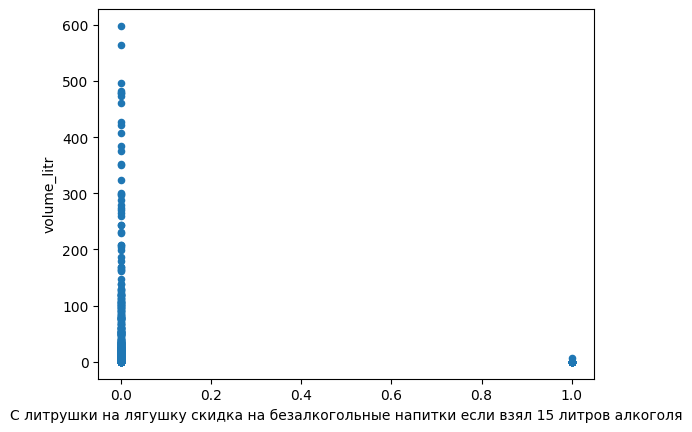

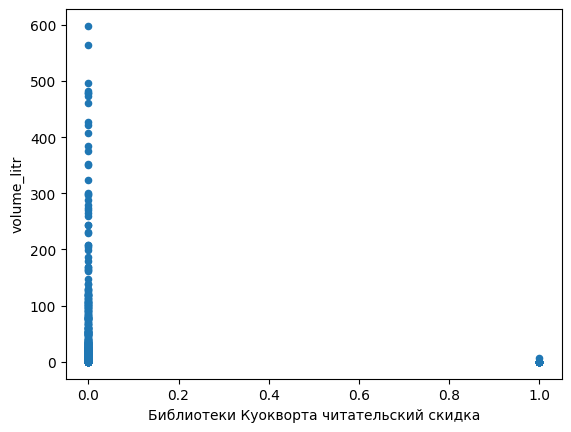

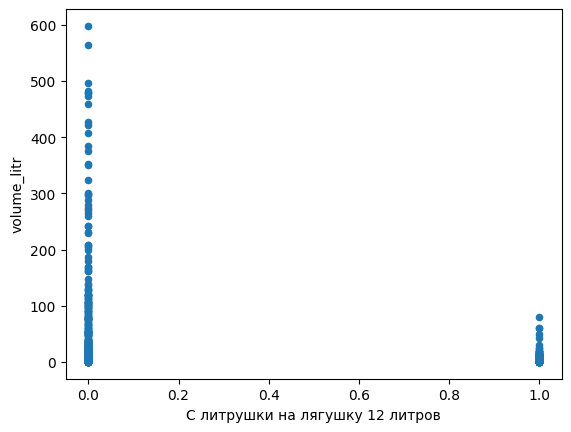

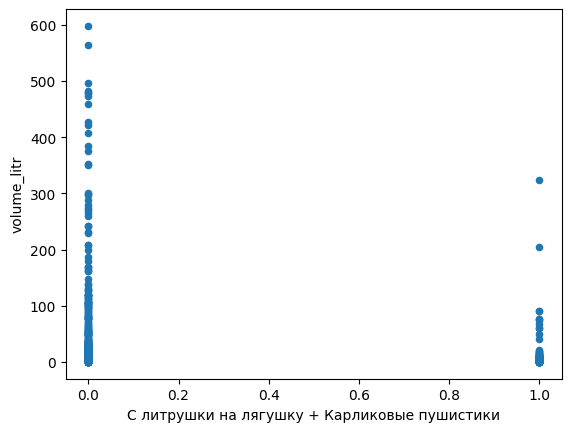

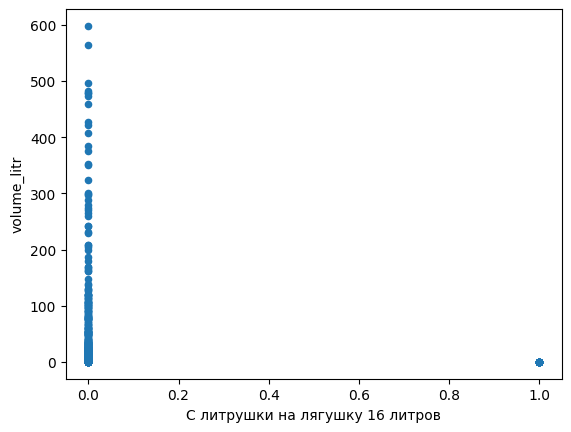

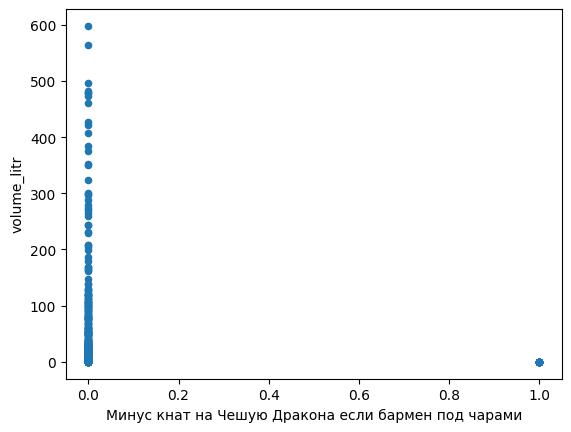

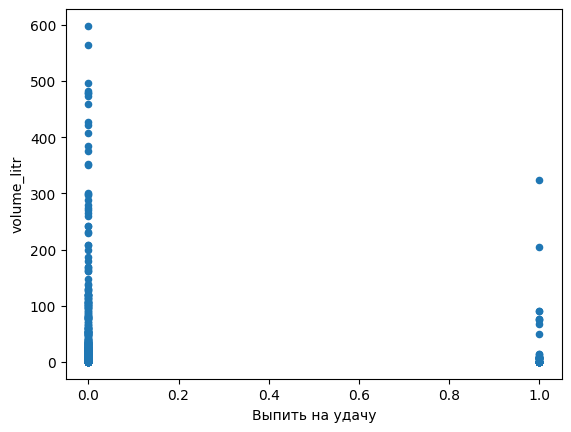

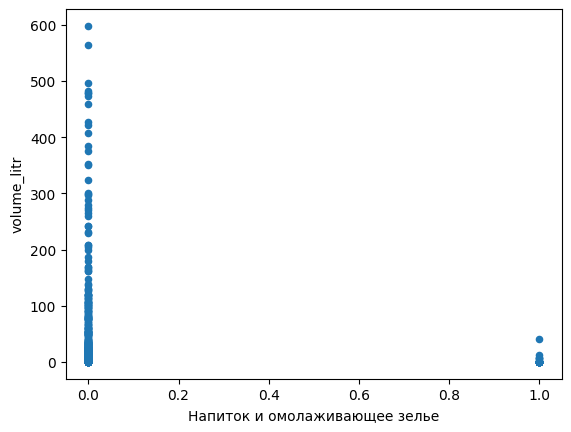

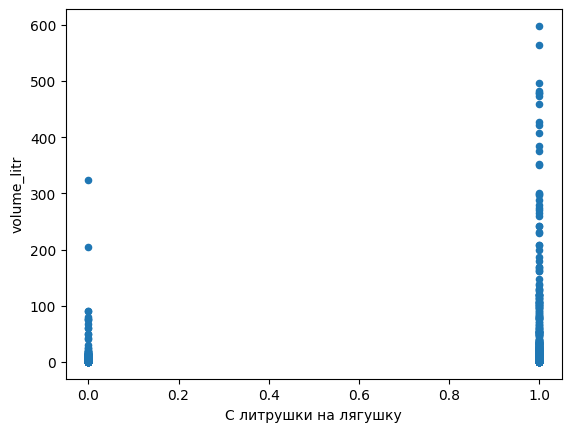

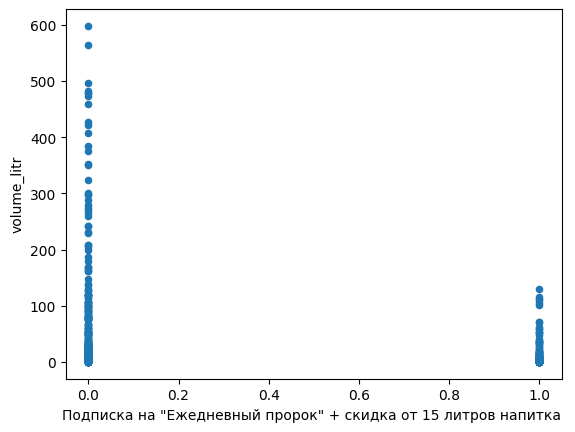

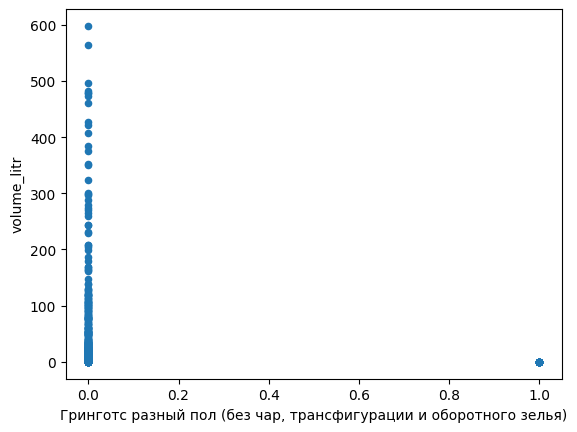

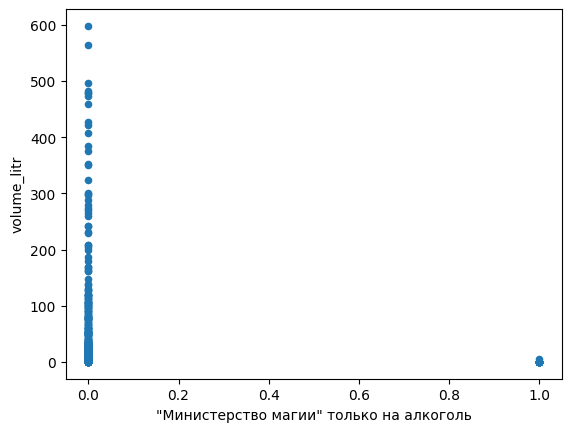

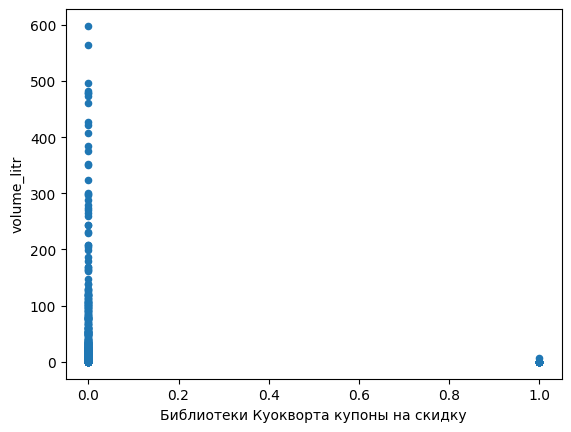

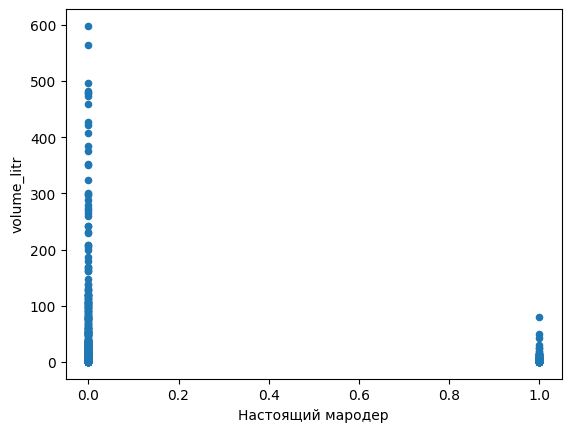

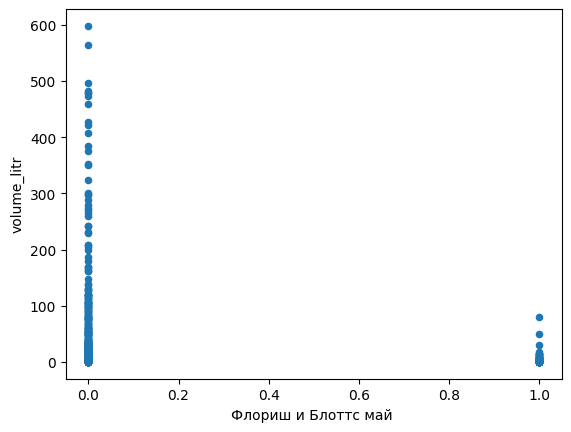

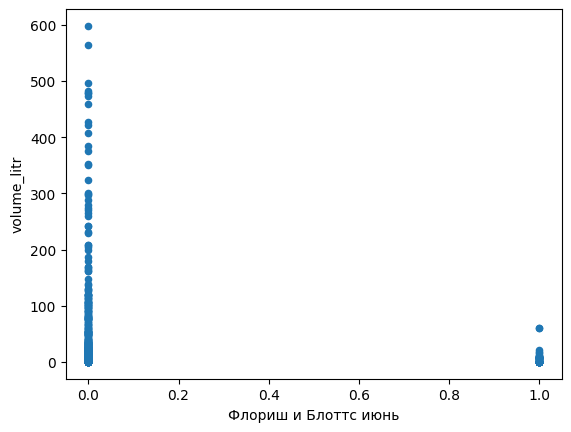

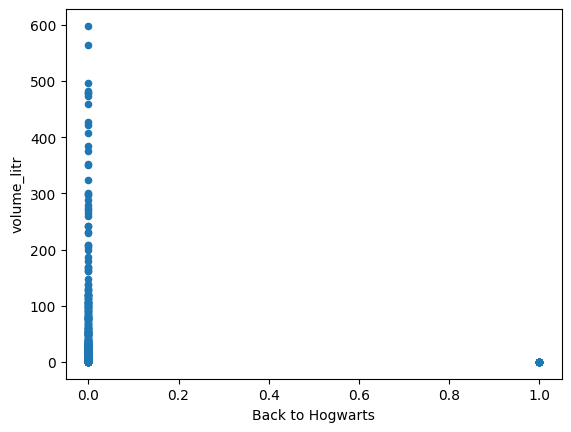

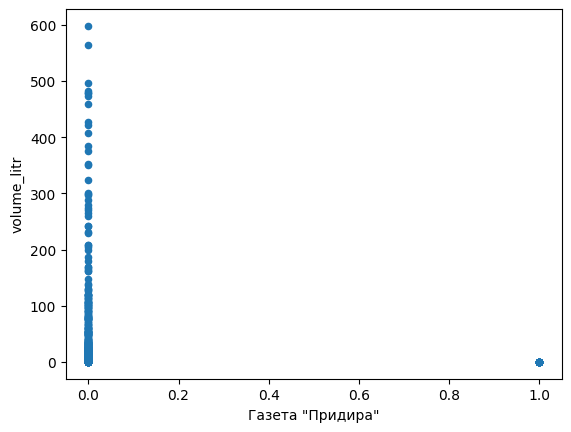

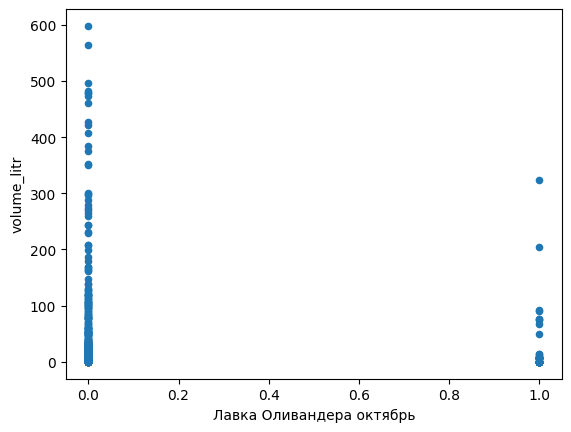

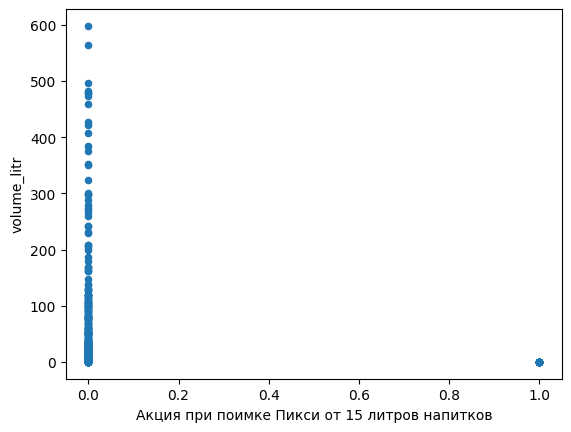

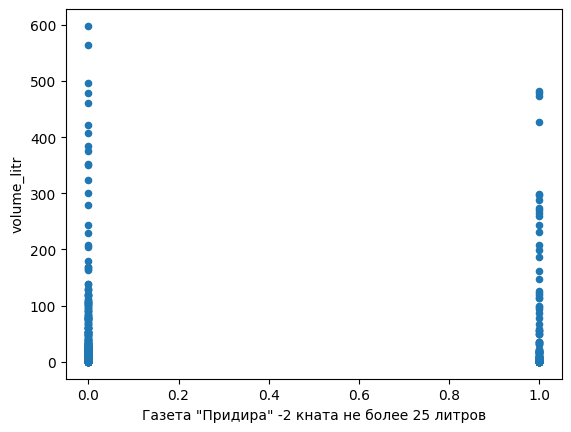

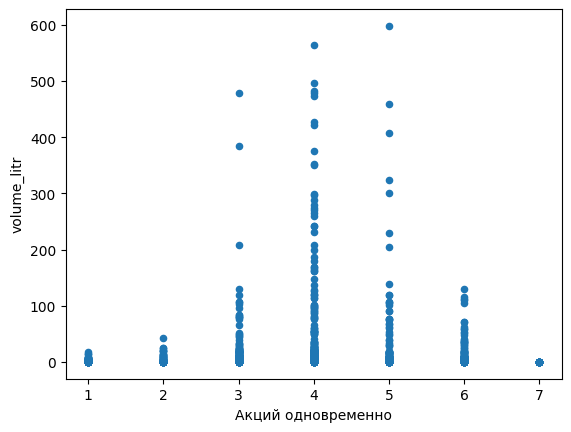

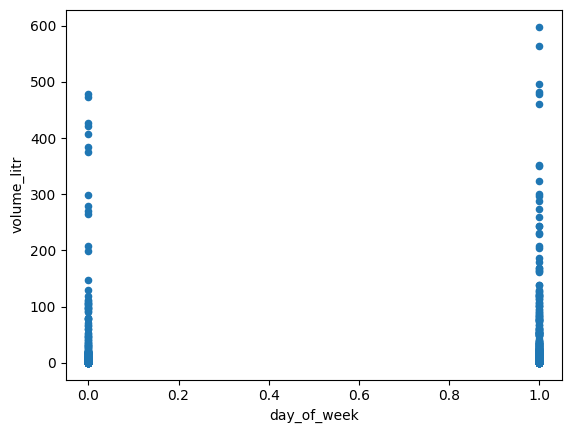

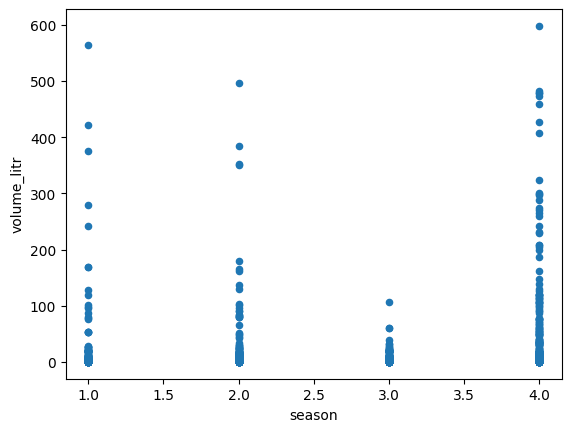

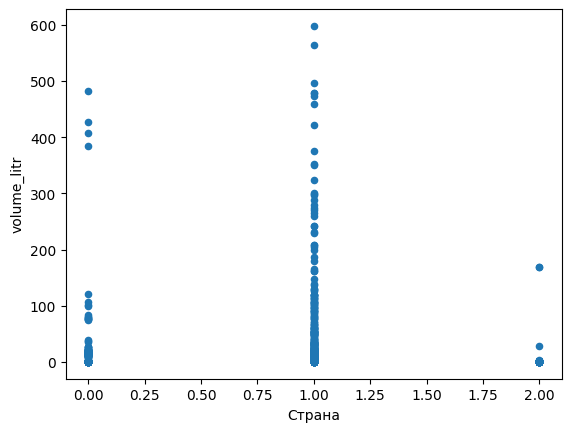

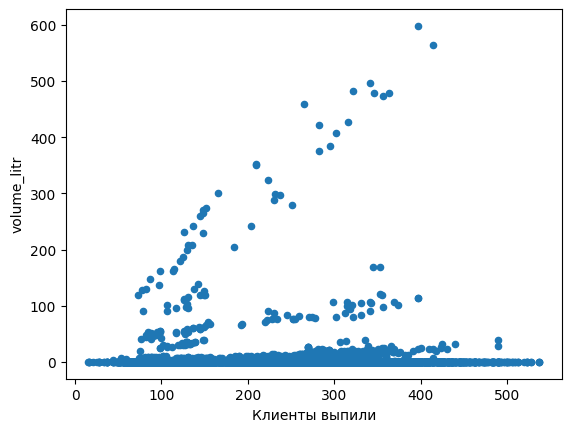

In [293]:
for idx, feature in enumerate(train_cols):
    X_test.plot(feature, "volume_litr", subplots=True, kind="scatter")